# <center>Improve Perceptron Tagger Experiment</center>

In this experiment, I try to improve the precepton's performance on POS tagging.

I choose two ways. First, I enlarge the context window. It is reasonable to assume that if the context window is larger, the algorithm can see more information regarding the word's POS it assigns. And hence, the tagging should be more precise. 

Second, I leverage information from pre-trained model. The justification is bird of a feather flock together. We have a better understanding of a word's POS if we know a set of *similar* words' POS. The similarity can be captured with the help from some pre-trained word2vec or glove model.


For documenting purpose, some minor modifications to the original tagger.py file were made. I performed the experiment on 
[UD English corpus](https://github.com/UniversalDependencies/UD_English-EWT).
I originally want to transfer all the code and make them running in this notebook. But I found that is a big task, especially for the evaluation script. So this notebook is a mix of python, zsh, print-out, and snapshot.

In the following, I first check the accuracy of the original perceptron (`tagger.py`), then run my hypotheses (`tagger_larger_window.py`, `tagger_company.py`, and `tagger_combined.py`). Finally, I will make a comparison.

# 1. Baseline

This part I will check the POS tagging accuracy of the original perceptron.

In [2]:
import os 
os.chdir('./conllu-perceptron-tagger')
import tagger
# from evaluation_script import conll17_ud_eval

In [3]:
pwd

'/Users/hwang/Desktop/repo/LING-L545/02_Morphology/conllu-perceptron-tagger'

In [9]:
corpus_train_file = open('../UD_English-EWT/en_ewt-ud-train.conllu')
corpus_test_file = open('../UD_English-EWT/en_ewt-ud-test.conllu')
model_file_base = 'en-ud-base.dat'

In [55]:
# train the baseline model
tagger.trainer(corpus_train_file, model_file_base)

Iter 0: 183997/207053=88.8646868193168


Iter 1: 192656/207053=93.04670784774912


Iter 2: 196945/207053=95.1181581527435


Iter 3: 199276/207053=96.24395686128673


Iter 4: 200578/207053=96.8727813651577


In [10]:
# tag the test set
tagger.tagger(corpus_test_file, model_file_base)

# newdoc id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200
# sent_id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200-0001
# newpar id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200-p0001
# text = What if Google Morphed Into GoogleOS?
1	What	what	PRON	WP	PronType=Int	0	root	0:root	_
2	if	if	SCONJ	IN	_	4	mark	4:mark	_
3	Google	Google	PROPN	NNP	Number=Sing	4	nsubj	4:nsubj	_
4	Morphed	morph	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	1	advcl	1:advcl:if	_
5	Into	into	ADP	IN	_	6	case	6:case	_
6	GoogleOS	GoogleOS	PROPN	NNP	Number=Sing	4	obl	4:obl:into	SpaceAfter=No
7	?	?	PUNCT	.	_	4	punct	4:punct	_

# sent_id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200-0002
# text = What if Google expanded on its search-engine (and now e-mail) wares into a full-fledged operating system?
1	What	what	PRON	WP	PronType=Int	0	root	0:root	_
2	if	if	SCONJ	IN	_	4	mark	4:mark	_
3	Google	Google	PROPN	NNP	Number=Sing	4	nsubj	

1	(	(	PUNCT	-LRB-	_	5	punct	5:punct	SpaceAfter=No
2	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	5	nsubj	5:nsubj|7:nsubj:xsubj	_
3-4	don't	_	_	_	_	_	_	_	_
3	do	do	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	5	aux	5:aux	_
4	n't	not	PART	RB	_	5	advmod	5:advmod	_
5	need	need	VERB	VB	VerbForm=Inf	0	root	0:root	_
6	to	to	PART	TO	_	7	mark	7:mark	_
7	use	use	VERB	VB	VerbForm=Inf	5	xcomp	5:xcomp	_
8	their	they	PRON	PRP$	Number=Plur|Person=3|Poss=Yes|PronType=Prs	9	nmod:poss	9:nmod:poss	_
9	site	site	NOUN	NN	Number=Sing	7	obj	7:obj	SpaceAfter=No
10	,	,	PUNCT	,	_	13	punct	13:punct	_
11	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	13	nsubj	13:nsubj	_
12	can	can	AUX	MD	VerbForm=Fin	13	aux	13:aux	_
13	opt	opt	VERB	VB	VerbForm=Inf	5	conj	5:conj:and	SpaceAfter=No
14	-	-	PUNCT	HYPH	_	13	punct	13:punct	SpaceAfter=No
15	out	out	ADP	RP	_	13	compound:prt	13:compound:prt	_
16	of	of	SCONJ	IN	_	17	mark	17:mark	_
17	sharing	share	VERB	VBG	VerbForm=Ger	13	advcl	13:advcl:of	_
18	your	you	PRON	PRP$	Person=2|P

1	Let	let	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	aggressive	aggressive	PRON	JJ	Degree=Pos	6	amod	6:amod	_
3	(	(	PUNCT	-LRB-	_	4	punct	4:punct	SpaceAfter=No
4	American	american	ADJ	JJ	Degree=Pos	6	amod	6:amod	SpaceAfter=No
5	)	)	PUNCT	-RRB-	_	4	punct	4:punct	_
6	leaders	leader	NOUN	NNS	Number=Plur	1	obj	1:obj|9:nsubj:xsubj	_
7	and	and	CCONJ	CC	_	8	cc	8:cc	_
8	soldiers	soldier	NOUN	NNS	Number=Plur	6	conj	1:obj|6:conj:and|9:nsubj:xsubj	_
9	know	know	VERB	VB	VerbForm=Inf	1	xcomp	1:xcomp	_
10	that	that	SCONJ	IN	_	13	mark	13:mark	_
11	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	13	nsubj	13:nsubj|24:nsubj|27:nsubj:xsubj	_
12	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	13	cop	13:cop	_
13	capable	capable	ADJ	JJ	Degree=Pos	9	ccomp	9:ccomp	_
14	of	of	SCONJ	IN	_	15	mark	15:mark	_
15	protecting	protect	VERB	VBG	VerbForm=Ger	13	advcl	13:advcl:of	_
16	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
17-18	city's	_	_	_	_	_	_	_	_
17	city	city	NOUN	NN	Number=Sing	19	nm

1	Stay	stay	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	with	with	ADP	IN	_	3	case	3:case	_
3	me	I	PRON	PRP	Case=Acc|Number=Sing|Person=1|PronType=Prs	1	obl	1:obl:with	_
4	now	now	ADV	RB	_	1	advmod	1:advmod	SpaceAfter=No
5	:	:	PUNCT	:	_	1	punct	1:punct	_
6	John	John	PROPN	NNP	Number=Sing	9	nsubj	9:nsubj	_
7	Paul	Paul	PROPN	NNP	Number=Sing	6	flat	6:flat	_
8	STEVENS	STEVENS	PROPN	NNP	Number=Sing	6	flat	6:flat	_
9	delivered	deliver	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	1	parataxis	1:parataxis	_
10	the	the	DET	DT	Definite=Def|PronType=Art	11	det	11:det	_
11	opinion	opinion	NOUN	NN	Number=Sing	9	obj	9:obj|50:obl	_
12	of	of	ADP	IN	_	14	case	14:case	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	Court	court	NOUN	NN	Number=Sing	11	nmod	11:nmod:of	_
15	with	with	ADP	IN	_	16	case	16:case	_
16	respect	respect	NOUN	NN	Number=Sing	11	nmod	11:nmod:with	_
17	to	to	ADP	IN	_	18	case	18:case	_
18	Parts	part	PROPN	NNS	Number=Plur	16	nmod	16:nmod:to	_
19	I	i	PRON	CD	NumType=Card	1

1	Important	important	ADJ	JJ	Degree=Pos	2	amod	2:amod	_
2	news	news	NOUN	NN	Number=Sing	51	nsubj	51:nsubj	_
3	such	such	ADJ	JJ	Degree=Pos	9	case	9:case	_
4	as	as	ADP	IN	_	3	fixed	3:fixed	_
5	President	President	PROPN	NNP	Number=Sing	9	nmod:poss	9:nmod:poss	_
6-7	Bush's	_	_	_	_	_	_	_	_
6	Bush	Bush	PROPN	NNP	Number=Sing	5	flat	5:flat	_
7	's	's	PART	POS	_	5	case	5:case	_
8	miniscule	miniscule	NOUN	JJ	Degree=Pos	9	amod	9:amod	_
9	calibrations	calibration	NOUN	NNS	Number=Plur	2	nmod	2:nmod:such_as	_
10	on	on	ADP	IN	_	13	case	13:case	_
11	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	13	nmod:poss	13:nmod:poss	_
12	marriage	marriage	NOUN	NN	Number=Sing	13	compound	13:compound	_
13	amendment	amendment	NOUN	NN	Number=Sing	9	nmod	9:nmod:on	SpaceAfter=No
14	/	/	PUNCT	SYM	_	15	cc	15:cc	SpaceAfter=No
15	anti-gay	anti-gay	NOUN	JJ	Degree=Pos	13	conj	9:nmod:on|13:conj	_
16	(	(	PUNCT	-LRB-	_	17	punct	17:punct	SpaceAfter=No
17	update	update	NOUN	NN	Number=Sing	15	parataxis	15:p

6	two	two	NUM	CD	NumType=Card	7	nummod	7:nummod	_
7	weeks	week	NOUN	NNS	Number=Plur	8	obl:npmod	8:obl:npmod	_
8	later	later	ADV	RB	_	4	advmod	4:advmod	SpaceAfter=No
9	,	,	PUNCT	,	_	4	punct	4:punct	_
10	after	after	ADP	IN	_	14	case	14:case	_
11	that	that	SCONJ	DT	Number=Sing|PronType=Dem	14	det	14:det	_
12	dazzling	dazzling	VERB	JJ	Degree=Pos	14	amod	14:amod	_
13	PR	PR	NOUN	NNP	Number=Sing	14	compound	14:compound	_
14	display	display	VERB	NN	Number=Sing	4	obl	4:obl:after	_
15	two	two	NUM	CD	NumType=Card	16	nummod	16:nummod	_
16	weeks	week	NOUN	NNS	Number=Plur	17	obl:npmod	17:obl:npmod	_
17	ago	ago	ADV	RB	_	14	advmod	14:advmod	_
18	by	by	ADP	IN	_	19	case	19:case	_
19	Powell	Powell	PROPN	NNP	Number=Sing	14	nmod	14:nmod:by	_
20	and	and	CCONJ	CC	_	21	cc	21:cc	_
21	Annan	Annan	PROPN	NNP	Number=Sing	19	conj	14:nmod:by|19:conj:and	SpaceAfter=No
22	,	,	PUNCT	,	_	31	punct	31:punct	_
23	and	and	CCONJ	CC	_	31	cc	31:cc	_
24	the	the	DET	DT	Definite=Def|PronType=Art	25	det	25:det	_
25	situation	situa

1	On	on	ADP	IN	_	4	case	4:case	_
2	the	the	DET	DT	Definite=Def|PronType=Art	4	det	4:det	_
3	other	other	ADJ	JJ	Degree=Pos	4	amod	4:amod	_
4	hand	hand	NOUN	NN	Number=Sing	10	obl	10:obl:on	SpaceAfter=No
5	,	,	PUNCT	,	_	10	punct	10:punct	_
6	this	this	PRON	DT	Number=Sing|PronType=Dem	10	nsubj	10:nsubj	_
7	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	10	cop	10:cop	_
8	essentially	essentially	ADV	RB	_	10	advmod	10:advmod	_
9	a	a	DET	DT	Definite=Ind|PronType=Art	10	det	10:det	_
10	statement	statement	NOUN	NN	Number=Sing	0	root	0:root	_
11	that	that	SCONJ	IN	_	15	mark	15:mark	_
12	the	the	DET	DT	Definite=Def|PronType=Art	13	det	13:det	_
13	company	company	NOUN	NN	Number=Sing	15	nsubj	15:nsubj	_
14	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	15	cop	15:cop	_
15	overpriced	overpriced	ADJ	JJ	Degree=Pos	10	acl	10:acl:that	_
16	from	from	ADP	IN	_	18	case	18:case	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	guy	guy	NOUN	NN	Number=Sin

9	of	of	ADP	IN	_	10	case	10:case	_
10	Hezbollah	Hezbollah	PROPN	NNP	Number=Sing	8	nmod	8:nmod:of	_
11	and	and	CCONJ	CC	_	12	cc	12:cc	_
12	Syria	Syria	PROPN	NNP	Number=Sing	10	conj	8:nmod:of|10:conj:and	_
13	,	,	PUNCT	,	_	19	punct	19:punct	_
14	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
15	terrorist	terrorist	NOUN	JJ	Degree=Pos	16	amod	16:amod	_
16	group	group	NOUN	NN	Number=Sing	19	nsubj	19:nsubj	_
17	Hamas	Hamas	PROPN	NNP	Number=Sing	16	appos	16:appos	_
18	has	have	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	19	aux	19:aux	_
19	indicated	indicate	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
20	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	22	nsubj	22:nsubj	_
21	will	will	AUX	MD	VerbForm=Fin	22	aux	22:aux	_
22	participate	participate	VERB	VB	VerbForm=Inf	19	ccomp	19:ccomp	_
23	in	in	ADP	IN	_	28	case	28:case	_
24	the	the	DET	DT	Definite=Def|PronType=Art	28	det	28:det	_
25	scheduled	schedule	VERB	VBN	Tense=Past|VerbForm=Part	28	

26	the	the	DET	DT	Definite=Def|PronType=Art	27	det	27:det	_
27	predators	predator	NOUN	NNS	Number=Plur	32	nsubj	32:nsubj	_
28	of	of	ADP	IN	_	29	case	29:case	_
29	Hamas	Hamas	PROPN	NNP	Number=Sing	27	nmod	27:nmod:of	_
30	and	and	CCONJ	CC	_	31	cc	31:cc	_
31	Hezbollah	Hezbollah	PROPN	NNP	Number=Sing	29	conj	27:nmod:of|29:conj:and	_
32	exploit	exploit	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	21	advcl	21:advcl:as	_
33	the	the	DET	DT	Definite=Def|PronType=Art	35	det	35:det	_
34	inherent	inherent	ADJ	JJ	Degree=Pos	35	amod	35:amod	_
35	weakness	weakness	NOUN	NN	Number=Sing	32	obj	32:obj	_
36	of	of	ADP	IN	_	38	case	38:case	_
37	the	the	DET	DT	Definite=Def|PronType=Art	38	det	38:det	_
38	internationals	international	NOUN	NNS	Number=Plur	35	nmod	35:nmod:of	_
39	and	and	CCONJ	CC	_	41	cc	41:cc	_
40	the	the	DET	DT	Definite=Def|PronType=Art	41	det	41:det	_
41	media	media	NOUN	NN	Number=Sing	38	conj	35:nmod:of|38:conj:and	SpaceAfter=No
42	.	.	PUNCT	.	_	16	punct	16:punct	_

# sent_id = weblog-blogspot

2	-	-	PUNCT	HYPH	_	1	punct	1:punct	SpaceAfter=No
3	Zaman	Zaman	PROPN	NNP	Number=Sing	1	flat	1:flat	_
4	:	:	PUNCT	:	_	1	punct	1:punct	_
5	The	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	Association	Association	NOUN	NNP	Number=Sing	10	nsubj	10:nsubj	_
7	of	of	ADP	IN	_	9	case	9:case	_
8	Muslim	Muslim	PROPN	NNP	Number=Sing	9	compound	9:compound	_
9	Scholars	Scholars	PROPN	NNPS	Number=Plur	6	nmod	6:nmod:of	_
10	forbade	forbid	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	1	parataxis	1:parataxis	_
11	Iraqis	Iraqis	PROPN	NNPS	Number=Plur	10	obj	10:obj|13:nsubj:xsubj	_
12	to	to	PART	TO	_	13	mark	13:mark	_
13	participate	participate	VERB	VB	VerbForm=Inf	10	xcomp	10:xcomp	_
14	in	in	ADP	IN	_	16	case	16:case	_
15	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
16	attack	attack	NOUN	NN	Number=Sing	13	obl	13:obl:in	_
17	on	on	ADP	IN	_	18	case	18:case	_
18	Fallujah	Fallujah	PROPN	NNP	Number=Sing	16	nmod	16:nmod:on	_
19	with	with	ADP	IN	_	21	case	21:case	_
20	the	the	DET	DT	Definite=Def

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	statement	statement	NOUN	NN	Number=Sing	3	nsubj	3:nsubj	_
3	said	say	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	3:punct	_
5	"	"	PUNCT	``	_	3	punct	3:punct	SpaceAfter=No
6	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	7	nsubj	7:nsubj	_
7	direct	direct	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	ccomp	3:ccomp	_
8	an	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
9	appeal	appeal	NOUN	NN	Number=Sing	7	obj	7:obj	_
10	at	at	ADP	IN	_	12	case	12:case	_
11	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
12	men	man	NOUN	NNS	Number=Plur	7	obl	7:obl:at|25:nmod:at	_
13	in	in	ADP	IN	_	16	case	16:case	_
14	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
15	Iraqi	iraqi	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
16	forces	force	NOUN	NNS	Number=Plur	12	nmod	12:nmod:in	SpaceAfter=No
17	,	,	PUNCT	,	_	16	punct	16:punct	_
18	whether	whether	SCONJ	IN	_	20	mark	20:mark	_
19	na

1	"	"	PUNCT	``	_	27	punct	27:punct	SpaceAfter=No
2	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
3	believe	believe	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	27	ccomp	27:ccomp	_
4	this	this	PRON	DT	Number=Sing|PronType=Dem	10	nsubj	10:nsubj	_
5	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	10	cop	10:cop	_
6	an	a	DET	DT	Definite=Ind|PronType=Art	10	det	10:det	_
7	ill	ill	NOUN	RB	_	9	compound	9:compound	SpaceAfter=No
8	-	-	PUNCT	HYPH	_	9	punct	9:punct	SpaceAfter=No
9	advised	advise	VERB	VBN	Tense=Past|VerbForm=Part	10	amod	10:amod	_
10	term	term	NOUN	NN	Number=Sing	3	ccomp	3:ccomp	_
11	and	and	CCONJ	CC	_	13	cc	13:cc	_
12	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	13	nsubj	13:nsubj	_
13	believe	believe	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	conj	3:conj:and|27:ccomp	_
14	that	that	SCONJ	IN	_	17	mark	17:mark	_
15	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	17	expl	17:expl	_
16	is	be	AUX	VBZ	Mood

1	But	but	CCONJ	CC	_	19	cc	19:cc	_
2	because	because	SCONJ	IN	_	6	mark	6:mark	_
3	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	6	nsubj	6:nsubj|8:nsubj:xsubj|9:nsubj:xsubj	_
4-5	don't	_	_	_	_	_	_	_	_
4	do	do	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	6	aux	6:aux	_
5	n't	not	PART	RB	_	6	advmod	6:advmod	_
6	want	want	VERB	VB	VerbForm=Inf	12	advcl	12:advcl:because	_
7	to	to	PART	TO	_	8	mark	8:mark	_
8	sound	sound	VERB	VB	VerbForm=Inf	6	xcomp	6:xcomp	_
9	hateful	hateful	ADJ	JJ	Degree=Pos	8	xcomp	8:xcomp	_
10	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	12	nsubj	12:nsubj|19:nsubj	_
11	must	must	AUX	MD	VerbForm=Fin	12	aux	12:aux	_
12	pretend	pretend	VERB	VB	VerbForm=Inf	0	root	0:root	_
13-14	everyone's	_	_	_	_	_	_	_	_
13	everyone	everyone	PRON	NN	Number=Sing	17	nsubj	17:nsubj	_
14	's	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	17	cop	17:cop	_
15	a	a	DET	DT	Definite=Ind|PronType=Art	17	det	17:det	_
16	possible	possible	ADJ	JJ	Degree=Pos	17	amod	17:a

1	This	this	DET	DT	Number=Sing|PronType=Dem	2	det	2:det	_
2	consolidation	consolidation	NOUN	NN	Number=Sing	6	nsubj	6:nsubj	_
3	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	6:cop	_
4	obviously	obviously	ADV	RB	_	6	advmod	6:advmod	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
6	result	result	NOUN	NN	Number=Sing	0	root	0:root	_
7	of	of	ADP	IN	_	11	case	11:case	_
8-9	Bush's	_	_	_	_	_	_	_	_
8	Bush	Bush	PROPN	NNP	Number=Sing	11	nmod:poss	11:nmod:poss	_
9	's	's	PART	POS	_	8	case	8:case	_
10	aggressive	aggressive	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	invasion	invasion	NOUN	NN	Number=Sing	6	nmod	6:nmod:of	_
12	of	of	ADP	IN	_	13	case	13:case	_
13	Iraq	Iraq	PROPN	NNP	Number=Sing	11	nmod	11:nmod:of	_
14	and	and	CCONJ	CC	_	17	cc	17:cc	_
15	of	of	ADP	IN	_	17	case	17:case	_
16	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
17	botching	botching	NOUN	NN	Number=Sing	11	conj	6:nmod:of|11:conj:and	_
18	of	of	ADP	IN	_	20	case	20:case	_
19	the	the	DET	DT	Def

1	Monotheism	Monotheism	PROPN	NNP	Number=Sing	7	nsubj	7:nsubj	_
2	and	and	CCONJ	CC	_	4	cc	4:cc	_
3	Holy	Holy	PROPN	NNP	Number=Sing	4	compound	4:compound	_
4	War	War	PROPN	NNP	Number=Sing	1	conj	1:conj:and|7:nsubj	_
5	obviously	obviously	ADV	RB	_	7	advmod	7:advmod	_
6	does	do	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	7	aux	7:aux	_
7	have	have	VERB	VB	VerbForm=Inf	0	root	0:root	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	10	det	10:det	_
9	violent	violent	ADJ	JJ	Degree=Pos	10	amod	10:amod	_
10	interpretation	interpretation	NOUN	NN	Number=Sing	7	obj	7:obj	_
11	of	of	ADP	IN	_	12	case	12:case	_
12	Salafism	Salafism	PROPN	NNP	Number=Sing	10	nmod	10:nmod:of	SpaceAfter=No
13	,	,	PUNCT	,	_	7	punct	7:punct	_
14	rather	rather	ADV	RB	_	30	advmod	30:advmod	_
15	as	as	ADP	IN	_	30	mark	30:mark	_
16	the	the	DET	DT	Definite=Def|PronType=Art	30	reparandum	30:reparandum	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	leaders	leader	NOUN	NNS	Number=Plur	30	nsubj	30:nsubj	_

19	expended	expend	VERB	VBN	Tense=Past|VerbForm=Part	6	ccomp	6:ccomp	_
20	every	every	DET	DT	_	21	det	21:det	_
21	effort	effort	NOUN	NN	Number=Sing	19	obj	19:obj	_
22	to	to	PART	TO	_	23	mark	23:mark	_
23	stop	stop	VERB	VB	VerbForm=Inf	19	advcl	19:advcl:to	_
24	it	it	PRON	PRP	Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs	23	obj	23:obj	SpaceAfter=No
25	,	,	PUNCT	,	_	30	punct	30:punct	_
26	and	and	CCONJ	CC	_	30	cc	30:cc	_
27	that	that	SCONJ	IN	_	30	mark	30:mark	_
28	so	so	ADV	RB	_	30	advmod	30:advmod	_
29	would	would	AUX	MD	VerbForm=Fin	30	aux	30:aux	_
30	have	have	VERB	VB	VerbForm=Inf	19	conj	6:ccomp|19:conj:and	_
31	Clinton	Clinton	PROPN	NNP	Number=Sing	30	nsubj	30:nsubj	SpaceAfter=No
32	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = weblog-juancole.com_juancole_20040722101300_ENG_20040722_101300-0005
# text = This statement is, despite its facade of fair-mindedness, so many weasel words.
1	This	this	DET	DT	Number=Sing|PronType=Dem	2	det	2:det	_
2	statement	statement	NOUN	NN	Numb

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	hijackers	hijacker	NOUN	NNS	Number=Plur	7	nsubj	7:nsubj	_
3	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	7	cop	7:cop	_
4	obviously	obviously	ADV	RB	_	7	advmod	7:advmod	_
5	al	al	PROPN	NNP	Number=Sing	7	compound	7:compound	SpaceAfter=No
6	-	-	PUNCT	HYPH	_	7	punct	7:punct	SpaceAfter=No
7	Qaeda	Qaeda	PROPN	NNP	Number=Sing	0	root	0:root	SpaceAfter=No
8	,	,	PUNCT	,	_	22	punct	22:punct	_
9	and	and	CCONJ	CC	_	22	cc	22:cc	_
10	no	no	DET	DT	_	12	det	12:det	_
11	operational	operational	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	links	link	NOUN	NNS	Number=Plur	22	nsubj:pass	22:nsubj:pass	_
13	between	between	ADP	IN	_	16	case	16:case	_
14	al	al	PROPN	NNP	Number=Sing	16	compound	16:compound	SpaceAfter=No
15	-	-	PUNCT	HYPH	_	16	punct	16:punct	SpaceAfter=No
16	Qaeda	Qaeda	PROPN	NNP	Number=Sing	12	nmod	12:nmod:between	_
17	and	and	CCONJ	CC	_	18	cc	18:cc	_
18	Iraq	Iraq	PROPN	NNP	Number=Sing	16	conj	12:nmod:between|16:conj:and	_
19	had	have	AUX	

1	Clinton	Clinton	PROPN	NNP	Number=Sing	3	nsubj	3:nsubj	_
2	had	have	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	3	aux	3:aux	_
3	worked	work	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
4	out	out	ADP	RP	_	3	compound:prt	3:compound:prt	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
6	deal	deal	NOUN	NN	Number=Sing	3	obj	3:obj|20:nsubj	_
7	with	with	ADP	IN	_	10	case	10:case	_
8	Pakistani	pakistani	ADJ	JJ	Degree=Pos	10	amod	10:amod	_
9	Prime	Prime	PROPN	NNP	Number=Sing	10	compound	10:compound	_
10	Minister	Minister	PROPN	NNP	Number=Sing	6	nmod	6:nmod:with	_
11	Nawaz	Nawaz	PROPN	NNP	Number=Sing	10	flat	10:flat	_
12	Sharif	Sharif	PROPN	NNP	Number=Sing	10	flat	10:flat	_
13	in	in	ADP	IN	_	14	case	14:case	_
14	summer	summer	NOUN	NN	Number=Sing	3	obl	3:obl:in	_
15	of	of	ADP	IN	_	16	case	16:case	_
16	1999	1999	NUM	CD	NumType=Card	14	nmod	14:nmod:of	_
17	that	that	PRON	WDT	PronType=Rel	20	nsubj	6:ref	_
18	would	would	AUX	MD	VerbForm=Fin	20	aux	20:aux	_
19	have	have	AUX	VB	VerbForm=Inf	20

1	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj	_
2	am	be	AUX	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
3	out	out	ADP	IN	_	5	case	5:case	_
4	of	of	ADP	IN	_	5	case	5:case	_
5	town	town	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
6	.	.	PUNCT	.	_	5	punct	5:punct	_

# sent_id = email-enronsent23_07-0011
# text = i am in portland.
1	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
2	am	be	AUX	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	4	cop	4:cop	_
3	in	in	ADP	IN	_	4	case	4:case	_
4	portland	portland	PROPN	NNP	Number=Sing	0	root	0:root	SpaceAfter=No
5	.	.	PUNCT	.	_	4	punct	4:punct	_

# sent_id = email-enronsent23_07-0012
# text = you can buy me dinner when we get back.
1	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
2	can	can	AUX	MD	VerbForm=Fin	3	aux	3:aux	_
3	buy	buy	VERB	VB	VerbForm=Inf	0	root	0:root	_
4	me	I	PRON	PRP	Case=Acc|Number=Sing|Person=1|PronType=Prs	3	iobj	3:

1	Original	original	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
2	Margin	margin	NOUN	NN	Number=Sing	3	compound	3:compound	_
3	Call	call	NOUN	NN	Number=Sing	0	root	0:root	_
4	Margin	margin	PROPN	NN	Number=Sing	3	parataxis	3:parataxis	_
5	Due	due	PROPN	JJ	Degree=Pos	4	acl	4:acl	_
6	Today	today	PROPN	NN	Number=Sing	4	nmod:tmod	4:nmod:tmod	_

# sent_id = email-enronsent21_01-0017
# text = Kinder Morgan $ 3,500,000 $ 1,250,000
1	Kinder	Kinder	PROPN	NNP	Number=Sing	2	compound	2:compound	_
2	Morgan	Morgan	PROPN	NNP	Number=Sing	0	root	0:root	_
3	$	$	SYM	$	_	2	parataxis	2:parataxis	_
4	3,500,000	3,500,000	NUM	CD	NumType=Card	3	nummod	3:nummod	_
5	$	$	SYM	$	_	2	parataxis	2:parataxis	_
6	1,250,000	1,250,000	NUM	CD	NumType=Card	5	nummod	5:nummod	_

# sent_id = email-enronsent21_01-0018
# text = AEP $19,250,000 $38,750,000
1	AEP	AEP	ADV	NNP	Number=Sing	0	root	0:root	_
2	$	$	SYM	$	_	1	parataxis	1:parataxis	SpaceAfter=No
3	19,250,000	19,250,000	NUM	CD	NumType=Card	2	nummod	2:nummod	_
4	$	$	SYM	$	_	1	parataxis	

1	Since	since	SCONJ	IN	_	4	mark	4:mark	_
2	work	work	NOUN	NN	Number=Sing	4	nsubj	4:nsubj	_
3	has	have	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	4	aux	4:aux	_
4	gone	go	VERB	VBN	Tense=Past|VerbForm=Part	10	advcl	10:advcl:since	_
5	to	to	ADP	IN	_	6	case	6:case	_
6	hell	hell	NOUN	NN	Number=Sing	4	obl	4:obl:to	SpaceAfter=No
7	,	,	PUNCT	,	_	10	punct	10:punct	_
8	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	10	nsubj	10:nsubj|12:nsubj:xsubj	_
9	am	be	AUX	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	10	aux	10:aux	_
10	hoping	hope	VERB	VBG	Tense=Pres|VerbForm=Part	0	root	0:root	_
11	to	to	PART	TO	_	12	mark	12:mark	_
12	find	find	VERB	VB	VerbForm=Inf	10	xcomp	10:xcomp	_
13	some	some	DET	DT	_	14	det	14:det	_
14	excitement	excitement	NOUN	NN	Number=Sing	12	obj	12:obj	_
15	in	in	ADP	IN	_	17	case	17:case	_
16	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
17	possibility	possibility	NOUN	NN	Number=Sing	12	obl	12:obl:in	_
18	that	that	PRON	IN	_	21	

1	Magali	Magali	PROPN	NNP	Number=Sing	0	root	0:root	_
2	Van	Van	PROPN	NNP	Number=Sing	1	flat	1:flat	_
3	Belle	Belle	PROPN	NNP	Number=Sing	1	flat	1:flat	_
4	Consultant	consultant	PROPN	NN	Number=Sing	1	list	1:list	_
5	PHB	PHB	PROPN	NNP	Number=Sing	1	list	1:list	_
6	Hagler	Hagler	PROPN	NNP	Number=Sing	5	flat	5:flat	_
7	Bailly	Bailly	PROPN	NNP	Number=Sing	5	flat	5:flat	_
8	MANAGEMENT	MANAGEMENT	PROPN	NNP	Number=Sing	11	compound	11:compound	_
9	AND	and	CCONJ	CC	_	10	cc	10:cc	_
10	ECONOMIC	ECONOMIC	PROPN	NNP	Number=Sing	8	conj	8:conj:and|11:compound	_
11	CONSULTANTS	CONSULTANTS	PROPN	NNPS	Number=Plur	1	list	1:list	_
12	PHB	PHB	PROPN	NNP	Number=Sing	1	list	1:list	_
13	Hagler	Hagler	PROPN	NNP	Number=Sing	12	flat	12:flat	_
14	Bailly	Bailly	PROPN	NNP	Number=Sing	12	flat	12:flat	SpaceAfter=No
15	,	,	PUNCT	,	_	12	punct	12:punct	_
16	Inc.	Inc.	PROPN	NNP	Number=Sing	12	flat	12:flat	_
17	(	(	PUNCT	-LRB-	_	20	punct	20:punct	SpaceAfter=No
18	202	202	NUM	CD	NumType=Card	20	nummod	20:nummod	SpaceAfter=N

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	spoke	speak	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	with	with	ADP	IN	_	4	case	4:case	_
4	Mike	Mike	PROPN	NNP	Number=Sing	2	obl	2:obl:with|18:nsubj	_
5	Collins	Collins	PROPN	NNP	Number=Sing	4	flat	4:flat	_
6	[	[	PUNCT	-LRB-	_	7	punct	7:punct	SpaceAfter=No
7	203-719-8385	203-719-8385	NUM	CD	NumType=Card	4	parataxis	4:parataxis	_
8	(	(	PUNCT	-LRB-	_	9	punct	9:punct	SpaceAfter=No
9	phone	phone	NOUN	NN	Number=Sing	7	appos	7:appos	SpaceAfter=No
10	)	)	PUNCT	-RRB-	_	9	punct	9:punct	_
11	and	and	CCONJ	CC	_	12	cc	12:cc	_
12	203-719-7031	203-719-7031	NUM	CD	NumType=Card	7	conj	7:conj:and	_
13	(	(	PUNCT	-LRB-	_	14	punct	14:punct	SpaceAfter=No
14	fax	fax	NOUN	NN	Number=Sing	12	appos	12:appos	SpaceAfter=No
15	)	)	PUNCT	-RRB-	_	14	punct	14:punct	SpaceAfter=No
16	]	]	PUNCT	-RRB-	_	7	punct	7:punct	_
17	who	who	PRON	WP	PronType=Rel	18	nsubj	4:ref	_
18	conrfirmed	conrfirm	VERB	VBD	Mood=Ind|Tense=Past|VerbFo

1	Vijay	Vijay	PROPN	NNP	Number=Sing	0	root	0:root	_
2	K.	K.	PROPN	NNP	Number=Sing	1	flat	1:flat	_
3	Suchdev	Suchdev	PROPN	NNP	Number=Sing	1	flat	1:flat	_
4	Vice	vice	NOUN	NN	Number=Sing	5	compound	5:compound	_
5	President	president	NOUN	NN	Number=Sing	1	list	1:list	_
6	Equity	equity	PROPN	NN	Number=Sing	7	compound	7:compound	_
7	Derivatives	derivative	NOUN	NNS	Number=Plur	1	list	1:list	_
8	First	First	PROPN	NNP	Number=Sing	9	compound	9:compound	_
9	Union	Union	PROPN	NNP	Number=Sing	12	compound	12:compound	_
10	Securities	Securities	PROPN	NNPS	Number=Plur	12	compound	12:compound	SpaceAfter=No
11	,	,	PUNCT	,	_	12	punct	12:punct	_
12	Inc.	Inc.	PROPN	NNP	Number=Sing	1	list	1:list	_
13	Telephone	telephone	PROPN	NN	Number=Sing	1	list	1:list	SpaceAfter=No
14	:	:	PUNCT	:	_	13	punct	13:punct	_
15	(	(	PUNCT	-LRB-	_	18	punct	18:punct	SpaceAfter=No
16	212	212	NUM	CD	NumType=Card	18	nummod	18:nummod	SpaceAfter=No
17	)	)	PUNCT	-RRB-	_	18	punct	18:punct	_
18	909-0951	909-0951	NUM	CD	NumType=Card	13	a

1	If	if	SCONJ	IN	_	3	mark	3:mark	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	want	want	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	12	advcl	12:advcl:if	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
5	CD	cd	PROPN	NN	Number=Sing	6	compound	6:compound	_
6	copy	copy	NOUN	NN	Number=Sing	3	obj	3:obj	_
7	of	of	ADP	IN	_	10	case	10:case	_
8	this	this	DET	DT	Number=Sing|PronType=Dem	10	det	10:det	_
9	web	web	NOUN	NN	Number=Sing	10	compound	10:compound	_
10	site	site	NOUN	NN	Number=Sing	6	nmod	6:nmod:of	SpaceAfter=No
11	,	,	PUNCT	,	_	12	punct	12:punct	_
12	give	give	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
13	me	I	PRON	PRP	Case=Acc|Number=Sing|Person=1|PronType=Prs	12	iobj	12:iobj	_
14	a	a	DET	DT	Definite=Ind|PronType=Art	15	det	15:det	_
15	yell	yell	NOUN	NN	Number=Sing	12	obj	12:obj	SpaceAfter=No
16	.	.	PUNCT	.	_	12	punct	12:punct	_

# sent_id = email-enronsent09_02-0045
# newpar id = email-enronsent09_02-p0021
# text = Thanks,
1	Thanks	thanks	NOUN	NN	Numb

1	Janette	Janette	PROPN	NNP	Number=Sing	0	root	0:root	_
2	Elbertson	Elbertson	PROPN	NNP	Number=Sing	1	flat	1:flat	_
3	Administrative	administrative	ADJ	JJ	Degree=Pos	4	amod	4:amod	_
4	Coordinator	coordinator	NOUN	NN	Number=Sing	1	appos	1:appos	_
5	EWS	EWS	PROPN	NNP	Number=Sing	6	compound	6:compound	_
6	Legal	Legal	PROPN	NNP	Number=Sing	1	list	1:list	SpaceAfter=No
7	,	,	PUNCT	,	_	1	punct	1:punct	_
8	EB3326	eb3326	PROPN	NN	Number=Sing	1	list	1:list	_
9	Telephone	telephone	PROPN	NN	Number=Sing	1	list	1:list	SpaceAfter=No
10	:	:	PUNCT	:	_	9	punct	9:punct	_
11	(	(	PUNCT	-LRB-	_	14	punct	14:punct	SpaceAfter=No
12	713	713	NUM	CD	NumType=Card	14	nummod	14:nummod	SpaceAfter=No
13	)	)	PUNCT	-RRB-	_	14	punct	14:punct	_
14	853-7906	853-7906	NUM	CD	NumType=Card	9	appos	9:appos	_
15	Facsimile	facsimile	NOUN	NN	Number=Sing	1	list	1:list	SpaceAfter=No
16	:	:	PUNCT	:	_	15	punct	15:punct	_
17	(	(	PUNCT	-LRB-	_	20	punct	20:punct	SpaceAfter=No
18	713	713	NUM	CD	NumType=Card	20	nummod	20:nummod	SpaceAfter=

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj|11:nsubj	_
2	will	will	AUX	MD	VerbForm=Fin	5	aux	5:aux	_
3	not	not	PART	RB	_	5	advmod	5:advmod	_
4	be	be	VERB	VB	VerbForm=Inf	5	cop	5:cop	_
5	there	there	ADV	RB	PronType=Dem	0	root	0:root	_
6	at	at	ADP	IN	_	7	case	7:case	_
7	7:30	7:30	NUM	CD	NumType=Card	5	obl	5:obl:at	SpaceAfter=No
8	,	,	PUNCT	,	_	11	punct	11:punct	_
9	but	but	CCONJ	CC	_	11	cc	11:cc	_
10	will	will	AUX	MD	VerbForm=Fin	11	aux	11:aux	_
11	see	see	VERB	VB	VerbForm=Inf	5	conj	5:conj:but	_
12	you	you	PRON	PRP	Case=Acc|Person=2|PronType=Prs	11	obj	11:obj	_
13	arond	arond	ADV	RB	_	14	advmod	14:advmod	_
14	9:30	9:30	NUM	CD	NumType=Card	11	obl:tmod	11:obl:tmod	_
15	on	on	ADP	IN	_	16	case	16:case	_
16	Tuesday	Tuesday	PROPN	NNP	Number=Sing	11	obl	11:obl:on	SpaceAfter=No
17	.	.	PUNCT	.	_	5	punct	5:punct	_

# sent_id = email-enronsent28_01-0024
# newpar id = email-enronsent28_01-p0005
# text = Many thanks!
1	Many	many	ADJ	JJ	Degree=Pos	2	amod	2:amod	_
2	thank

1	Did	do	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	3	aux	3:aux	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	get	get	VERB	VB	VerbForm=Inf	15	parataxis	15:parataxis	_
4	in	in	ADP	IN	_	7	case	7:case	_
5	as	as	ADV	RB	_	6	advmod	6:advmod	_
6	much	much	ADV	JJ	Degree=Pos	7	amod	7:amod	_
7	trouble	trouble	NOUN	NN	Number=Sing	3	obl	3:obl:in	_
8	as	as	SCONJ	IN	_	10	mark	10:mark	_
9	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	10	nsubj	10:nsubj	_
10	did	do	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	7	advcl	7:advcl:as	_
11	this	this	DET	DT	Number=Sing|PronType=Dem	12	det	12:det	_
12	weekend	weekend	NOUN	NN	Number=Sing	3	obl:tmod	3:obl:tmod	_
13	-	-	PUNCT	,	_	15	punct	15:punct	_
14	Lori	Lori	NOUN	NNP	Number=Sing	15	nsubj	15:nsubj|17:nsubj:xsubj	_
15	seems	seem	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	think	think	VERB	VB	VerbForm=Inf	15	xcomp	15:xcomp	_
18	I	I	PRON	PRP	Case=Nom|Number=Si

1-2	You'll	_	_	_	_	_	_	_	_
1	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	4	nsubj	4:nsubj|6:nsubj:xsubj	_
2	'll	will	AUX	MD	VerbForm=Fin	4	aux	4:aux	_
3	be	be	AUX	VB	VerbForm=Inf	4	cop	4:cop	_
4	able	able	ADJ	JJ	Degree=Pos	0	root	0:root	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	use	use	VERB	VB	VerbForm=Inf	4	xcomp	4:xcomp	_
7	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	11	nmod:poss	11:nmod:poss	_
8	1	1	NUM	CD	NumType=Card	11	nummod	11:nummod	SpaceAfter=No
9	-	-	SYM	SYM	_	10	case	10:case	SpaceAfter=No
10	4	4	NUM	CD	NumType=Card	8	nmod	8:nmod	_
11	years	year	NOUN	NNS	Number=Plur	6	obj	6:obj	_
12	of	of	ADP	IN	_	13	case	13:case	_
13	experience	experience	NOUN	NN	Number=Sing	11	nmod	11:nmod:of	_
14	with	with	ADP	IN	_	16	case	16:case	_
15	Toxic	toxic	PROPN	JJ	Degree=Pos	16	amod	16:amod	_
16	Tort	tort	PROPN	NN	Number=Sing	13	nmod	13:nmod:with	_
17	to	to	PART	TO	_	18	mark	18:mark	_
18	complement	complement	VERB	VB	VerbForm=Inf	6	advcl	6:advcl:to	_
19	your	you	PRON	PRP$	Person=2|Poss=Yes|P

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	drafted	draft	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
4	Into	into	PROPN	IN	_	5	case	5:case	_
5	TVA	tva	PROPN	NN	Number=Sing	6	compound	6:compound	_
6	Option	option	PROPN	NN	Number=Sing	2	obj	2:obj	_
7	as	as	ADP	IN	_	9	case	9:case	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
9	series	series	NOUN	NN	Number=Sing	2	obl	2:obl:as	_
10	of	of	ADP	IN	_	11	case	11:case	_
11	calls	call	NOUN	NNS	Number=Plur	9	nmod	9:nmod:of	_
12	tied	tie	VERB	VBN	Tense=Past|VerbForm=Part	11	acl	11:acl	_
13	to	to	ADP	IN	_	17	case	17:case	_
14	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
15	MOPA	mopa	PROPN	NN	Number=Sing	17	compound	17:compound	_
16	delivery	delivery	NOUN	NN	Number=Sing	17	compound	17:compound	_
17	term	term	NOUN	NN	Number=Sing	12	obl	12:obl:to	_
18	and	and	CCONJ	CC	_	19	cc	19:cc	_
19	quantity	quantity	NOUN	NN	Number=Sing	17	co

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	guaranty	guaranty	NOUN	NN	Number=Sing	7	nsubj:pass	7:nsubj:pass	_
3	for	for	ADP	IN	_	5	case	5:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
5	PPA	PPA	PROPN	NNP	Number=Sing	2	nmod	2:nmod:for	_
6	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	7	aux:pass	7:aux:pass	_
7	blacklined	blackline	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
8	against	against	ADP	IN	_	13	case	13:case	_
9	the	the	DET	DT	Definite=Def|PronType=Art	13	det	13:det	_
10	Enron	Enron	PROPN	NNP	Number=Sing	13	compound	13:compound	_
11	EPC	epc	PROPN	NN	Number=Sing	13	compound	13:compound	_
12	Contract	contract	PROPN	NN	Number=Sing	13	compound	13:compound	_
13	guaranty	guaranty	NOUN	NN	Number=Sing	7	obl	7:obl:against	_
14	in	in	ADP	IN	_	15	case	15:case	_
15	favor	favor	NOUN	NN	Number=Sing	7	obl	7:obl:in	_
16	of	of	ADP	IN	_	18	case	18:case	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	banks	bank


# sent_id = email-enronsent32_01-0054
# text = This morning's paper reports that a rate increase of 40% may be imposed by the CDWR as early as today and the new bond issue amount is purported to be 16 billion (rather than the 10 initially discussed)
1	This	this	DET	DT	Number=Sing|PronType=Dem	2	det	2:det	_
2-3	morning's	_	_	_	_	_	_	_	_
2	morning	morning	NOUN	NN	Number=Sing	4	nmod:poss	4:nmod:poss	_
3	's	's	PART	POS	_	2	case	2:case	_
4	paper	paper	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	_
5	reports	report	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
6	that	that	PRON	IN	_	15	mark	15:mark	_
7	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
8	rate	rate	NOUN	NN	Number=Sing	9	compound	9:compound	_
9	increase	increase	NOUN	NN	Number=Sing	15	nsubj:pass	15:nsubj:pass	_
10	of	of	ADP	IN	_	12	case	12:case	_
11	40	40	NUM	CD	NumType=Card	12	nummod	12:nummod	SpaceAfter=No
12	%	%	SYM	NN	Number=Sing	9	nmod	9:nmod:of	_
13	may	may	AUX	MD	VerbForm=Fin	15	aux	15:aux	_
14	b

1	Further	further	ADV	RB	_	5	advmod	5:advmod	_
2	to	to	ADP	IN	_	4	case	4:case	_
3	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	4	nmod:poss	4:nmod:poss	_
4	call	call	NOUN	NN	Number=Sing	1	obl	1:obl:to	_
5	attached	attach	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
6	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	aux:pass	5:aux:pass	_
7	a	a	DET	DT	Definite=Ind|PronType=Art	8	det	8:det	_
8	presentation	presentation	NOUN	NN	Number=Sing	5	nsubj:pass	5:nsubj:pass	_
9	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	10	nsubj	10:nsubj	_
10	gave	give	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	8	acl:relcl	8:acl:relcl	_
11	at	at	ADP	IN	_	16	case	16:case	_
12	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
13	Canadian	Canadian	ADJ	NNP	Number=Sing	16	compound	16:compound	_
14	Risk	Risk	PROPN	NNP	Number=Sing	15	compound	15:compound	_
15	Managers	Managers	PROPN	NNPS	Number=Plur	16	compound	16:compound	_
16	Conference	Conference	PROPN	NNP	Num

1	Vince	Vince	PROPN	NNP	Number=Sing	0	root	0:root	_

# sent_id = email-enronsent18_02-0078
# newpar id = email-enronsent18_02-p0036
# text = I thought that since Chonawee has an optimization background, he would be good to have him go to dinner with Dr. Lasdon on Thrusday as well.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	thought	think	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	that	that	SCONJ	IN	_	14	mark	14:mark	_
4	since	since	SCONJ	IN	_	6	mark	6:mark	_
5	Chonawee	Chonawee	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
6	has	have	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	14	advcl	14:advcl:since	_
7	an	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
8	optimization	optimization	NOUN	NN	Number=Sing	9	compound	9:compound	_
9	background	background	NOUN	NN	Number=Sing	6	obj	6:obj	SpaceAfter=No
10	,	,	PUNCT	,	_	14	punct	14:punct	_
11	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	14	nsubj	14:nsubj	_


4	P	p	NOUN	NN	Number=Sing	1	list	1:list	_
5	-	-	PUNCT	:	_	1	punct	1:punct	SpaceAfter=No
6	2,239,879	2,239,879	NUM	CD	NumType=Card	1	list	1:list	_
7	-	-	PUNCT	:	_	1	punct	1:punct	SpaceAfter=No
8	$	$	SYM	$	_	1	list	1:list	_
9	36,398	36,398	NUM	CD	NumType=Card	8	nummod	8:nummod	_

# sent_id = email-enronsent21_02-0040
# text = EY4108.I PERFORMANCE 01-Feb-02 P -10,274,494 -$ 166,960
1	EY4108.I	ey4108.i	PROPN	NN	Number=Sing	0	root	0:root	_
2	PERFORMANCE	performance	PROPN	NN	Number=Sing	1	list	1:list	_
3	01-Feb-02	01-feb-02	NUM	NN	Number=Sing	1	list	1:list	_
4	P	p	NOUN	NN	Number=Sing	1	list	1:list	_
5	-	-	PUNCT	:	_	1	punct	1:punct	SpaceAfter=No
6	10,274,494	10,274,494	NUM	CD	NumType=Card	1	list	1:list	_
7	-	-	PUNCT	:	_	1	punct	1:punct	SpaceAfter=No
8	$	$	SYM	$	_	1	list	1:list	_
9	166,960	166,960	NUM	CD	NumType=Card	8	nummod	8:nummod	_

# sent_id = email-enronsent21_02-0041
# text = Thanks
1	Thanks	thanks	NOUN	NN	Number=Sing	0	root	0:root	_

# sent_id = email-enronsent21_02-0042
# newpar id =

1	After	after	ADP	IN	_	2	case	2:case	_
2	friday	friday	NOUN	NNP	Number=Sing	8	obl	8:obl:after	SpaceAfter=No
3	,	,	PUNCT	,	_	8	punct	8:punct	_
4	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	8	nsubj	8:nsubj	_
5	will	will	AUX	MD	VerbForm=Fin	8	aux	8:aux	_
6	no	no	ADV	RB	_	7	advmod	7:advmod	_
7	longer	longer	ADV	RBR	Degree=Cmp	8	advmod	8:advmod	_
8	have	have	VERB	VB	VerbForm=Inf	0	root	0:root	_
9	access	access	NOUN	NN	Number=Sing	8	obj	8:obj	_
10	to	to	ADP	IN	_	12	case	12:case	_
11	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
12	estate	estate	NOUN	NN	Number=Sing	9	nmod	9:nmod:to	SpaceAfter=No
13	,	,	PUNCT	,	_	36	punct	36:punct	_
14	so	so	ADV	RB	_	36	advmod	36:advmod	_
15	if	if	SCONJ	IN	_	18	mark	18:mark	_
16	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	18	nsubj	18:nsubj	_
17	could	could	AUX	MD	VerbForm=Fin	18	aux	18:aux	_
18	shoot	shoot	VERB	VB	VerbForm=Inf	36	advcl	36:advcl:if	_
19	this	this	PRON	DT	Number=Sing|PronType=Dem	18	obj	18:obj	_
20	off	off	ADP	RP	_	18	

1	When	when	SCONJ	WRB	PronType=Int	6	mark	6:mark	_
2	Baptist	baptist	PROPN	JJ	Degree=Pos	3	amod	3:amod	_
3	Pastor	pastor	PROPN	NN	Number=Sing	4	compound	4:compound	_
4	Stephen	Stephen	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
5	Jones	Jones	PROPN	NNP	Number=Sing	4	flat	4:flat	_
6	talks	talk	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	27	advcl	27:advcl:when	_
7	about	about	SCONJ	IN	_	9	mark	9:mark	_
8	what	what	PRON	WP	PronType=Int	9	nsubj	9:nsubj	_
9	makes	make	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	advcl	6:advcl:about	_
10	for	for	ADP	IN	_	13	case	13:case	_
11	a	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
12	happy	happy	ADJ	JJ	Degree=Pos	13	amod	13:amod	_
13	marriage	marriage	NOUN	NN	Number=Sing	9	obl	9:obl:for	_
14	with	with	ADP	IN	_	15	case	15:case	_
15	Janice	Janice	PROPN	NNP	Number=Sing	13	nmod	13:nmod:with	SpaceAfter=No
16	,	,	PUNCT	,	_	15	punct	15:punct	_
17	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	1

1	WE	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	HAVE	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	A	a	DET	DT	Definite=Ind|PronType=Art	4	det	4:det	_
4	DATE	date	NOUN	NN	Number=Sing	2	obj	2:obj	_
5	FOR	for	ADP	IN	_	7	case	7:case	_
6	THE	the	DET	DT	Definite=Def|PronType=Art	7	det	7:det	_
7	RELEASE	release	NOUN	NN	Number=Sing	4	nmod	4:nmod:for	_
8	OF	of	ADP	IN	_	11	case	11:case	_
9	RAGNAROK	RAGNAROK	PROPN	NNP	Number=Sing	11	compound	11:compound	_
10	ONLINE	ONLINE	PROPN	NNP	Number=Sing	11	compound	11:compound	_
11	2	2	NUM	NNP	Number=Sing	7	nmod	7:nmod:of	_
12	(	(	PUNCT	-LRB-	_	13	punct	13:punct	SpaceAfter=No
13	beta	beta	NOUN	NN	Number=Sing	2	parataxis	2:parataxis	_
14	anyway	anyway	ADV	RB	_	13	advmod	13:advmod	SpaceAfter=No
15	)	)	PUNCT	-RRB-	_	13	punct	13:punct	SpaceAfter=No
16	September	September	PROPN	NNP	Number=Sing	2	parataxis	2:parataxis	_
17	16	16	NUM	CD	NumType=Card	16	nummod	16:nummod	SpaceAfter=No
18	-	-	SYM	SYM	_	19	case	19:ca

1	'	'	PUNCT	``	_	6	punct	6:punct	SpaceAfter=No
2	Everything	everything	PRON	NN	Number=Sing	6	nsubj	6:nsubj	_
3	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	6:cop	_
4	for	for	ADP	IN	_	6	case	6:case	_
5	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	best	best	ADJ	JJS	Degree=Sup	0	root	0:root	_
7	in	in	ADP	IN	_	9	case	9:case	_
8	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
9	best	best	ADJ	JJS	Degree=Sup	6	obl	6:obl:in	_
10	of	of	ADP	IN	_	13	case	13:case	_
11	all	all	DET	DT	_	13	det	13:det	_
12	possible	possible	ADJ	JJ	Degree=Pos	13	amod	13:amod	_
13	worlds	world	NOUN	NNS	Number=Plur	9	obl	9:obl:of	_
14	if	if	SCONJ	IN	_	20	mark	20:mark	_
15	only	only	ADV	RB	_	20	advmod	20:advmod	_
16	no	no	DET	DT	_	18	det	18:det	_
17	artificial	artificial	ADJ	JJ	Degree=Pos	18	amod	18:amod	_
18	hindrances	hindrance	NOUN	NNS	Number=Plur	20	nsubj:pass	20:nsubj:pass	_
19	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	20	aux:pass	20:aux:pass	_
20	put	put	VERB	VB

1	*	*	PUNCT	NFP	_	3	punct	3:punct	SpaceAfter=No
2	Worldwatch	Worldwatch	VERB	NNP	Number=Sing	3	nsubj	3:nsubj	_
3	Projects	project	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
4	Catastrophe	catastrophe	NOUN	NN	Number=Sing	12	nsubj	12:nsubj	_
5	Will	will	AUX	MD	VerbForm=Fin	12	aux	12:aux	_
6	Be	be	AUX	VB	VerbForm=Inf	12	cop	12:cop	_
7	Most	most	ADV	RBS	_	8	advmod	8:advmod	_
8	Costly	costly	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
9	Weather	weather	NOUN	NN	Number=Sing	11	compound	11:compound	SpaceAfter=No
10	-	-	PUNCT	HYPH	_	11	punct	11:punct	SpaceAfter=No
11	Related	related	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	Disaster	disaster	NOUN	NN	Number=Sing	3	ccomp	3:ccomp	_
13	in	in	ADP	IN	_	14	case	14:case	_
14	History	history	PROPN	NN	Number=Sing	12	obl	12:obl:in	SpaceAfter=No
15	*	*	PUNCT	NFP	_	3	punct	3:punct	_

# sent_id = newsgroup-groups.google.com_civilization_1201f7692b7769fb_ENG_20050908_010400-0004
# text = *Washington, D.C.-*
1	*	*	PUNCT	NFP	_	2	punct	2:

1	If	if	SCONJ	IN	_	5	mark	5:mark	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	5	nsubj	5:nsubj|7:nsubj:xsubj|14:nsubj|16:nsubj:xsubj	_
3	do	do	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	5	aux	5:aux	_
4	not	not	PART	RB	_	5	advmod	5:advmod	_
5	wish	wish	VERB	VB	VerbForm=Inf	28	advcl	28:advcl:if	_
6	to	to	PART	TO	_	7	mark	7:mark	_
7	receive	receive	VERB	VB	VerbForm=Inf	5	xcomp	5:xcomp	_
8	such	such	ADJ	JJ	Degree=Pos	9	amod	9:amod	_
9	e-mails	e-mail	ADJ	NNS	Number=Plur	7	obj	7:obj	_
10	in	in	ADP	IN	_	12	case	12:case	_
11	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
12	future	future	NOUN	NN	Number=Sing	7	obl	7:obl:in	_
13	or	or	CCONJ	CC	_	14	cc	14:cc	_
14	want	want	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	5	conj	5:conj:or|28:advcl:if	_
15	to	to	PART	TO	_	16	mark	16:mark	_
16	know	know	VERB	VB	VerbForm=Inf	14	xcomp	14:xcomp	_
17	more	more	ADJ	JJR	Degree=Cmp	16	obj	16:obj	_
18	about	about	ADP	IN	_	25	case	25:case	_
19	the	the	DET	DT	Definite=Def|PronType=Art	20	det	20:det	_
2

1	Handcrafted	handcraft	VERB	VBN	Tense=Past|VerbForm=Part	3	amod	3:amod	_
2	Furry	furry	PROPN	JJ	Degree=Pos	3	amod	3:amod	_
3	Animals	animal	PROPN	NNS	Number=Plur	0	root	0:root	_
4	Wholesale	wholesale	PROPN	RB	_	3	amod	3:amod	SpaceAfter=No
5	,	,	PUNCT	,	_	3	punct	3:punct	_
6	Call	call	VERB	VB	Mood=Imp|VerbForm=Fin	3	parataxis	3:parataxis	_
7	for	for	ADP	IN	_	9	case	9:case	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
9	Catalog	catalog	NOUN	NN	Number=Sing	6	obl	6:obl:for	_
10	NOW	now	ADV	RB	_	6	advmod	6:advmod	SpaceAfter=No
11	!	!	PUNCT	.	_	3	punct	3:punct	_

# sent_id = newsgroup-groups.google.com_alt.animals.bears_07e0e03c803ffdbd_ENG_20040217_113500-0002
# text = 732-657-3416
1	732-657-3416	732-657-3416	NUM	CD	NumType=Card	0	root	0:root	_

# sent_id = newsgroup-groups.google.com_alt.animals.bears_07e0e03c803ffdbd_ENG_20040217_113500-0003
# newpar id = newsgroup-groups.google.com_alt.animals.bears_07e0e03c803ffdbd_ENG_20040217_113500-p0002
# text = has life like animal wholes

1	In	in	ADP	IN	_	3	case	3:case	_
2	the	the	DET	DT	Definite=Def|PronType=Art	3	det	3:det	_
3	world	world	NOUN	NN	Number=Sing	13	obl	13:obl:in	_
4	of	of	ADP	IN	_	9	case	9:case	_
5	"	"	PUNCT	``	_	9	punct	9:punct	SpaceAfter=No
6	Wei	Wei	PROPN	NNP	Number=Sing	9	nmod:poss	9:nmod:poss	SpaceAfter=No
7	's	's	PART	POS	_	6	case	6:case	_
8	magic	magic	NOUN	JJ	Degree=Pos	9	amod	9:amod	_
9	cubes	cube	NOUN	NNS	Number=Plur	3	nmod	3:nmod:of	SpaceAfter=No
10	,	,	PUNCT	,	_	13	punct	13:punct	SpaceAfter=No
11	"	"	PUNCT	''	_	13	punct	13:punct	_
12	all	all	DET	DT	_	13	nsubj	13:nsubj|17:nsubj:xsubj|19:nsubj:xsubj	_
13	seem	seem	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
14	to	to	PART	TO	_	17	mark	17:mark	_
15	be	be	AUX	VB	VerbForm=Inf	17	cop	17:cop	_
16	ingeniously	ingeniously	ADV	RB	_	17	advmod	17:advmod	_
17	planned	plan	VERB	VBN	Tense=Past|VerbForm=Part	13	xcomp	13:xcomp	_
18	and	and	CCONJ	CC	_	19	cc	19:cc	_
19	tricky	tricky	ADJ	JJ	Degree=Pos	17	conj	13:xcomp|17:conj:and	SpaceAfter=No
20	.	.

1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	4	expl	4:expl	_
2	will	will	AUX	MD	VerbForm=Fin	4	aux	4:aux	_
3	be	be	AUX	VB	VerbForm=Inf	4	cop	4:cop	_
4	interesting	interesting	ADJ	JJ	Degree=Pos	0	root	0:root	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	see	see	VERB	VB	VerbForm=Inf	4	csubj	4:csubj	_
7	whether	whether	SCONJ	IN	_	13	mark	13:mark	_
8	or	or	CCONJ	CC	_	7	fixed	7:fixed	_
9	not	not	ADV	RB	_	7	fixed	7:fixed	_
10	Google	Google	PROPN	NNP	Number=Sing	13	nsubj	13:nsubj	_
11	will	will	AUX	MD	VerbForm=Fin	13	aux	13:aux	_
12	finally	finally	ADV	RB	_	13	advmod	13:advmod	_
13	slay	slay	VERB	VB	VerbForm=Inf	6	ccomp	6:ccomp	_
14	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
15	Microsoft	Microsoft	PROPN	NNP	Number=Sing	16	compound	16:compound	_
16	Goliath	goliath	PROPN	NN	Number=Sing	13	obj	13:obj|20:nsubj|25:nsubj|27:nsubj:xsubj	SpaceAfter=No
17	,	,	PUNCT	,	_	16	punct	16:punct	_
18	who	who	PRON	WP	PronType=Rel	20	nsubj	16:ref	_
19	has	have	AUX	VBZ	Mood=Ind|Nu

1	"	"	PUNCT	``	_	13	punct	13:punct	SpaceAfter=No
2	No	no	INTJ	UH	_	13	discourse	13:discourse	SpaceAfter=No
3	,	,	PUNCT	,	_	13	punct	13:punct	SpaceAfter=No
4	"	"	PUNCT	''	_	13	punct	13:punct	_
5	Winston	Winston	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
6	says	say	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	13	parataxis	13:parataxis	SpaceAfter=No
7	,	,	PUNCT	,	_	13	punct	13:punct	_
8	"	"	PUNCT	``	_	13	punct	13:punct	SpaceAfter=No
9	That	that	PRON	DT	Number=Sing|PronType=Dem	13	nsubj	13:nsubj	_
10	would	would	AUX	MD	VerbForm=Fin	13	aux	13:aux	_
11	be	be	AUX	VB	VerbForm=Inf	13	cop	13:cop	_
12	an	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
13	ACCIDENT	accident	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
14	.	.	PUNCT	.	_	13	punct	13:punct	SpaceAfter=No
15	"	"	PUNCT	''	_	13	punct	13:punct	_

# sent_id = newsgroup-groups.google.com_jokecity_0566f0ba3b5f748f_ENG_20051125_240500-0005
# text = A girl raises her hand.
1	A	a	DET	DT	Definite=Ind|PronType=Art	2	det	2:det	_

1	Wise	wise	PROPN	JJ	Degree=Pos	2	amod	2:amod	_
2	decision	decision	NOUN	NN	Number=Sing	0	root	0:root	_
3	to	to	PART	TO	_	4	mark	4:mark	_
4	go	go	VERB	VB	VerbForm=Inf	2	acl	2:acl:to	_
5	through	through	ADP	IN	_	8	case	8:case	_
6	the	the	DET	DT	Definite=Def|PronType=Art	8	det	8:det	_
7	private	private	ADJ	JJ	Degree=Pos	8	amod	8:amod	_
8	sector	sector	NOUN	NN	Number=Sing	4	obl	4:obl:through	SpaceAfter=No
9	--	--	PUNCT	,	_	2	punct	2:punct	SpaceAfter=No
10	NASA	NASA	PROPN	NNP	Number=Sing	12	compound	12:compound	SpaceAfter=No
11	's	's	PART	POS	_	12	case	12:case	_
12	budget	budget	NOUN	NN	Number=Sing	16	nsubj	16:nsubj	_
13	may	may	AUX	MD	VerbForm=Fin	16	aux	16:aux	_
14	be	be	AUX	VB	VerbForm=Inf	16	cop	16:cop	_
15	kinda	kinda	ADV	RB	_	16	advmod	16:advmod	_
16	tight	tight	ADJ	JJ	Degree=Pos	2	parataxis	2:parataxis	_
17	to	to	PART	TO	_	18	mark	18:mark	_
18	fund	fund	VERB	VB	VerbForm=Inf	16	advcl	16:advcl:to	_
19	a	a	DET	DT	Definite=Ind|PronType=Art	20	det	20:det	_
20	project	project	NOUN	NN	Numb

1	U.S.	U.S.	PROPN	NNP	Number=Sing	2	compound	2:compound	_
2	astronauts	astronaut	NOUN	NNS	Number=Plur	4	nsubj	4:nsubj	_
3	will	will	AUX	MD	VerbForm=Fin	4	aux	4:aux	_
4	launch	launch	VERB	VB	VerbForm=Inf	39	ccomp	39:ccomp	_
5	to	to	ADP	IN	_	7	case	7:case	_
6	the	the	DET	DT	Definite=Def|PronType=Art	7	det	7:det	_
7	moon	moon	NOUN	NN	Number=Sing	4	obl	4:obl:to	_
8	on	on	ADP	IN	_	15	case	15:case	_
9	sleek	sleek	NOUN	JJ	Degree=Pos	15	amod	15:amod	SpaceAfter=No
10	,	,	PUNCT	,	_	11	punct	11:punct	_
11	single	single	ADJ	JJ	Degree=Pos	15	amod	15:amod	SpaceAfter=No
12	,	,	PUNCT	,	_	15	punct	15:punct	_
13	shuttle	shuttle	NOUN	NN	Number=Sing	14	compound	14:compound	_
14	booster	booster	NOUN	NN	Number=Sing	15	compound	15:compound	_
15	rockets	rocket	NOUN	NNS	Number=Plur	4	obl	4:obl:on	_
16	and	and	CCONJ	CC	_	23	cc	23:cc	_
17	the	the	DET	DT	Definite=Def|PronType=Art	23	det	23:det	_
18	first	first	ADJ	JJ	Degree=Pos|NumType=Ord	23	amod	23:amod	_
19	new	new	ADJ	JJ	Degree=Pos	23	amod	23:amod	_
20	upper	

1	"	"	PUNCT	``	_	42	punct	42:punct	SpaceAfter=No
2	NASA	NASA	PROPN	NNP	Number=Sing	4	nsubj	4:nsubj|6:nsubj:xsubj	_
3	then	then	ADV	RB	PronType=Dem	4	advmod	4:advmod	_
4	plans	plan	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	42	ccomp	42:ccomp	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	develop	develop	VERB	VB	VerbForm=Inf	4	xcomp	4:xcomp	_
7	a	a	DET	DT	Definite=Ind|PronType=Art	17	det	17:det	_
8	new	new	ADJ	JJ	Degree=Pos	17	amod	17:amod	_
9	100	100	NUM	CD	NumType=Card	13	nummod	13:nummod	SpaceAfter=No
10	-	-	PUNCT	HYPH	_	13	punct	13:punct	SpaceAfter=No
11	metric	metric	NOUN	JJ	Degree=Pos	13	amod	13:amod	SpaceAfter=No
12	-	-	PUNCT	HYPH	_	13	punct	13:punct	SpaceAfter=No
13	ton	ton	NOUN	NN	Number=Sing	15	compound	15:compound	SpaceAfter=No
14	-	-	PUNCT	HYPH	_	15	punct	15:punct	SpaceAfter=No
15	class	class	NOUN	NN	Number=Sing	17	compound	17:compound	_
16	launch	launch	NOUN	NN	Number=Sing	17	compound	17:compound	_
17	vehicle	vehicle	NOUN	NN	Number=Sing	6	obj	6:obj	_
18	derived	de

1-2	Don't	_	_	_	_	_	_	_	_
1	Do	do	AUX	VB	Mood=Imp|VerbForm=Fin	3	aux	3:aux	_
2	n't	not	PART	RB	_	3	advmod	3:advmod	_
3	worry	worry	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
4	about	about	SCONJ	IN	_	5	mark	5:mark	_
5	avoiding	avoid	VERB	VBG	VerbForm=Ger	3	advcl	3:advcl:about	_
6	temptation	temptation	NOUN	NN	Number=Sing	5	obj	5:obj	SpaceAfter=No
7	...	...	PUNCT	,	_	3	punct	3:punct	_
8	as	as	SCONJ	IN	_	10	mark	10:mark	_
9	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	10	nsubj	10:nsubj|11:nsubj:xsubj	_
10	grow	grow	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	15	advcl	15:advcl:as	_
11	older	older	ADJ	JJR	Degree=Cmp	10	xcomp	10:xcomp	SpaceAfter=No
12	,	,	PUNCT	,	_	15	punct	15:punct	_
13	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	15	nsubj	15:nsubj	_
14	will	will	AUX	MD	VerbForm=Fin	15	aux	15:aux	_
15	avoid	avoid	VERB	VB	VerbForm=Inf	3	parataxis	3:parataxis	_
16	you	you	PRON	PRP	Case=Acc|Person=2|PronType=Prs	15	obj	15:obj	SpaceAfter=No
17	.	.	PUNCT	.	_	3	punct	

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	Hank	Hank	PROPN	NNP	Number=Sing	8	nsubj	8:nsubj	_
3	Green	Green	PROPN	NNP	Number=Sing	2	flat	2:flat	_
4	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj	_
5	know	know	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	2	acl:relcl	2:acl:relcl	_
6	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	8	cop	8:cop	_
7	hardly	hardly	ADV	RB	_	8	advmod	8:advmod	_
8	awesome	awesome	ADJ	JJ	Degree=Pos	0	root	0:root	SpaceAfter=No
9	.	.	PUNCT	.	_	8	punct	8:punct	_

# sent_id = answers-20110101171252AA43jJo_ans-0003
# text = He needs a shower, and he picks his nose all the time.
1	He	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj	_
2	needs	need	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	4	det	4:det	_
4	shower	shower	NOUN	NN	Number=Sing	2	obj	2:obj	SpaceAfter=No
5	,	,	PUNCT	,	_	8	punct	8:punct	_
6	and	and

1	because	because	SCONJ	IN	_	10	mark	10:mark	_
2	all	all	DET	DT	_	10	nsubj	10:nsubj	_
3	of	of	ADP	IN	_	6	case	6:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
5	food	food	NOUN	NN	Number=Sing	6	compound	6:compound	_
6	blogs	blog	NOUN	NNS	Number=Plur	2	nmod	2:nmod:of	_
7-8	Ive	_	_	_	_	_	_	_	_
7	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	9	nsubj	9:nsubj	_
8	ve	have	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	9	aux	9:aux	_
9	read	read	VERB	VBN	Tense=Past|VerbForm=Part	6	acl:relcl	6:acl:relcl	_
10	say	say	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
11	so	so	ADV	RB	_	10	advmod	10:advmod	_
12	and	and	CCONJ	CC	_	15	cc	15:cc	_
13	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	15	nsubj	15:nsubj	_
14	will	will	AUX	MD	VerbForm=Fin	15	aux	15:aux	_
15	travel	travel	VERB	VB	VerbForm=Inf	10	conj	10:conj:and	_
16	from	from	ADP	IN	_	17	case	17:case	_
17	maryland	maryland	NOUN	NNP	Number=Sing	15	obl	15:obl:from	_
18	if	if	SCONJ	IN	_	21	mark	21:mark	_
19-2

1	no	no	INTJ	UH	_	6	discourse	6:discourse	_
2	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	6	nsubj	6:nsubj	_
3-4	wont	_	_	_	_	_	_	_	_
3	wo	will	AUX	MD	VerbForm=Fin	6	aux	6:aux	_
4	nt	not	PART	RB	_	6	advmod	6:advmod	_
5	be	be	AUX	VB	VerbForm=Inf	6	cop	6:cop	_
6	able	able	ADJ	JJ	Degree=Pos	0	root	0:root	_
7	to	to	PART	TO	_	6	xcomp	6:xcomp	_
8	some	some	DET	DT	_	9	det	9:det	_
9	gamestops	gamestops	NOUN	NNPS	Number=Plur	12	nsubj	12:nsubj	_
10-11	dont	_	_	_	_	_	_	_	_
10	do	do	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	12	aux	12:aux	_
11	nt	not	PART	RB	_	12	advmod	12:advmod	_
12	check	check	VERB	VB	VerbForm=Inf	6	parataxis	6:parataxis	_
13	ID	id	NOUN	NN	Number=Sing	12	obj	12:obj	_
14	for	for	ADP	IN	_	16	case	16:case	_
15	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
16	pre-order	pre-order	NOUN	NN	Number=Sing	12	obl	12:obl:for	_
17	so	so	ADV	RB	_	21	advmod	21:advmod	_
18	some	some	DET	DT	_	19	det	19:det	_
19	ppl	ppl	NOUN	NNS	Number=Plur	21	nsubj	21:nsubj	_
20	can	can

1-2	PORTILLO'S	_	_	_	_	_	_	_	_
1	PORTILLO	PORTILLO	PROPN	NNP	Number=Sing	0	root	0:root	_
2	'S	's	PART	POS	_	1	case	1:case	_
3	OR	OR	PROPN	CC	_	5	cc	5:cc	_
4	WHITE	WHITE	PROPN	NNP	Number=Sing	5	compound	5:compound	_
5	CASTLE	CASTLE	PROPN	NNP	Number=Sing	1	conj	1:conj:or	SpaceAfter=No
6	!	!	PUNCT	.	_	1	punct	1:punct	_
7	:D	:d	SYM	NFP	_	1	discourse	1:discourse	_

# newdoc id = answers-20111106022931AAwpqXm_ans
# sent_id = answers-20111106022931AAwpqXm_ans-0001
# newpar id = answers-20111106022931AAwpqXm_ans-p0001
# text = NZers: Have you decided who you're going to vote for?
1	NZers	NZers	NOUN	NNPS	Number=Plur	5	vocative	5:vocative	SpaceAfter=No
2	:	:	PUNCT	:	_	5	punct	5:punct	_
3	Have	have	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	5	aux	5:aux	_
4	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	5	nsubj	5:nsubj	_
5	decided	decide	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
6	who	who	PRON	WP	PronType=Int	11	obl	11:obl:for	_
7-8	you're	_	_	_	_	_	_	_	_
7	you	you	PRON	PRP	Case=Nom|Person=

1	Will	will	AUX	MD	VerbForm=Fin	7	aux	7:aux	_
2	USB	USB	VERB	NN	Number=Sing	5	compound	5:compound	_
3	cell	cell	NOUN	NN	Number=Sing	4	compound	4:compound	_
4	phone	phone	NOUN	NN	Number=Sing	5	compound	5:compound	_
5	chargers	charger	NOUN	NNS	Number=Plur	7	nsubj	7:nsubj	_
6	still	still	ADV	RB	_	7	advmod	7:advmod	_
7	charge	charge	VERB	VB	VerbForm=Inf	0	root	0:root	_
8	even	even	ADV	RB	_	12	advmod	12:advmod	_
9	if	if	SCONJ	IN	_	12	mark	12:mark	_
10-11	they're	_	_	_	_	_	_	_	_
10	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	12	nsubj:pass	12:nsubj:pass	_
11	're	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	12	aux:pass	12:aux:pass	_
12	hooked	hook	VERB	VBN	Tense=Past|VerbForm=Part	7	advcl	7:advcl:if	_
13	up	up	ADP	RP	_	12	compound:prt	12:compound:prt	_
14	to	to	ADP	IN	_	16	case	16:case	_
15	a	a	DET	DT	Definite=Ind|PronType=Art	16	det	16:det	_
16	computer	computer	NOUN	NN	Number=Sing	12	obl	12:obl:to|19:nsubj:pass	_
17	that	that	PRON	WDT	PronType=Rel	19	nsubj:pass	16:ref	_
18	i

32	lot	lot	NOUN	NN	Number=Sing	29	obj	29:obj	_
33	of	of	ADP	IN	_	34	case	34:case	_
34	brushes	brush	NOUN	NNS	Number=Plur	32	nmod	32:nmod:of	_
35	fifferent	fifferent	ADJ	JJ	Degree=Pos	36	amod	36:amod	_
36	colors	color	NOUN	NNS	Number=Plur	34	parataxis	34:parataxis	SpaceAfter=No
37	,	,	PUNCT	,	_	29	punct	29:punct	_
38	make	make	VERB	VB	VerbForm=Inf	29	parataxis	29:parataxis	_
39	it	it	PRON	PRP	Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs	38	obj	38:obj|40:nsubj:xsubj|41:nsubj:xsubj	_
40	look	look	VERB	VB	VerbForm=Inf	38	xcomp	38:xcomp	_
41	artistic	artistic	ADJ	JJ	Degree=Pos	40	xcomp	40:xcomp	SpaceAfter=No
42	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = answers-20111108082432AAph0C0_ans-0005
# text = use photoshop.
1	use	use	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	photoshop	photoshop	NOUN	NNP	Number=Sing	1	obj	1:obj	SpaceAfter=No
3	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = answers-20111108082432AAph0C0_ans-0006
# newpar id = answers-20111108082432AAph0C0_ans-p0004
# t

1	for	for	ADP	IN	_	5	case	5:case	_
2	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
3	past	past	ADJ	JJ	Degree=Pos	5	amod	5:amod	_
4	few	few	ADJ	JJ	Degree=Pos	5	amod	5:amod	_
5	days	day	NOUN	NNS	Number=Plur	9	obl	9:obl:for	_
6	she	she	PRON	PRP	Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs	9	nsubj	9:nsubj|13:nsubj	_
7	has	have	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	9	aux	9:aux	_
8	been	be	AUX	VBN	Tense=Past|VerbForm=Part	9	aux	9:aux	_
9	shivering	shiver	VERB	VBG	VerbForm=Ger	0	root	0:root	_
10	and	and	CCONJ	CC	_	13	cc	13:cc	_
11-12	wont	_	_	_	_	_	_	_	_
11	wo	will	AUX	MD	VerbForm=Fin	13	aux	13:aux	_
12	nt	not	PART	RB	_	13	advmod	13:advmod	_
13	eat	eat	VERB	VB	VerbForm=Inf	9	conj	9:conj:and	_
14	but	but	CCONJ	CC	_	17	cc	17:cc	_
15	she	she	PRON	PRP	Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs	17	nsubj	17:nsubj	_
16	could	could	AUX	MD	VerbForm=Fin	17	aux	17:aux	_
17	walk	walk	VERB	VB	VerbForm=Inf	9	conj	9:conj:and	_
18	now	now	ADV	RB	_	24	advmo

1	Know	know	VERB	VB	VerbForm=Inf	0	root	0:root	_
2	this	this	PRON	DT	Number=Sing|PronType=Dem	1	obj	1:obj	_
3	well	well	ADV	RB	Degree=Pos	1	advmod	1:advmod	_
4	because	because	SCONJ	IN	_	6	mark	6:mark	_
5	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	6	nsubj	6:nsubj	_
6	remember	remember	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	1	advcl	1:advcl:because	_
7	an	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	_
8	'	'	PUNCT	``	_	11	punct	11:punct	SpaceAfter=No
9	irish	irish	ADJ	JJ	Degree=Pos	11	amod	11:amod	SpaceAfter=No
10	'	'	PUNCT	''	_	11	punct	11:punct	_
11	pub	pub	NOUN	NN	Number=Sing	21	nsubj	21:nsubj|23:nsubj:xsubj	_
12	in	in	ADP	IN	_	14	case	14:case	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	town	town	NOUN	NN	Number=Sing	11	nmod	11:nmod:in	_
15	in	in	ADP	IN	_	16	case	16:case	_
16	canada	canada	PROPN	NNP	Number=Sing	14	nmod	14:nmod:in	_
17	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	18	nsubj	18:nsubj	_
18	grew	grow	VERB	VBD	Mood=Ind|Tense=

1-2	That's	_	_	_	_	_	_	_	_
1	That	that	PRON	DT	Number=Sing|PronType=Dem	6	nsubj	6:nsubj	_
2	's	be	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	6:cop	_
3	because	because	ADP	IN	_	6	case	6:case	_
4	of	of	ADP	IN	_	3	fixed	3:fixed	_
5	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	buffer	buffer	NOUN	NN	Number=Sing	0	root	0:root|8:nsubj	_
7	that	that	PRON	WDT	PronType=Rel	8	nsubj	6:ref	_
8	holds	hold	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	acl:relcl	6:acl:relcl	_
9	the	the	DET	DT	Definite=Def|PronType=Art	10	det	10:det	_
10	data	data	NOUN	NN	Number=Sing	8	obj	8:obj	_
11	until	until	SCONJ	IN	_	14	mark	14:mark	_
12-13	it's	_	_	_	_	_	_	_	_
12	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	14	nsubj	14:nsubj|17:nsubj:xsubj	_
13	's	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	14	cop	14:cop	_
14	ready	ready	ADJ	JJ	Degree=Pos	8	advcl	8:advcl:until	_
15	to	to	PART	TO	_	17	mark	17:mark	_
16	be	be	AUX

1	Any	any	DET	DT	_	8	nsubj	8:nsubj|14:nsubj	_
2	of	of	ADP	IN	_	7	case	7:case	_
3	the	the	DET	DT	Definite=Def|PronType=Art	7	det	7:det	_
4	tip	tip	NOUN	JJ	Degree=Pos	6	amod	6:amod	SpaceAfter=No
5	-	-	PUNCT	HYPH	_	6	punct	6:punct	SpaceAfter=No
6	top	top	ADJ	JJ	Degree=Pos	7	amod	7:amod	_
7	places	place	NOUN	NNS	Number=Plur	1	nmod	1:nmod:of	_
8	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
9	great	great	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
10	ice	ice	NOUN	NN	Number=Sing	12	compound	12:compound	SpaceAfter=No
11	-	-	PUNCT	HYPH	_	12	punct	12:punct	SpaceAfter=No
12	cream	cream	NOUN	NN	Number=Sing	8	obj	8:obj	SpaceAfter=No
13	,	,	PUNCT	,	_	14	punct	14:punct	_
14	get	get	VERB	VB	Mood=Imp|VerbForm=Fin	8	conj	8:conj	_
15	them	they	PRON	PRP	Case=Acc|Number=Plur|Person=3|PronType=Prs	14	obj	14:obj|17:nsubj:xsubj	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	mix	mix	VERB	VB	VerbForm=Inf	14	xcomp	14:xcomp	_
18	it	it	PRON	PRP	Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs	17	ob

1	esp	esp	ADV	RB	_	3	advmod	3:advmod	_
2	if	if	SCONJ	IN	_	4	mark	4:mark	_
3	not	not	ADV	RB	_	4	advmod	4:advmod	_
4	eating	eat	VERB	VBG	VerbForm=Ger	24	advcl	24:advcl:if	_
5	-	-	PUNCT	,	_	24	punct	24:punct	_
6	if	if	SCONJ	IN	_	10	mark	10:mark	_
7	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	10	nsubj	10:nsubj|14:nsubj	_
8	had	have	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	10	aux	10:aux	_
9	only	only	ADV	RB	_	10	advmod	10:advmod	_
10	happened	happen	VERB	VBN	Tense=Past|VerbForm=Part	24	advcl	24:advcl:if	_
11	once	once	ADV	RB	NumType=Mult	10	advmod	10:advmod	_
12	and	and	CCONJ	CC	_	14	cc	14:cc	_
13	could	could	AUX	MD	VerbForm=Fin	14	aux	14:aux	_
14	get	get	VERB	VB	VerbForm=Inf	10	conj	10:conj:and|24:advcl:if	_
15	him	he	PRON	PRP	Case=Acc|Gender=Masc|Number=Sing|Person=3|PronType=Prs	14	obj	14:obj|17:nsubj:xsubj	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	eat	eat	VERB	VB	VerbForm=Inf	14	xcomp	14:xcomp	_
18	right	right	ADV	RB	_	19	advmod	19:advmod	_
19	away	away	ADV	RB

1	It's	it's	_	PRP$	_	3	nmod:poss	3:nmod:poss	_
2	'	'	PUNCT	``	_	3	punct	3:punct	SpaceAfter=No
3	gimmick	gimmick	ADJ	NN	Number=Sing	5	nsubj	5:nsubj	SpaceAfter=No
4	'	'	PUNCT	''	_	3	punct	3:punct	_
5	was	be	VERB	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	0	root	0:root	_
6	that	that	SCONJ	IN	_	8	mark	8:mark	_
7	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	8	nsubj	8:nsubj|18:nsubj	_
8	fill	fill	VERB	VB	VerbForm=Inf	5	ccomp	5:ccomp	_
9	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	10	nmod:poss	10:nmod:poss	_
10	bowl	bowl	NOUN	NN	Number=Sing	8	obj	8:obj	_
11	cafeteria	cafeteria	NOUN	NN	Number=Sing	13	compound	13:compound	SpaceAfter=No
12	-	-	PUNCT	HYPH	_	13	punct	13:punct	SpaceAfter=No
13	style	style	NOUN	NN	Number=Sing	8	obl:npmod	8:obl:npmod	_
14	from	from	ADP	IN	_	16	case	16:case	_
15	raw	raw	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
16	ingredients	ingredient	NOUN	NNS	Number=Plur	8	obl	8:obl:from	_
17	and	and	CCONJ	CC	_	18	cc	18:cc	_
18	leave	leave	VERB	VB	VerbForm=Inf	8	c

1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj|21:nsubj	_
2	sounds	sound	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	like	like	ADP	IN	_	6	case	6:case	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
5	firmware	firmware	ADJ	NN	Number=Sing	6	compound	6:compound	_
6	issue	issue	NOUN	NN	Number=Sing	2	obl	2:obl:like	_
7	and	and	CCONJ	CC	_	10	cc	10:cc	_
8	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
9	camera	camera	NOUN	NN	Number=Sing	10	nsubj	10:nsubj	_
10	requires	require	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	2	conj	2:conj:and	_
11	a	a	DET	DT	Definite=Ind|PronType=Art	12	det	12:det	_
12	re-boot	re-boot	NOUN	NN	Number=Sing	10	obj	10:obj	_
13	just	just	ADV	RB	_	15	advmod	15:advmod	_
14	like	like	SCONJ	IN	_	15	case	15:case	_
15	what	what	PRON	WP	PronType=Int	10	obl	10:obl:like	_
16	happens	happen	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	15	acl:relcl	15:a

1	May	may	PROPN	MD	VerbForm=Fin	2	aux	2:aux	_
2	seem	seem	VERB	VB	VerbForm=Inf	0	root	0:root	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	4	det	4:det	_
4	little	little	ADJ	NN	Number=Sing	5	obl:npmod	5:obl:npmod	_
5	silly	silly	ADV	JJ	Degree=Pos	2	xcomp	2:xcomp	SpaceAfter=No
6	,	,	PUNCT	,	_	26	punct	26:punct	_
7	but	but	CCONJ	CC	_	26	cc	26:cc	SpaceAfter=No
8	,	,	PUNCT	,	_	26	punct	26:punct	_
9	taking	take	VERB	VBG	VerbForm=Ger	26	csubj	26:csubj	_
10	a	a	DET	DT	Definite=Ind|PronType=Art	12	det	12:det	_
11	long	long	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	ride	ride	NOUN	NN	Number=Sing	9	obj	9:obj	_
13	on	on	ADP	IN	_	16	case	16:case	_
14	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
15	Metra	Metra	PROPN	NNP	Number=Sing	16	compound	16:compound	_
16	system	system	NOUN	NN	Number=Sing	9	obl	9:obl:on	_
17	or	or	CCONJ	CC	_	22	cc	22:cc	_
18	the	the	DET	DT	Definite=Def|PronType=Art	22	det	22:det	_
19	"	"	PUNCT	``	_	22	punct	22:punct	SpaceAfter=No
20	L	L	PROPN	NNP	Number=Sing	22	compound	22:c

1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj|3:nsubj:xsubj	_
2	taste	taste	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	better	better	ADJ	JJR	Degree=Cmp	2	xcomp	2:xcomp	_
4	than	than	ADP	IN	_	5	case	5:case	_
5	In	In	ADP	NNP	Number=Sing	3	obl	3:obl:than	_
6	and	and	CCONJ	CC	_	7	cc	7:cc	_
7	Out	Out	PROPN	NNP	Number=Sing	5	conj	3:obl:than|5:conj:and	SpaceAfter=No
8	....	....	PUNCT	.	_	2	punct	2:punct	_

# newdoc id = reviews-227605
# sent_id = reviews-227605-0001
# newpar id = reviews-227605-p0001
# text = Good local steakhouse, I recommend it!
1	Good	good	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
2	local	local	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	steakhouse	steakhouse	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
4	,	,	PUNCT	,	_	3	punct	3:punct	_
5	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	6	nsubj	6:nsubj	_
6	recommend	recommend	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	parataxis	3:parataxis	_
7	it	it	PRON	PRP	Case=Nom|Ge

# sent_id = reviews-139152-0001
# newpar id = reviews-139152-p0001
# text = Hospitality.!
1	Hospitality	hospitality	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
2	.!	.!	PUNCT	.	_	1	punct	1:punct	_

# sent_id = reviews-139152-0002
# newpar id = reviews-139152-p0002
# text = Very good hospitality offered.!
1	Very	very	ADV	RB	_	2	advmod	2:advmod	_
2	good	good	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	hospitality	hospitality	NOUN	NN	Number=Sing	4	nsubj	4:nsubj	_
4	offered	offer	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	SpaceAfter=No
5	.!	.!	PUNCT	.	_	4	punct	4:punct	_

# sent_id = reviews-139152-0003
# text = Keep it up.
1	Keep	keep	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	1	obj	1:obj	_
3	up	up	ADP	RP	_	1	compound:prt	1:compound:prt	SpaceAfter=No
4	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = reviews-139152-0004
# text = - Shree Ghatkopar Bhatia Mitra Mandal
1	-	-	PUNCT	,	_	2	punct	2:punct	_
2	Shree	Shree	PROPN

2	and	and	CCONJ	CC	_	3	cc	3:cc	_
3	Untrustworthy	untrustworthy	PROPN	JJ	Degree=Pos	1	conj	1:conj:and	_

# sent_id = reviews-245928-0002
# newpar id = reviews-245928-p0002
# text = These guys took Customer Service 101 from a Neanderthal.
1	These	this	DET	DT	Number=Plur|PronType=Dem	2	det	2:det	_
2	guys	guy	NOUN	NNS	Number=Plur	3	nsubj	3:nsubj	_
3	took	take	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
4	Customer	customer	PROPN	NN	Number=Sing	5	compound	5:compound	_
5	Service	service	PROPN	NN	Number=Sing	3	obj	3:obj	_
6	101	101	NUM	CD	NumType=Card	5	nummod	5:nummod	_
7	from	from	ADP	IN	_	9	case	9:case	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
9	Neanderthal	Neanderthal	PROPN	NNP	Number=Sing	3	obl	3:obl:from	SpaceAfter=No
10	.	.	PUNCT	.	_	3	punct	3:punct	_

# sent_id = reviews-245928-0003
# text = They are especially rude to women.
1	They	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	4	nsubj	4:nsubj	_
2	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	c

# sent_id = reviews-392826-0002
# text = Hit or miss on the service.
1	Hit	hit	PROPN	NN	Number=Sing	0	root	0:root	_
2	or	or	CCONJ	CC	_	3	cc	3:cc	_
3	miss	miss	VERB	NN	Number=Sing	1	conj	1:conj:or	_
4	on	on	ADP	IN	_	6	case	6:case	_
5	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	service	service	NOUN	NN	Number=Sing	1	nmod	1:nmod:on	SpaceAfter=No
7	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = reviews-392826-0003
# text = My fries weren't fully cooked last time I went there.
1	My	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	2	nmod:poss	2:nmod:poss	_
2	fries	fry	NOUN	NNS	Number=Plur	6	nsubj:pass	6:nsubj:pass	_
3-4	weren't	_	_	_	_	_	_	_	_
3	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	6	aux:pass	6:aux:pass	_
4	n't	not	PART	RB	_	6	advmod	6:advmod	_
5	fully	fully	ADV	RB	_	6	advmod	6:advmod	_
6	cooked	cook	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
7	last	last	ADJ	JJ	Degree=Pos	8	amod	8:amod	_
8	time	time	NOUN	NN	Number=Sing	6	obl:tmod	6:obl:tmod	_
9	I	I	PRON	PR

1	You	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs|Typo=Yes	2	nmod:poss	2:nmod:poss	_
2	company	company	NOUN	NN	Number=Sing	7	nsubj:pass	7:nsubj:pass	_
3	and	and	CCONJ	CC	_	4	cc	4:cc	_
4	services	service	NOUN	NNS	Number=Plur	2	conj	2:conj:and|7:nsubj:pass	_
5	will	will	AUX	MD	VerbForm=Fin	7	aux	7:aux	_
6	be	be	AUX	VB	VerbForm=Inf	7	aux:pass	7:aux:pass	_
7	recommended	recommend	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
8	by	by	ADP	IN	_	9	case	9:case	_
9	us	we	PRON	PRP	Case=Acc|Number=Plur|Person=1|PronType=Prs	7	obl	7:obl:by	_
10	to	to	ADP	IN	_	11	case	11:case	_
11	everyone	everyone	PRON	NN	Number=Sing	7	obl	7:obl:to	SpaceAfter=No
12	.	.	PUNCT	.	_	7	punct	7:punct	SpaceAfter=No
13	"	"	PUNCT	''	_	7	punct	7:punct	_

# newdoc id = reviews-264993
# sent_id = reviews-264993-0001
# newpar id = reviews-264993-p0001
# text = An Hour Of Prego Bliss!
1	An	a	DET	DT	Definite=Ind|PronType=Art	2	det	2:det	_
2	Hour	hour	NOUN	NN	Number=Sing	0	root	0:root	_
3	Of	of	ADP	IN	_	5	case	5:ca

1	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	2	nmod:poss	2:nmod:poss	_
2	clinic	clinic	NOUN	NN	Number=Sing	6	nsubj	6:nsubj	_
3	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	6:cop	_
4	very	very	ADV	RB	_	5	advmod	5:advmod	_
5	very	very	ADV	RB	_	6	advmod	6:advmod	_
6	dirty	dirty	ADJ	JJ	Degree=Pos	0	root	0:root	_
7	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	11	nsubj	11:nsubj|16:nsubj	_
8	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	11	cop	11:cop	_
9	a	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	_
10	real	real	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	disaster	disaster	NOUN	NN	Number=Sing	6	parataxis	6:parataxis	_
12	to	to	PART	TO	_	13	mark	13:mark	_
13	go	go	VERB	VB	VerbForm=Inf	11	advcl	11:advcl:to	_
14	totally	totally	ADV	RB	_	16	advmod	16:advmod	_
15	not	not	PART	RB	_	16	advmod	16:advmod	_
16	organized	organized	ADJ	JJ	Degree=Pos	11	conj	11:conj	_
17	for	for	ADP	IN	_	19	case	19:c

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	felt	feel	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	as	as	SCONJ	IN	_	12	mark	12:mark	_
4	if	if	SCONJ	IN	_	12	mark	12:mark	_
5	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	12	nsubj	12:nsubj	_
6	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	12	cop	12:cop	_
7	in	in	ADP	IN	_	12	case	12:case	_
8	an	a	DET	DT	Definite=Ind|PronType=Art	12	det	12:det	_
9	over	over	X	GW	_	12	amod	12:amod	_
10	priced	priced	ADJ	JJ	Degree=Pos	9	goeswith	9:goeswith	_
11	Olive	Olive	ADJ	NNP	Number=Sing	12	compound	12:compound	_
12	Garden	Garden	PROPN	NNP	Number=Sing	2	advcl	2:advcl:in	SpaceAfter=No
13	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = reviews-341750-0005
# text = I was hoping to have found a regular place to eat.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj|6:nsubj:xsubj	_
2	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	3	aux	

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	bartender	bartender	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	_
3	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	5	det	5:det	_
5	douchebag	douchebag	NOUN	NN	Number=Sing	0	root	0:root	_
6	and	and	CCONJ	CC	_	8	cc	8:cc	_
7	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	8	nsubj	8:nsubj	_
8	has	have	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	conj	5:conj:and	_
9	a	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	_
10	little	little	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	console	console	NOUN	NN	Number=Sing	8	obj	8:obj	_
12	behind	behind	ADP	IN	_	14	case	14:case	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	bar	bar	NOUN	NN	Number=Sing	11	nmod	11:nmod:behind	_
15	where	where	SCONJ	WRB	PronType=Rel	18	mark	18:mark	_
16	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	18	nsubj	18:nsubj	_
1

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
2	never	never	ADV	RB	_	3	advmod	3:advmod	_
3	wait	wait	VERB	VB	VerbForm=Inf	0	root	0:root	_
4	in	in	ADP	IN	_	7	case	7:case	_
5	the	the	DET	DT	Definite=Def|PronType=Art	7	det	7:det	_
6	waiting	waiting	NOUN	NN	Number=Sing	7	compound	7:compound	_
7	room	room	NOUN	NN	Number=Sing	3	obl	3:obl:in	_
8	more	more	ADV	JJR	Degree=Cmp	10	advmod	10:advmod	_
9	than	than	ADP	IN	_	8	fixed	8:fixed	_
10	two	two	NUM	CD	NumType=Card	11	nummod	11:nummod	_
11	minutes	minute	NOUN	NNS	Number=Plur	3	obl:npmod	3:obl:npmod	_
12	and	and	CCONJ	CC	_	16	cc	16:cc	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	cleanings	cleaning	NOUN	NNS	Number=Plur	16	nsubj	16:nsubj|18:nsubj	_
15	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	16	cop	16:cop	_
16	quick	quick	ADJ	JJ	Degree=Pos	3	conj	3:conj:and	_
17	and	and	CCONJ	CC	_	18	cc	18:cc	_
18	painless	painless	ADJ	JJ	Degree=Pos	16	conj	16:conj:and	SpaceAfter=No
19	.	.	PUNCT	.	_	3	punct

1	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	7	nsubj	7:nsubj	_
2	at	at	ADP	IN	_	5	case	5:case	_
3	R&L	R&L	PROPN	NNP	Number=Sing	5	compound	5:compound	_
4	Plumbing	Plumbing	PROPN	NNP	Number=Sing	5	compound	5:compound	_
5	Services	Services	NOUN	NNP	Number=Sing	1	nmod	1:nmod:at	_
6	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	7	cop	7:cop	_
7	pleased	pleased	ADJ	JJ	Degree=Pos	0	root	0:root	_
8	with	with	ADP	IN	_	10	case	10:case	_
9	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	10	nmod:poss	10:nmod:poss	_
10	professionalism	professionalism	NOUN	NN	Number=Sing	7	obl	7:obl:with	_
11	and	and	CCONJ	CC	_	14	cc	14:cc	_
12	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
13	extra	extra	ADJ	JJ	Degree=Pos	14	amod	14:amod	_
14	mile	mile	NOUN	NN	Number=Sing	10	conj	7:obl:with|10:conj:and	_
15	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	16	nsubj	16:nsubj	_
16	went	go	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	14	acl:relcl	14:acl:relcl	_
17	to	to	PART	TO	_	18	mark	18:mar


# sent_id = reviews-275595-0004
# text = Which should be a private issue
1	Which	which	PRON	WDT	PronType=Int	6	nsubj	6:nsubj	_
2	should	should	AUX	MD	VerbForm=Fin	6	aux	6:aux	_
3	be	be	AUX	VB	VerbForm=Inf	6	cop	6:cop	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
5	private	private	ADJ	JJ	Degree=Pos	6	amod	6:amod	_
6	issue	issue	NOUN	NN	Number=Sing	0	root	0:root	_

# newdoc id = reviews-254908
# sent_id = reviews-254908-0001
# newpar id = reviews-254908-p0001
# text = I hired this company to unlock my car.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	hired	hire	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	this	this	DET	DT	Number=Sing|PronType=Dem	4	det	4:det	_
4	company	company	NOUN	NN	Number=Sing	2	obj	2:obj	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	unlock	unlock	VERB	VB	VerbForm=Inf	2	advcl	2:advcl:to	_
7	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	8	nmod:poss	8:nmod:poss	_
8	car	car	NOUN	NN	Number=Sing	6	obj	6:obj	Sp

1	Believe	believe	VERB	VB	VerbForm=Inf	0	root	0:root	_
2	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	1	obj	1:obj	_
3	or	or	CCONJ	CC	_	4	cc	4:cc	_
4	not	not	PART	RB	_	1	conj	1:conj:or	SpaceAfter=No
5	,	,	PUNCT	,	_	13	punct	13:punct	_
6	but	but	CCONJ	CC	_	13	cc	13:cc	_
7	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
8	channel	channel	NOUN	NN	Number=Sing	9	compound	9:compound	_
9	guide	guide	NOUN	NN	Number=Sing	13	nsubj	13:nsubj	_
10	has	have	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	13	aux	13:aux	_
11	been	be	AUX	VBN	Tense=Past|VerbForm=Part	13	cop	13:cop	_
12	most	most	ADV	RBS	_	13	advmod	13:advmod	_
13	helpful	helpful	ADJ	JJ	Degree=Pos	1	conj	1:conj:but	_
14	to	to	ADP	IN	_	17	case	17:case	_
15	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	17	nmod:poss	17:nmod:poss	_
16	family	family	NOUN	NN	Number=Sing	17	compound	17:compound	_
17	members	member	NOUN	NNS	Number=Plur	13	obl	13:obl:to|19:nsubj|23:nsubj	_
18	that	that	PRO

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	live	live	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	in	in	ADP	IN	_	5	case	5:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
5	neighborhood	neighborhood	NOUN	NN	Number=Sing	2	obl	2:obl:in	_
6	and	and	CCONJ	CC	_	10	cc	10:cc	_
7	this	this	DET	DT	Number=Sing|PronType=Dem	8	det	8:det	_
8	place	place	NOUN	NN	Number=Sing	10	nsubj	10:nsubj	_
9	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	10	cop	10:cop	_
10	one	one	NUM	CD	NumType=Card	2	conj	2:conj:and	_
11	of	of	ADP	IN	_	13	case	13:case	_
12	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	13	nmod:poss	13:nmod:poss	_
13	favorites	favorite	NOUN	NNS	Number=Plur	10	nmod	10:nmod:of	_
14	for	for	ADP	IN	_	21	case	21:case	_
15	a	a	DET	DT	Definite=Ind|PronType=Art	21	det	21:det	_
16	tasty	tasty	NOUN	JJ	Degree=Pos	21	amod	21:amod	SpaceAfter=No
17	,	,	PUNCT	,	_	18	punct	18:punct	_
18	quick	quick	ADJ	JJ	Degree=P

In [ ]:
# output the result
```zsh
cat ../UD_English-EWT/en_ewt-ud-test.conllu | python3 tagger.py en-ud-base.dat > en-ud-base.out
```

In [ ]:
# evaluate the result
```zsh
python3 ../evaluation_script/conll17_ud_eval.py --verbose ../UD_English-EWT/en_ewt-ud-test.conllu en-ud-base.out 
```

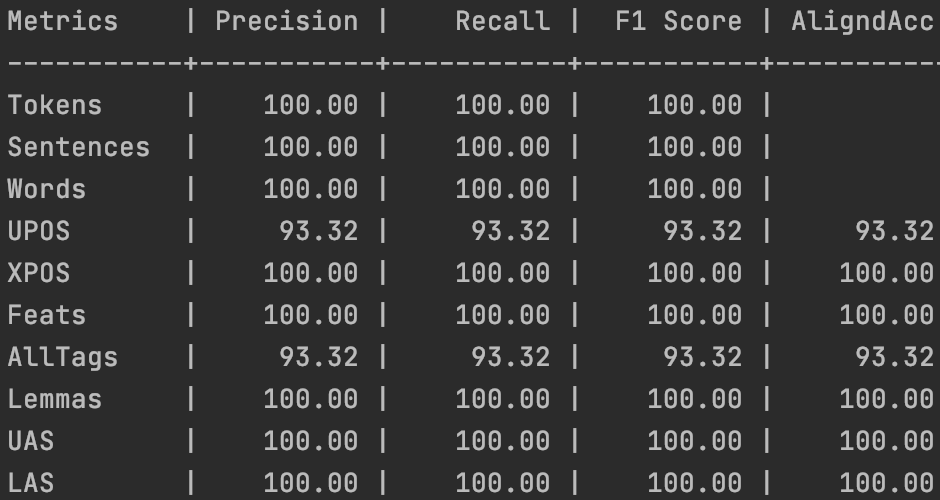

# 2. Larger window

I make the variable `context` looks like this:
['-START-','-START2-','-START3-',"it's",'it',"'s",'a','little','hard','to','parse',',','but','at','this','point','his','ostensible','view','is','that','the','gateses','are','very','good','money','-','redistributors',',','and','he','wants','them','to','have','the','money','as','soon','as','possible','.','-END-','-END2-','-END3-'].
So the word we are interested has a larger view.

In [ ]:
# major modification to _get_feature()
"""
add('i-3 tag', prev3)
add('i tag+i-2 tag+i-3 tag', prev, prev2, prev3)
add('i-2 tag+i-1 tag+i word', prev, prev2, context[i])
add('i-3 tag+i-2 tag+i-1 tag+i word', prev, prev2, prev3, context[i])
add('i-2 word', context[i - 2])
add('i-3 word', context[i - 3])
add('i-1 suffix2', context[i - 1][-2:])
add('i-1 suffix1', context[i - 1][-1:])
add('i+1 suffix2', context[i + 1][-2:])
add('i+1 suffix1', context[i + 1][-1:])
"""

In [16]:
import tagger_larger_window
corpus_train_file = open('../UD_English-EWT/en_ewt-ud-train.conllu')
corpus_test_file = open('../UD_English-EWT/en_ewt-ud-test.conllu')
model_file_win = 'en-ud-win.dat'

In [14]:
tagger_larger_window.trainer(corpus_train_file, model_file_win)

Iter 0: 182097/207053=87.94704737434377


Iter 1: 192233/207053=92.8424123292104


Iter 2: 196666/207053=94.98341004477115


Iter 3: 199625/207053=96.4125127382844
Iter 4: 201225/207053=97.18526174457747


In [15]:
# tag the test set
tagger_larger_window.tagger(corpus_test_file, model_file_win)

# newdoc id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200
# sent_id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200-0001
# newpar id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200-p0001
# text = What if Google Morphed Into GoogleOS?
1	What	what	PRON	WP	PronType=Int	0	root	0:root	_
2	if	if	SCONJ	IN	_	4	mark	4:mark	_
3	Google	Google	PROPN	NNP	Number=Sing	4	nsubj	4:nsubj	_
4	Morphed	morph	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	1	advcl	1:advcl:if	_
5	Into	into	ADP	IN	_	6	case	6:case	_
6	GoogleOS	GoogleOS	PROPN	NNP	Number=Sing	4	obl	4:obl:into	SpaceAfter=No
7	?	?	PUNCT	.	_	4	punct	4:punct	_

# sent_id = weblog-blogspot.com_zentelligence_20040423000200_ENG_20040423_000200-0002
# text = What if Google expanded on its search-engine (and now e-mail) wares into a full-fledged operating system?
1	What	what	PRON	WP	PronType=Int	0	root	0:root	_
2	if	if	SCONJ	IN	_	4	mark	4:mark	_
3	Google	Google	PROPN	NNP	Number=Sing	4	nsubj	

1	This	this	DET	DT	Number=Sing|PronType=Dem	3	det	3:det	_
2	Fallujah	Fallujah	PROPN	NNP	Number=Sing	3	compound	3:compound	_
3	operation	operation	ADP	NN	Number=Sing	5	nsubj	5:nsubj|12:nsubj:xsubj	_
4	my	may	PRON	MD	Typo=Yes|VerbForm=Fin	5	aux	5:aux	_
5	turn	turn	NOUN	VB	VerbForm=Inf	0	root	0:root	_
6	out	out	ADP	RP	_	5	compound:prt	5:compound:prt	_
7	to	to	PART	TO	_	12	mark	12:mark	_
8	be	be	AUX	VB	VerbForm=Inf	12	cop	12:cop	_
9	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
10	most	most	ADV	RBS	_	11	advmod	11:advmod	_
11	important	important	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	operation	operation	NOUN	NN	Number=Sing	5	xcomp	5:xcomp	_
13	done	do	VERB	VBN	Tense=Past|VerbForm=Part	12	advcl	12:advcl	_
14	by	by	ADP	IN	_	17	case	17:case	_
15	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
16	US	US	PROPN	NNP	Number=Sing	17	compound	17:compound	_
17	Military	military	PROPN	NN	Number=Sing	13	obl	13:obl:by	_
18	since	since	ADP	IN	_	20	case	20:case	_
19	the	the	DET	DT	Defini

1	Reuters	Reuters	PROPN	NNP	Number=Sing	2	nsubj	2:nsubj	_
2	reported	report	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	that	that	SCONJ	IN	_	10	mark	10:mark	_
4	"	"	PUNCT	``	_	10	punct	10:punct	SpaceAfter=No
5	Sunni	sunni	ADJ	JJ	Degree=Pos	6	amod	6:amod	_
6	clerics	cleric	NOUN	NNS	Number=Plur	10	nsubj	10:nsubj	_
7	in	in	ADP	IN	_	9	case	9:case	_
8	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
9	town	town	NOUN	NN	Number=Sing	6	nmod	6:nmod:in	_
10	issued	issue	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	2	ccomp	2:ccomp	_
11	a	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
12	'	'	PUNCT	``	_	13	punct	13:punct	SpaceAfter=No
13	Declaration	declaration	NOUN	NN	Number=Sing	10	obj	10:obj	_
14	by	by	ADP	IN	_	16	case	16:case	_
15	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
16	people	people	NOUN	NNS	Number=Plur	13	nmod	13:nmod:by	_
17	of	of	ADP	IN	_	18	case	18:case	_
18	Fallujah	Fallujah	PROPN	NNP	Number=Sing	16	nmod	16:nmod:of	SpaceAfter=No
19	'	'	PUNCT	''	_

1	The	the	DET	DT	Definite=Def|PronType=Art	3	det	3:det	_
2	Supreme	Supreme	PROPN	NNP	Number=Sing	3	compound	3:compound	_
3	Court	Court	PROPN	NNP	Number=Sing	4	nsubj	4:nsubj	_
4	announced	announce	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
5	its	its	PRON	PRP$	Gender=Neut|Number=Sing|Person=3|Poss=Yes|PronType=Prs	6	nmod:poss	6:nmod:poss	_
6	ruling	ruling	VERB	NN	Number=Sing	4	obj	4:obj	_
7	today	today	NOUN	NN	Number=Sing	4	obl:tmod	4:obl:tmod	_
8	in	in	ADP	IN	_	9	case	9:case	_
9	Hamdan	Hamdan	PROPN	NNP	Number=Sing	6	nmod	6:nmod:in	_
10	v.	v.	PROPN	IN	_	11	case	11:case	_
11	Rumsfeld	Rumsfeld	PROPN	NNP	Number=Sing	9	nmod	9:nmod:versus	_
12	divided	divide	VERB	VBN	Tense=Past|VerbForm=Part	3	acl	3:acl	_
13	along	along	ADP	IN	_	15	case	15:case	_
14	idelogical	idelogical	ADJ	JJ	Degree=Pos	15	amod	15:amod	_
15	lines	line	NOUN	NNS	Number=Plur	12	obl	12:obl:along	_
16	with	with	ADP	IN	_	19	mark	19:mark	_
17	John	John	PROPN	NNP	Number=Sing	19	nsubj	19:nsubj	_
18	Roberts	Roberts	PRO

1	Important	important	ADJ	JJ	Degree=Pos	2	amod	2:amod	_
2	news	news	NOUN	NN	Number=Sing	51	nsubj	51:nsubj	_
3	such	such	ADJ	JJ	Degree=Pos	9	case	9:case	_
4	as	as	ADP	IN	_	3	fixed	3:fixed	_
5	President	President	PROPN	NNP	Number=Sing	9	nmod:poss	9:nmod:poss	_
6-7	Bush's	_	_	_	_	_	_	_	_
6	Bush	Bush	PROPN	NNP	Number=Sing	5	flat	5:flat	_
7	's	's	PART	POS	_	5	case	5:case	_
8	miniscule	miniscule	NOUN	JJ	Degree=Pos	9	amod	9:amod	_
9	calibrations	calibration	NOUN	NNS	Number=Plur	2	nmod	2:nmod:such_as	_
10	on	on	ADP	IN	_	13	case	13:case	_
11	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	13	nmod:poss	13:nmod:poss	_
12	marriage	marriage	NOUN	NN	Number=Sing	13	compound	13:compound	_
13	amendment	amendment	NOUN	NN	Number=Sing	9	nmod	9:nmod:on	SpaceAfter=No
14	/	/	PUNCT	SYM	_	15	cc	15:cc	SpaceAfter=No
15	anti-gay	anti-gay	NOUN	JJ	Degree=Pos	13	conj	9:nmod:on|13:conj	_
16	(	(	PUNCT	-LRB-	_	17	punct	17:punct	SpaceAfter=No
17	update	update	NOUN	NN	Number=Sing	15	parataxis	15:p

1	The	the	DET	DT	Definite=Def|PronType=Art	3	det	3:det	_
2	African	African	ADJ	NNP	Number=Sing	3	compound	3:compound	_
3	Union	Union	NOUN	NNP	Number=Sing	10	nsubj	10:nsubj	_
4	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	10	cop	10:cop	_
5	clearly	clearly	ADV	RB	_	10	advmod	10:advmod	_
6	not	not	PART	RB	_	10	advmod	10:advmod	_
7	up	up	ADP	IN	_	10	case	10:case	_
8	to	to	ADP	IN	_	7	fixed	7:fixed	_
9	the	the	DET	DT	Definite=Def|PronType=Art	10	det	10:det	_
10	task	task	NOUN	NN	Number=Sing	0	root	0:root	_
11	of	of	SCONJ	IN	_	12	mark	12:mark	_
12	keeping	keep	VERB	VBG	VerbForm=Ger	10	acl	10:acl:of	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	peace	peace	NOUN	NN	Number=Sing	12	obj	12:obj	SpaceAfter=No
15	,	,	PUNCT	,	_	10	punct	10:punct	_
16	pledging	pledge	VERB	VBG	VerbForm=Ger	10	advcl	10:advcl	_
17	300	300	NUM	CD	NumType=Card	18	nummod	18:nummod	_
18	troops	troops	NOUN	NNS	Number=Plur	16	obj	16:obj	_
19	to	to	ADP	IN	_	21	case	21:case	_
20	an	a	DET	

1-2	It's	_	_	_	_	_	_	_	_
1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	5	nsubj	5:nsubj	_
2	's	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	4	det	4:det	_
4	little	little	ADJ	JJ	Degree=Pos	5	obl:npmod	5:obl:npmod	_
5	hard	hard	ADJ	JJ	Degree=Pos	0	root	0:root	_
6	to	to	PART	TO	_	7	mark	7:mark	_
7	parse	parse	VERB	VB	VerbForm=Inf	5	ccomp	5:ccomp	SpaceAfter=No
8	,	,	PUNCT	,	_	16	punct	16:punct	_
9	but	but	CCONJ	CC	_	16	cc	16:cc	_
10	at	at	ADP	IN	_	12	case	12:case	_
11	this	this	DET	DT	Number=Sing|PronType=Dem	12	det	12:det	_
12	point	point	NOUN	NN	Number=Sing	16	obl	16:obl:at	_
13	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	15	nmod:poss	15:nmod:poss	_
14	ostensible	ostensible	ADJ	JJ	Degree=Pos	15	amod	15:amod	_
15	view	view	NOUN	NN	Number=Sing	16	nsubj	16:nsubj	_
16	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	conj	5:conj:but	_
17	that	that	

1-2	He's	_	_	_	_	_	_	_	_
1	He	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	4	nsubj	4:nsubj	_
2	's	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	4	aux	4:aux	_
3	not	not	PART	RB	_	4	advmod	4:advmod	_
4	giving	give	VERB	VBG	Tense=Pres|VerbForm=Part	0	root	0:root	_
5	85	85	NUM	CD	NumType=Card	6	nummod	6:nummod	SpaceAfter=No
6	%	%	SYM	NN	Number=Sing	4	obj	4:obj	_
7	away	away	ADV	RP	_	4	compound:prt	4:compound:prt	SpaceAfter=No
8	,	,	PUNCT	,	_	4	punct	4:punct	_
9-10	he's	_	_	_	_	_	_	_	_
9	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	11	nsubj	11:nsubj	_
10	's	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	11	aux	11:aux	_
11	giving	give	VERB	VBG	Tense=Pres|VerbForm=Part	4	ccomp	4:ccomp	_
12	a	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
13	number	number	NOUN	NN	Number=Sing	11	obj	11:obj	_
14	of	of	ADP	IN	_	15	case	15:case	_
15	shares	share	NOUN	NNS	Number=Plur	13	nmod	13:nmod:of|19:nsubj	_
16	each	each	DE

1	To	to	ADP	IN	_	3	case	3:case	_
2	the	the	DET	DT	Definite=Def|PronType=Art	3	det	3:det	_
3	north	north	NOUN	NN	Number=Sing	8	obl	8:obl:to	_
4	in	in	ADP	IN	_	5	case	5:case	_
5	Lebanon	Lebanon	PROPN	NNP	Number=Sing	8	obl	8:obl:in	SpaceAfter=No
6	,	,	PUNCT	,	_	8	punct	8:punct	_
7	there	there	PRON	EX	_	8	expl	8:expl	_
8	is	be	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
9	serious	serious	ADJ	JJ	Degree=Pos	10	amod	10:amod	_
10	debate	debate	NOUN	NN	Number=Sing	8	nsubj	8:nsubj	_
11	within	within	ADP	IN	_	12	case	12:case	_
12	Hezbollah	Hezbollah	PROPN	NNP	Number=Sing	10	nmod	10:nmod:within	_
13	about	about	SCONJ	IN	_	14	mark	14:mark	_
14	entering	enter	VERB	VBG	VerbForm=Ger	10	acl	10:acl:about	_
15	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
16	Lebanese	lebanese	ADJ	JJ	Degree=Pos	18	amod	18:amod	_
17	political	political	ADJ	JJ	Degree=Pos	18	amod	18:amod	_
18	process	process	NOUN	NN	Number=Sing	14	obj	14:obj	_
19	in	in	ADP	IN	_	20	case	20:case	_


1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	media	media	NOUN	NN	Number=Sing	4	nsubj	4:nsubj	_
3	routinely	routinely	ADV	RB	_	4	advmod	4:advmod	_
4	obscures	obscure	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
5	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	lines	line	NOUN	NNS	Number=Plur	4	obj	4:obj	_
7	between	between	ADP	IN	_	8	case	8:case	_
8	terrorism	terrorism	NOUN	NN	Number=Sing	6	nmod	6:nmod:between	_
9	and	and	CCONJ	CC	_	11	cc	11:cc	_
10	legitimate	legitimate	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	resistance	resistance	NOUN	NN	Number=Sing	8	conj	6:nmod:between|8:conj:and	SpaceAfter=No
12	,	,	PUNCT	,	_	4	punct	4:punct	_
13	as	as	SCONJ	IN	_	25	mark	25:mark	_
14	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
15	recent	recent	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
16	article	article	NOUN	NN	Number=Sing	25	nsubj	25:nsubj	_
17	by	by	ADP	IN	_	18	case	18:case	_
18	Daniel	Daniel	PROPN	NNP	Number=Sing	16	nmod	16:nmod:by	_

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	IIP	IIP	PROPN	NNP	Number=Sing	8	nsubj	8:nsubj|24:nsubj:pass	_
3	had	have	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	8	aux	8:aux	_
4	also	also	ADV	RB	_	8	advmod	8:advmod	_
5	been	be	AUX	VBN	Tense=Past|VerbForm=Part	8	cop	8:cop	_
6	the	the	DET	DT	Definite=Def|PronType=Art	8	det	8:det	_
7	main	main	ADJ	JJ	Degree=Pos	8	amod	8:amod	_
8	force	force	NOUN	NN	Number=Sing	0	root	0:root	_
9	urging	urge	VERB	VBG	VerbForm=Ger	8	acl	8:acl	_
10	Sunni	sunni	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	Arabs	Arabs	PROPN	NNPS	Number=Plur	9	obj	9:obj|13:nsubj:xsubj	_
12	to	to	PART	TO	_	13	mark	13:mark	_
13	participate	participate	VERB	VB	VerbForm=Inf	9	xcomp	9:xcomp	_
14	in	in	ADP	IN	_	16	case	16:case	_
15	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
16	elections	election	NOUN	NNS	Number=Plur	13	obl	13:obl:in	_
17	scheduled	schedule	VERB	VBN	Tense=Past|VerbForm=Part	16	acl	16:acl	_
18	for	for	ADP	IN	_	19	case	19:case	_
19	January	January	PROP

1	The	the	DET	DT	Definite=Def|PronType=Art	3	det	3:det	_
2	Sunni	sunni	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	AMS	AMS	PROPN	NNP	Number=Sing	4	nsubj	4:nsubj	_
4	told	tell	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
5	Iraqis	Iraqis	PROPN	NNPS	Number=Plur	4	obj	4:obj	SpaceAfter=No
6	,	,	PUNCT	,	_	4	punct	4:punct	_
7	"	"	PUNCT	``	_	4	punct	4:punct	SpaceAfter=No
8	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	9	nsubj	9:nsubj|23:nsubj	_
9	sinned	sin	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	4	ccomp	4:ccomp	_
10	when	when	SCONJ	WRB	PronType=Int	12	mark	12:mark	_
11	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	12	nsubj	12:nsubj	_
12	participated	participate	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	9	advcl	9:advcl:when	_
13	with	with	ADP	IN	_	15	case	15:case	_
14	occupation	occupation	NOUN	NN	Number=Sing	15	compound	15:compound	_
15	forces	force	NOUN	NNS	Number=Plur	12	obl	12:obl:with	_
16	in	in	ADP	IN	_	18	case	18:case	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:de

24	supported	support	VERB	VBN	Tense=Past|VerbForm=Part	16	acl:relcl	16:acl:relcl	_
25	Saddam	Saddam	PROPN	NNP	Number=Sing	24	obj	24:obj	_
26	and	and	CCONJ	CC	_	29	cc	29:cc	_
27	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	29	nmod:poss	29:nmod:poss	_
28	anti-Shiite	anti-shiite	ADJ	JJ	Degree=Pos	29	amod	29:amod	_
29	pogroms	pogrom	NOUN	NNS	Number=Plur	25	conj	24:obj|25:conj:and	SpaceAfter=No
30	.	.	PUNCT	.	_	8	punct	8:punct	_

# newdoc id = weblog-blogspot.com_aggressivevoicedaily_20060811122000_ENG_20060811_122000
# sent_id = weblog-blogspot.com_aggressivevoicedaily_20060811122000_ENG_20060811_122000-0001
# newpar id = weblog-blogspot.com_aggressivevoicedaily_20060811122000_ENG_20060811_122000-p0001
# text = President Bush pinched a few nerves yesterday with his choice of words:
1	President	President	PROPN	NNP	Number=Sing	3	nsubj	3:nsubj	_
2	Bush	Bush	PROPN	NNP	Number=Sing	1	flat	1:flat	_
3	pinched	pinch	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	

1-2	We're	_	_	_	_	_	_	_	_
1	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
2	're	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	cop	4:cop	_
3	at	at	ADP	IN	_	4	case	4:case	_
4	war	war	NOUN	NN	Number=Sing	0	root	0:root	_
5	with	with	ADP	IN	_	7	case	7:case	_
6	Islamic	islamic	PROPN	JJ	Degree=Pos	7	amod	7:amod	_
7	fascists	fascist	NOUN	NNS	Number=Plur	4	nmod	4:nmod:with	SpaceAfter=No
8	.	.	PUNCT	.	_	4	punct	4:punct	_

# sent_id = weblog-blogspot.com_aggressivevoicedaily_20060811122000_ENG_20060811_122000-0008
# text = By using the word "Islamic" as an adjective Bush was purposely not associating Muslims with fascism, hence the qualifier.
1	By	by	SCONJ	IN	_	2	mark	2:mark	_
2	using	use	VERB	VBG	VerbForm=Ger	15	advcl	15:advcl:by	_
3	the	the	DET	DT	Definite=Def|PronType=Art	4	det	4:det	_
4	word	word	NOUN	NN	Number=Sing	2	obj	2:obj	_
5	"	"	PUNCT	``	_	6	punct	6:punct	SpaceAfter=No
6	Islamic	islamic	PROPN	JJ	Degree=Pos	4	appos	4:appos	SpaceAfter=No
7	"	"	PUNCT	''	_	6	p

1-2	We've	_	_	_	_	_	_	_	_
1	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
2	've	have	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	aux	3:aux	_
3	got	get	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	5	det	5:det	_
5	Steven	Steven	NOUN	NNP	Number=Sing	3	obj	3:obj	SpaceAfter=No
6	,	,	PUNCT	,	_	5	punct	5:punct	_
7	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
8	one	one	NUM	CD	NumType=Card	9	nummod	9:nummod	_
9	word	word	NOUN	NN	Number=Sing	5	appos	5:appos|13:nsubj	_
10	that	that	PRON	WDT	PronType=Rel	13	nsubj	9:ref	_
11-12	didn't	_	_	_	_	_	_	_	_
11	did	do	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	13	aux	13:aux	_
12	n't	not	PART	RB	_	13	advmod	13:advmod	_
13	crash	crash	VERB	VB	VerbForm=Inf	9	acl:relcl	9:acl:relcl	_
14	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	17	nmod:poss	17:nmod:poss	_
15	spell	spell	NOUN	NN	Number=Sing	17	compound	17:compound	SpaceAfter=No
16	-	-	PUNCT	HYPH	_	17	punct	17:punct	

1	One	one	NUM	CD	NumType=Card	2	nummod	2:nummod	_
2	witness	witness	NOUN	NN	Number=Sing	9	nsubj	9:nsubj	_
3	at	at	ADP	IN	_	5	case	5:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
5	Moutasaddiq	Moutasaddiq	PROPN	NNP	Number=Sing	2	nmod	2:nmod:at	_
6	trial	trial	NOUN	NN	Number=Sing	5	flat	5:flat	_
7	in	in	ADP	IN	_	8	case	8:case	_
8	Germany	Germany	PROPN	NNP	Number=Sing	5	nmod	5:nmod:in	_
9	alleged	allege	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
10	that	that	SCONJ	IN	_	14	mark	14:mark	_
11	Zarqawi	Zarqawi	PROPN	NNP	Number=Sing	14	nsubj	14:nsubj	_
12	had	have	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	14	aux	14:aux	_
13	not	not	PART	RB	_	14	advmod	14:advmod	_
14	allowed	allow	VERB	VBN	Tense=Past|VerbForm=Part	9	ccomp	9:ccomp	_
15	Monotheism	Monotheism	PROPN	NNP	Number=Sing	14	obj	14:obj|20:nsubj:xsubj	_
16	and	and	CCONJ	CC	_	18	cc	18:cc	_
17	Holy	Holy	PROPN	NNP	Number=Sing	18	compound	18:compound	_
18	War	War	PROPN	NNP	Number=Sing	15	conj	14:obj|15:conj:and|2

1	In	in	ADP	IN	_	2	case	2:case	_
2	1998	1998	NUM	CD	NumType=Card	5	obl	5:obl:in	_
3	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	5	nsubj:pass	5:nsubj:pass	_
4	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	5	aux:pass	5:aux:pass	_
5	joined	join	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
6	by	by	ADP	IN	_	7	case	7:case	_
7	Egyptians	Egyptians	PROPN	NNPS	Number=Plur	5	obl	5:obl:by	_
8	from	from	ADP	IN	_	16	case	16:case	_
9	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
10	al	al	PROPN	NNP	Number=Sing	12	compound	12:compound	SpaceAfter=No
11	-	-	PUNCT	HYPH	_	12	punct	12:punct	SpaceAfter=No
12	Jihad	Jihad	PROPN	NNP	Number=Sing	15	compound	15:compound	_
13	al	al	PROPN	NNP	Number=Sing	15	compound	15:compound	SpaceAfter=No
14	-	-	PUNCT	HYPH	_	15	punct	15:punct	SpaceAfter=No
15	Islami	Islami	PROPN	NNP	Number=Sing	16	compound	16:compound	_
16	group	group	NOUN	NN	Number=Sing	7	nmod	7:nmod:from	_
17	of	of	ADP	IN	_	18	case	18:case	_
18	Ayman	Ayman	PROPN	

1	Monotheism	Monotheism	PROPN	NNP	Number=Sing	7	nsubj	7:nsubj	_
2	and	and	CCONJ	CC	_	4	cc	4:cc	_
3	Holy	Holy	PROPN	NNP	Number=Sing	4	compound	4:compound	_
4	War	War	PROPN	NNP	Number=Sing	1	conj	1:conj:and|7:nsubj	_
5	obviously	obviously	ADV	RB	_	7	advmod	7:advmod	_
6	does	do	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	7	aux	7:aux	_
7	have	have	VERB	VB	VerbForm=Inf	0	root	0:root	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	10	det	10:det	_
9	violent	violent	ADJ	JJ	Degree=Pos	10	amod	10:amod	_
10	interpretation	interpretation	NOUN	NN	Number=Sing	7	obj	7:obj	_
11	of	of	ADP	IN	_	12	case	12:case	_
12	Salafism	Salafism	PROPN	NNP	Number=Sing	10	nmod	10:nmod:of	SpaceAfter=No
13	,	,	PUNCT	,	_	7	punct	7:punct	_
14	rather	rather	ADV	RB	_	30	advmod	30:advmod	_
15	as	as	ADP	IN	_	30	mark	30:mark	_
16	the	the	DET	DT	Definite=Def|PronType=Art	30	reparandum	30:reparandum	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	leaders	leader	NOUN	NNS	Number=Plur	30	nsubj	30:nsubj	_

1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj	_
2	notes	note	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	10	10	NUM	CD	NumType=Card	4	nummod	4:nummod	_
4	points	point	NOUN	NNS	Number=Plur	2	obj	2:obj|9:obl	_
5	at	at	ADP	IN	_	6	case	6:case	_
6	which	which	PRON	WDT	PronType=Rel	9	obl	4:ref	_
7	the	the	DET	DT	Definite=Def|PronType=Art	8	det	8:det	_
8	US	US	PROPN	NNP	Number=Sing	9	nsubj	9:nsubj	_
9	made	make	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	4	acl:relcl	4:acl:relcl	_
10	key	key	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	mistakes	mistake	NOUN	NNS	Number=Plur	9	obj	9:obj|15:nsubj	_
12	that	that	PRON	WDT	PronType=Rel	15	nsubj	11:ref	_
13	might	might	AUX	MD	VerbForm=Fin	15	aux	15:aux	_
14	have	have	AUX	VB	VerbForm=Inf	15	aux	15:aux	_
15	stopped	stop	VERB	VBN	Tense=Past|VerbForm=Part	11	acl:relcl	11:acl:relcl	_
16	Bin	Bin	PROPN	NNP	Number=Sing	19	nmod:poss	19:nmod:poss	_
17-18	Laden's	_	_	_	_	_	_	_	_
17	Laden	Lade

1	Wolfowitz	Wolfowitz	AUX	NNP	Number=Sing	2	nsubj	2:nsubj	_
2	contradicted	contradict	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	counter-terrorism	counter-terrorism	NOUN	NN	Number=Sing	4	compound	4:compound	_
4	czar	czar	NOUN	NN	Number=Sing	5	compound	5:compound	_
5	Richard	Richard	PROPN	NNP	Number=Sing	2	obj	2:obj	_
6	Clarke	Clarke	PROPN	NNP	Number=Sing	5	flat	5:flat	_
7	when	when	SCONJ	WRB	PronType=Int	10	mark	10:mark	_
8	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
9	latter	latter	ADJ	JJ	Degree=Pos	10	nsubj	10:nsubj	_
10	spoke	speak	NOUN	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	2	advcl	2:advcl:when	_
11	of	of	ADP	IN	_	16	case	16:case	_
12	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
13	al	al	PROPN	NNP	Number=Sing	15	compound	15:compound	SpaceAfter=No
14	-	-	PUNCT	HYPH	_	15	punct	15:punct	SpaceAfter=No
15	Qaeda	Qaeda	PROPN	NNP	Number=Sing	16	compound	16:compound	_
16	threat	threat	NOUN	NN	Number=Sing	10	obl	10:obl:of	SpaceAfter=No
17	,	,	PUNCT	,	_	2

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	Pentagon	Pentagon	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
3	did	do	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	6	aux	6:aux	_
4	not	not	PART	RB	_	6	advmod	6:advmod	_
5	even	even	ADV	RB	_	6	advmod	6:advmod	_
6	have	have	VERB	VB	VerbForm=Inf	0	root	0:root	_
7	a	a	DET	DT	Definite=Ind|PronType=Art	8	det	8:det	_
8	plan	plan	NOUN	NN	Number=Sing	6	obj	6:obj|20:obj	_
9	for	for	SCONJ	IN	_	10	mark	10:mark	_
10	dealing	deal	VERB	VBG	VerbForm=Ger	8	acl	8:acl:for	_
11	with	with	ADP	IN	_	12	case	12:case	_
12	Afghanistan	Afghanistan	PROPN	NNP	Number=Sing	10	obl	10:obl:with	_
13	or	or	CCONJ	CC	_	16	cc	16:cc	_
14	al	al	PROPN	NNP	Number=Sing	16	compound	16:compound	SpaceAfter=No
15	-	-	PUNCT	HYPH	_	16	punct	16:punct	SpaceAfter=No
16	Qaeda	Qaeda	PROPN	NNP	Number=Sing	12	conj	10:obl:with|12:conj:or	_
17	that	that	SCONJ	WDT	PronType=Rel	20	obj	8:ref	_
18	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	20	nsubj	20:nsubj	_
19	could	

1	Dick	Dick	PROPN	NNP	Number=Sing	5	nsubj	5:nsubj	_
2	could	could	AUX	MD	VerbForm=Fin	5	aux	5:aux	_
3	never	never	ADV	RB	_	5	advmod	5:advmod	_
4	thereafter	thereafter	ADV	RB	_	5	advmod	5:advmod	_
5	get	get	VERB	VB	VerbForm=Inf	0	root	0:root	_
6	any	any	DET	DT	_	8	det	8:det	_
7	real	real	ADJ	JJ	Degree=Pos	8	amod	8:amod	_
8	cooperation	cooperation	NOUN	NN	Number=Sing	5	obj	5:obj	_
9	from	from	ADP	IN	_	12	case	12:case	_
10	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
11	cabinet	cabinet	NOUN	NN	Number=Sing	12	compound	12:compound	_
12	officers	officer	NOUN	NNS	Number=Plur	8	nmod	8:nmod:from|15:nsubj	SpaceAfter=No
13	,	,	PUNCT	,	_	12	punct	12:punct	_
14	who	who	PRON	WP	PronType=Rel	15	nsubj	12:ref	_
15	outranked	outrank	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	12	acl:relcl	12:acl:relcl	_
16	him	he	PRON	PRP	Case=Acc|Gender=Masc|Number=Sing|Person=3|PronType=Prs	15	obj	15:obj	SpaceAfter=No
17	,	,	PUNCT	,	_	22	punct	22:punct	_
18	and	and	CCONJ	CC	_	22	cc	22:cc	_
19	he	he	PRON	PRP	

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	gods	god	NOUN	NNS	Number=Plur	3	nsubj	3:nsubj	_
3-4	weren't	_	_	_	_	_	_	_	_
3	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
4	n't	not	PART	RB	_	3	advmod	3:advmod	_
5	with	with	ADP	IN	_	6	case	6:case	_
6	us	we	PRON	PRP	Case=Acc|Number=Plur|Person=1|PronType=Prs	3	obl	3:obl:with	_
7	on	on	ADP	IN	_	9	case	9:case	_
8	that	that	DET	DT	Number=Sing|PronType=Dem	9	det	9:det	_
9	one	one	NOUN	CD	NumType=Card	3	obl	3:obl:on	SpaceAfter=No
10	.	.	PUNCT	.	_	3	punct	3:punct	_

# newdoc id = email-enronsent23_09
# sent_id = email-enronsent23_09-0001
# newpar id = email-enronsent23_09-p0001
# text = that is how i want you to refer to me as "the king"
1	that	that	PRON	DT	Number=Sing|PronType=Dem	2	nsubj	2:nsubj	_
2	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	how	how	SCONJ	WRB	PronType=Int	5	mark	5:mark	_
4	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj	_
5	want

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	heard	hear	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	that	that	SCONJ	IN	_	7	mark	7:mark	_
4	more	more	ADJ	JJR	Degree=Cmp	7	nsubj	7:nsubj	_
5	may	may	AUX	MD	VerbForm=Fin	7	aux	7:aux	_
6	be	be	AUX	VB	VerbForm=Inf	7	aux	7:aux	_
7	going	go	VERB	VBG	Tense=Pres|VerbForm=Part	2	ccomp	2:ccomp	_
8	up	up	ADP	RP	_	7	advmod	7:advmod	_
9	for	for	ADP	IN	_	10	case	10:case	_
10	sale	sale	NOUN	NN	Number=Sing	8	obl	8:obl:for	_
11	in	in	ADP	IN	_	14	case	14:case	_
12	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
13	next	next	ADJ	JJ	Degree=Pos	14	amod	14:amod	_
14	month	month	NOUN	NN	Number=Sing	7	obl	7:obl:in	_
15	or	or	CCONJ	CC	_	16	cc	16:cc	_
16	do	do	NOUN	RB	_	14	nummod	14:nummod	SpaceAfter=No
17	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = email-enronsent23_03-0007
# text = Someone told me that Chase is planning a shitload of layoffs.
1	Someone	someone	PROPN	NN	Number=Sing	2	nsubj	2:nsubj	_
2	tol

19	hilary.ackermann@gs.com	hilary.ackermann@gs.com	X	ADD	_	1	appos	1:appos	_

# sent_id = email-enronsent21_01-0007
# text = Not going well
1	Not	not	ADV	RB	_	2	advmod	2:advmod	_
2	going	go	VERB	VBG	VerbForm=Ger	0	root	0:root	_
3	well	well	ADV	RB	Degree=Pos	2	advmod	2:advmod	_

# sent_id = email-enronsent21_01-0008
# newpar id = email-enronsent21_01-p0004
# text = Hello Louise,
1	Hello	hello	PROPN	UH	_	0	root	0:root	_
2	Louise	Louise	PROPN	NNP	Number=Sing	1	vocative	1:vocative	SpaceAfter=No
3	,	,	PUNCT	,	_	1	punct	1:punct	_

# sent_id = email-enronsent21_01-0009
# newpar id = email-enronsent21_01-p0005
# text = I know you must be going nuts with all the events, so I have not called.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	know	know	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	6	nsubj	6:nsubj|7:nsubj:xsubj	_
4	must	must	AUX	MD	VerbForm=Fin	6	aux	6:aux	_
5	be	be	AUX	VB	VerbForm=Inf	6	aux	

1-2	I'm	_	_	_	_	_	_	_	_
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
2	'm	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	aux	4:aux	_
3	not	not	PART	RB	_	4	advmod	4:advmod	_
4	driving	drive	VERB	VBG	Tense=Pres|VerbForm=Part	0	root	0:root	_
5	tonite	tonite	ADJ	NN	Number=Sing	4	obl:tmod	4:obl:tmod	SpaceAfter=No
6	,	,	PUNCT	,	_	9	punct	9:punct	_
7	but	but	CCONJ	CC	_	9	cc	9:cc	_
8	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	9	nsubj	9:nsubj	_
9	bet	bet	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	conj	4:conj:but	_
10	that	that	SCONJ	IN	_	13	mark	13:mark	_
11	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	13	nsubj	13:nsubj	_
12	could	could	AUX	MD	VerbForm=Fin	13	aux	13:aux	_
13	hitch	hitch	VERB	VB	VerbForm=Inf	9	ccomp	9:ccomp	_
14	a	a	DET	DT	Definite=Ind|PronType=Art	15	det	15:det	_
15	ride	ride	NOUN	NN	Number=Sing	13	obj	13:obj	_
16	back	back	ADV	RB	_	13	advmod	13:advmod	_
17	with	with	ADP	IN	_	18	case	18:case	_
18	Anil	Anil	PROPN	NNP	Numbe

1	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	stronger	stronger	NOUN	JJR	Degree=Cmp	4	amod	4:amod	_
4	will	will	AUX	NN	Number=Sing	2	obj	2:obj	_
5	than	than	ADP	IN	_	7	mark	7:mark	_
6	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	7	nsubj	7:nsubj	_
7	think	think	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	advcl	3:advcl:than	SpaceAfter=No
8	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = email-enronsent23_04-0015
# text = house of pies here i come.
1	house	house	NOUN	NNP	Number=Sing	6	vocative	6:vocative	_
2	of	of	ADP	IN	_	3	case	3:case	_
3	pies	pies	NOUN	NNPS	Number=Plur	1	nmod	1:nmod:of	_
4	here	here	ADV	RB	PronType=Dem	6	advmod	6:advmod	_
5	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	6	nsubj	6:nsubj	_
6	come	come	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	SpaceAfter=No
7	.	.	PUNCT	.	_	6	punct	6:punct	_

# sent_id = email-enronsent23_04-0016
# newpar id = email-

1	Magali	Magali	PROPN	NNP	Number=Sing	0	root	0:root	_
2	Van	Van	PROPN	NNP	Number=Sing	1	flat	1:flat	_
3	Belle	Belle	PROPN	NNP	Number=Sing	1	flat	1:flat	_
4	Consultant	consultant	PROPN	NN	Number=Sing	1	list	1:list	_
5	PHB	PHB	PROPN	NNP	Number=Sing	1	list	1:list	_
6	Hagler	Hagler	PROPN	NNP	Number=Sing	5	flat	5:flat	_
7	Bailly	Bailly	ADV	NNP	Number=Sing	5	flat	5:flat	_
8	MANAGEMENT	MANAGEMENT	ADJ	NNP	Number=Sing	11	compound	11:compound	_
9	AND	and	CCONJ	CC	_	10	cc	10:cc	_
10	ECONOMIC	ECONOMIC	ADJ	NNP	Number=Sing	8	conj	8:conj:and|11:compound	_
11	CONSULTANTS	CONSULTANTS	PROPN	NNPS	Number=Plur	1	list	1:list	_
12	PHB	PHB	PROPN	NNP	Number=Sing	1	list	1:list	_
13	Hagler	Hagler	PROPN	NNP	Number=Sing	12	flat	12:flat	_
14	Bailly	Bailly	PROPN	NNP	Number=Sing	12	flat	12:flat	SpaceAfter=No
15	,	,	PUNCT	,	_	12	punct	12:punct	_
16	Inc.	Inc.	PROPN	NNP	Number=Sing	12	flat	12:flat	_
17	(	(	PUNCT	-LRB-	_	20	punct	20:punct	SpaceAfter=No
18	202	202	NUM	CD	NumType=Card	20	nummod	20:nummod	SpaceAfter=No
19	)

1	Becky	Becky	PROPN	NNP	Number=Sing	0	root	0:root	_
2	A.	A.	PROPN	NNP	Number=Sing	1	flat	1:flat	_
3	Stephens	Stephens	PROPN	NNP	Number=Sing	1	flat	1:flat	_
4	Litigation	litigation	PROPN	NN	Number=Sing	5	compound	5:compound	_
5	Unit	unit	NOUN	NN	Number=Sing	1	appos	1:appos	SpaceAfter=No
6	,	,	PUNCT	,	_	1	punct	1:punct	_
7	Enron	Enron	PROPN	NNP	Number=Sing	8	compound	8:compound	_
8	Corp.	Corp.	PROPN	NNP	Number=Sing	1	appos	1:appos	_
9	713/853-5025	713/853-5025	NUM	CD	NumType=Card	10	nummod	10:nummod	_
10	EB	EB	PROPN	NNP	Number=Sing	1	list	1:list	SpaceAfter=No
11	4809	4809	NUM	CD	NumType=Card	10	nummod	10:nummod	_

# sent_id = email-enronsent32_02-0019
# text = I am on board.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
2	am	be	AUX	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	4	cop	4:cop	_
3	on	on	ADP	IN	_	4	case	4:case	_
4	board	board	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
5	.	.	PUNCT	.	_	4	punct	4:punct	_

# sent_id = email-enronsent3

1	Please	please	INTJ	UH	_	2	discourse	2:discourse	_
2	return	return	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
3	an	a	DET	DT	Definite=Ind|PronType=Art	5	det	5:det	_
4	executed	execute	VERB	VBN	Tense=Past|VerbForm=Part	5	amod	5:amod	_
5	copy	copy	NOUN	NN	Number=Sing	2	obj	2:obj	_
6	of	of	ADP	IN	_	7	case	7:case	_
7	confirm	confirm	NOUN	NN	Number=Sing	5	nmod	5:nmod:of	_
8	to	to	ADP	IN	_	9	case	9:case	_
9	me	I	PRON	PRP	Case=Acc|Number=Sing|Person=1|PronType=Prs	2	obl	2:obl:to	SpaceAfter=No
10	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = email-enronsent36_01-0012
# newpar id = email-enronsent36_01-p0006
# text = Thanks.
1	Thanks	thanks	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
2	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = email-enronsent36_01-0013
# text = sara
1	sara	sara	X	NNP	Number=Sing	0	root	0:root	_

# sent_id = email-enronsent36_01-0014
# newpar id = email-enronsent36_01-p0007
# text = My assistant Joanne Rozycki has cell, car numbers to reach me.
1	My	my	PRON	PRP$	Number=

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj|5:nsubj:xsubj	_
2	just	just	ADV	RB	_	3	advmod	3:advmod	_
3	wanted	want	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
4	to	to	PART	TO	_	5	mark	5:mark	_
5	follow	follow	VERB	VB	VerbForm=Inf	3	xcomp	3:xcomp	_
6	up	up	ADP	RP	_	5	compound:prt	5:compound:prt	_
7	on	on	ADP	IN	_	11	mark	11:mark	_
8	whether	whether	SCONJ	IN	_	11	mark	11:mark	_
9	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	11	nsubj	11:nsubj	_
10	will	will	AUX	MD	VerbForm=Fin	11	aux	11:aux	_
11	have	have	VERB	VB	VerbForm=Inf	5	ccomp	5:ccomp	_
12	a	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
13	chance	chance	NOUN	NN	Number=Sing	11	obj	11:obj	_
14	to	to	PART	TO	_	15	mark	15:mark	_
15	send	send	VERB	VB	VerbForm=Inf	13	acl	13:acl:to	_
16	a	a	DET	DT	Definite=Ind|PronType=Art	20	det	20:det	_
17	draft	draft	NOUN	NN	Number=Sing	20	compound	20:compound	_
18	Credit	credit	NOUN	NN	Number=Sing	19	compound	19:compound	_
19	Support	support	NOUN	NN	

1	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
2	just	just	ADV	RB	_	3	advmod	3:advmod	_
3	did	do	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	5	det	5:det	_
5	deal	deal	NOUN	NN	Number=Sing	3	obj	3:obj	_
6	for	for	ADP	IN	_	8	case	8:case	_
7	the	the	DET	DT	Definite=Def|PronType=Art	8	det	8:det	_
8	rest	rest	NOUN	NN	Number=Sing	5	nmod	5:nmod:for	_
9	of	of	ADP	IN	_	11	case	11:case	_
10	the	the	DET	DT	Definite=Def|PronType=Art	11	det	11:det	_
11	month	month	NOUN	NN	Number=Sing	8	nmod	8:nmod:of	_
12	for	for	ADP	IN	_	13	case	13:case	_
13	10,000	10,000	NUM	CD	NumType=Card	5	nmod	5:nmod:for	SpaceAfter=No
14	/	/	PUNCT	SYM	_	15	case	15:case	SpaceAfter=No
15	d	d	NOUN	NN	Number=Sing	13	nmod	13:nmod	_
16	at	at	ADP	IN	_	20	case	20:case	_
17	meter	meter	NOUN	NN	Number=Sing	20	compound	20:compound	_
18	#	#	SYM	NN	Number=Sing	20	compound	20:compound	_
19	1552	1552	NUM	CD	NumType=Card	20	nummod	20:nummod	_
20	QE	qe	PROPN	NN

2	game	game	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	_
3	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
4	at	at	ADP	IN	_	5	case	5:case	_
5	12	12	NUM	CD	NumType=Card	0	root	0:root	SpaceAfter=No
6	:	:	PUNCT	:	_	5	punct	5:punct	SpaceAfter=No
7	Sat	Sat	X	NNP	Number=Sing	5	nmod:npmod	5:nmod:npmod	_
8	@	@	ADP	IN	_	10	case	10:case	_
9	Compaq	Compaq	PROPN	NNP	Number=Sing	10	compound	10:compound	_
10	Center	Center	PROPN	NNP	Number=Sing	5	obl	5:obl	SpaceAfter=No
11	.	.	PUNCT	.	_	5	punct	5:punct	_

# sent_id = email-enronsent29_02-0007
# text = Would love for you to join us.
1	Would	would	AUX	MD	VerbForm=Fin	2	aux	2:aux	_
2	love	love	VERB	VB	VerbForm=Inf	0	root	0:root	_
3	for	for	ADP	IN	_	6	mark	6:mark	_
4	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	6	nsubj	6:nsubj	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	join	join	VERB	VB	VerbForm=Inf	2	ccomp	2:ccomp	_
7	us	we	PRON	PRP	Case=Acc|Number=Plur|Person=1|PronType=Prs	6	obj	6:obj	SpaceAfter=No
8	.	.	PUNCT	.	_	2	punct	2:pu

1	Also	also	ADV	RB	_	4	advmod	4:advmod	SpaceAfter=No
2	,	,	PUNCT	,	_	4	punct	4:punct	_
3	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
4	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
5	an	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	_
6	extra	extra	ADJ	JJ	Degree=Pos	7	amod	7:amod	_
7	ticket	ticket	NOUN	NN	Number=Sing	4	obj	4:obj	_
8	for	for	ADP	IN	_	11	case	11:case	_
9	the	the	DET	DT	Definite=Def|PronType=Art	11	det	11:det	_
10	Comets	Comets	NOUN	NNPS	Number=Plur	11	compound	11:compound	_
11	game	game	NOUN	NN	Number=Sing	7	nmod	7:nmod:for	_
12	on	on	ADP	IN	_	13	case	13:case	_
13	Sat.	Sat.	PROPN	NNP	Number=Sing	11	nmod	11:nmod:on	_
14	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	15	nsubj	15:nsubj	_
15	said	say	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	4	parataxis	4:parataxis	_
16	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	17	nsubj	17:nsubj|19:nsubj:xsubj	_
17	wanted	want	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	15	ccomp	15:cco

1	By	by	ADP	IN	_	2	case	2:case	_
2	March	March	PROPN	NNP	Number=Sing	8	obl	8:obl:by	_
3	of	of	ADP	IN	_	4	case	4:case	_
4	'68	'68	PUNCT	CD	NumType=Card	2	nmod	2:nmod:of	_
5	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	Dow	Dow	PROPN	NNP	Number=Sing	8	nsubj	8:nsubj	_
7	had	have	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	8	aux	8:aux	_
8	fallen	fall	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
9	to	to	ADP	IN	_	10	case	10:case	_
10	825	825	NUM	CD	NumType=Card	8	obl	8:obl:to	SpaceAfter=No
11	,	,	PUNCT	,	_	8	punct	8:punct	_
12	only	only	ADV	RB	_	14	advmod	14:advmod	_
13	to	to	PART	TO	_	14	mark	14:mark	_
14	climb	climb	VERB	VB	VerbForm=Inf	8	advcl	8:advcl:to	_
15	to	to	ADP	IN	_	19	case	19:case	_
16	a	a	DET	DT	Definite=Ind|PronType=Art	19	det	19:det	_
17	highly	highly	ADV	RB	_	18	advmod	18:advmod	_
18	speculative	speculative	ADJ	JJ	Degree=Pos	19	amod	19:amod	_
19	peak	peak	NOUN	NN	Number=Sing	14	obl	14:obl:to	_
20	of	of	ADP	IN	_	21	case	21:case	_
21	985	985	NUM	CD	NumType=Card	19	

1	By	by	ADP	IN	_	3	case	3:case	_
2	late	late	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	1974	1974	NUM	CD	NumType=Card	6	obl	6:obl:by	_
4	investors	investor	NOUN	NNS	Number=Plur	6	nsubj	6:nsubj	_
5	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	6	cop	6:cop	_
6	dizzy	dizzy	ADJ	JJ	Degree=Pos	0	root	0:root	SpaceAfter=No
7	,	,	PUNCT	,	_	10	punct	10:punct	_|CheckAttachment=6
8	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	10	nsubj	10:nsubj	_
9	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	10	cop	10:cop	_
10	desperate	desperate	ADJ	JJ	Degree=Pos	6	conj	6:conj	SpaceAfter=No|CheckReln=parataxis
11	,	,	PUNCT	,	_	14	punct	14:punct	_|CheckAttachment=10
12	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	14	nsubj:pass	14:nsubj:pass	_
13	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	14	aux:pass	14:aux:pass	_
14	wrung	wring	ADJ	VBN	Tense=Past|VerbForm=Part|Voice=Pass	6	conj	6:conj	SpaceAfter=No|CheckReln=parataxis
15	-	-	PUNCT	HYPH	_	14	punct	14:punct	SpaceAfter=No
16	ou

1	In	in	ADP	IN	_	2	case	2:case	_
2	addition	addition	NOUN	NN	Number=Sing	5	obl	5:obl:in	SpaceAfter=No
3	,	,	PUNCT	,	_	5	punct	5:punct	_
4	there	there	PRON	EX	_	5	expl	5:expl	_
5	is	be	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
6	a	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	_
7	reduction	reduction	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	_
8	of	of	ADP	IN	_	10	case	10:case	_
9	22,101	22,101	NUM	CD	NumType=Card	10	nummod	10:nummod	SpaceAfter=No
10	MMBTU	mmbtu	NOUN	NNS	Number=Plur	7	nmod	7:nmod:of|14:nsubj	_
11	which	which	PRON	WDT	PronType=Rel	14	nsubj	10:ref	_
12	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	14	cop	14:cop	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	difference	difference	NOUN	NN	Number=Sing	10	acl:relcl	10:acl:relcl	_
15	between	between	ADP	IN	_	18	case	18:case	_
16	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
17	SCADA	scada	NOUN	NN	Number=Sing	18	compound	18:compound	_
18	values	val

1	Did	do	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	3	aux	3:aux	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	get	get	VERB	VB	VerbForm=Inf	15	parataxis	15:parataxis	_
4	in	in	ADV	IN	_	7	case	7:case	_
5	as	as	ADV	RB	_	6	advmod	6:advmod	_
6	much	much	ADV	JJ	Degree=Pos	7	amod	7:amod	_
7	trouble	trouble	NOUN	NN	Number=Sing	3	obl	3:obl:in	_
8	as	as	SCONJ	IN	_	10	mark	10:mark	_
9	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	10	nsubj	10:nsubj	_
10	did	do	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	7	advcl	7:advcl:as	_
11	this	this	DET	DT	Number=Sing|PronType=Dem	12	det	12:det	_
12	weekend	weekend	NOUN	NN	Number=Sing	3	obl:tmod	3:obl:tmod	_
13	-	-	PUNCT	,	_	15	punct	15:punct	_
14	Lori	Lori	PROPN	NNP	Number=Sing	15	nsubj	15:nsubj|17:nsubj:xsubj	_
15	seems	seem	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	think	think	VERB	VB	VerbForm=Inf	15	xcomp	15:xcomp	_
18	I	I	PRON	PRP	Case=Nom|Number=S

1-2	You'll	_	_	_	_	_	_	_	_
1	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	4	nsubj	4:nsubj|6:nsubj:xsubj	_
2	'll	will	AUX	MD	VerbForm=Fin	4	aux	4:aux	_
3	be	be	AUX	VB	VerbForm=Inf	4	cop	4:cop	_
4	able	able	ADJ	JJ	Degree=Pos	0	root	0:root	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	use	use	VERB	VB	VerbForm=Inf	4	xcomp	4:xcomp	_
7	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	11	nmod:poss	11:nmod:poss	_
8	1	1	NUM	CD	NumType=Card	11	nummod	11:nummod	SpaceAfter=No
9	-	-	PUNCT	SYM	_	10	case	10:case	SpaceAfter=No
10	4	4	NUM	CD	NumType=Card	8	nmod	8:nmod	_
11	years	year	NOUN	NNS	Number=Plur	6	obj	6:obj	_
12	of	of	ADP	IN	_	13	case	13:case	_
13	experience	experience	NOUN	NN	Number=Sing	11	nmod	11:nmod:of	_
14	with	with	ADP	IN	_	16	case	16:case	_
15	Toxic	toxic	PROPN	JJ	Degree=Pos	16	amod	16:amod	_
16	Tort	tort	PROPN	NN	Number=Sing	13	nmod	13:nmod:with	_
17	to	to	PART	TO	_	18	mark	18:mark	_
18	complement	complement	VERB	VB	VerbForm=Inf	6	advcl	6:advcl:to	_
19	your	you	PRON	PRP$	Person=2|Poss=Yes

1-2	I've	_	_	_	_	_	_	_	_
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
2	've	have	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	aux	3:aux	_
3	got	get	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
4	some	some	DET	DT	_	5	det	5:det	_
5	friends	friend	NOUN	NNS	Number=Plur	3	obj	3:obj	_
6	at	at	ADP	IN	_	7	case	7:case	_
7	Duke	Duke	PROPN	NNP	Number=Sing	5	nmod	5:nmod:at	_
8	and	and	CCONJ	CC	_	9	cc	9:cc	_
9	Dynegy	Dynegy	PROPN	NNP	Number=Sing	7	conj	5:nmod:at|7:conj:and	_
10	from	from	ADP	IN	_	13	case	13:case	_
11	B	b	PROPN	NN	Number=Sing	13	compound	13:compound	SpaceAfter=No
12	-	-	PUNCT	HYPH	_	13	punct	13:punct	SpaceAfter=No
13	school	school	NOUN	NN	Number=Sing	5	nmod	5:nmod:from	SpaceAfter=No
14	,	,	PUNCT	,	_	5	punct	5:punct	_
15	the	the	DET	DT	Definite=Def|PronType=Art	21	det	21:det	_
16	Gianoucous	Gianoucous	PROPN	NNP	Number=Sing	21	compound	21:compound	_
17	(	(	PUNCT	-LRB-	_	18	punct	18:punct	SpaceAfter=No
18	spelling	spelling	VERB	NN	Number=Sing	16	parata

4	report	report	NOUN	NN	Number=Sing	1	obj	1:obj	_
5	by	by	ADP	IN	_	6	case	6:case	_
6	e-mail	e-mail	NOUN	NN	Number=Sing	1	obl	1:obl:by	SpaceAfter=No
7	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = email-enronsent32_01-0018
# text = Thank you.
1	Thank	thank	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
2	you	you	PRON	PRP	Case=Acc|Person=2|PronType=Prs	1	obj	1:obj	SpaceAfter=No
3	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = email-enronsent32_01-0019
# newpar id = email-enronsent32_01-p0005
# text = Mike Curry
1	Mike	Mike	PROPN	NNP	Number=Sing	0	root	0:root	_
2	Curry	Curry	PROPN	NNP	Number=Sing	1	flat	1:flat	_

# sent_id = email-enronsent32_01-0020
# text = 11/14/2000 11:37 AM
1	11/14/2000	11/14/2000	NUM	CD	NumType=Card	0	root	0:root	_
2	11:37	11:37	NUM	CD	NumType=Card	3	nummod	3:nummod	_
3	AM	am	NOUN	NN	Number=Sing	1	nmod:tmod	1:nmod:tmod	_

# sent_id = email-enronsent32_01-0021
# text = With Elizabeth's comments added to summary...
1	With	with	ADP	IN	_	5	mark	5:mark	_
2-3	Eliz

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	guaranty	guaranty	NOUN	NN	Number=Sing	7	nsubj:pass	7:nsubj:pass	_
3	for	for	ADP	IN	_	5	case	5:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
5	PPA	PPA	PROPN	NNP	Number=Sing	2	nmod	2:nmod:for	_
6	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	7	aux:pass	7:aux:pass	_
7	blacklined	blackline	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
8	against	against	ADP	IN	_	13	case	13:case	_
9	the	the	DET	DT	Definite=Def|PronType=Art	13	det	13:det	_
10	Enron	Enron	PROPN	NNP	Number=Sing	13	compound	13:compound	_
11	EPC	epc	PROPN	NN	Number=Sing	13	compound	13:compound	_
12	Contract	contract	PROPN	NN	Number=Sing	13	compound	13:compound	_
13	guaranty	guaranty	NOUN	NN	Number=Sing	7	obl	7:obl:against	_
14	in	in	ADP	IN	_	15	case	15:case	_
15	favor	favor	NOUN	NN	Number=Sing	7	obl	7:obl:in	_
16	of	of	ADP	IN	_	18	case	18:case	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	banks	bank

1	This	this	DET	DT	Number=Sing|PronType=Dem	2	det	2:det	_
2-3	morning's	_	_	_	_	_	_	_	_
2	morning	morning	NOUN	NN	Number=Sing	4	nmod:poss	4:nmod:poss	_
3	's	's	PART	POS	_	2	case	2:case	_
4	paper	paper	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	_
5	reports	report	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
6	that	that	PRON	IN	_	15	mark	15:mark	_
7	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
8	rate	rate	NOUN	NN	Number=Sing	9	compound	9:compound	_
9	increase	increase	NOUN	NN	Number=Sing	15	nsubj:pass	15:nsubj:pass	_
10	of	of	ADP	IN	_	12	case	12:case	_
11	40	40	NUM	CD	NumType=Card	12	nummod	12:nummod	SpaceAfter=No
12	%	%	SYM	NN	Number=Sing	9	nmod	9:nmod:of	_
13	may	may	AUX	MD	VerbForm=Fin	15	aux	15:aux	_
14	be	be	AUX	VB	VerbForm=Inf	15	aux:pass	15:aux:pass	_
15	imposed	impose	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	5	ccomp	5:ccomp	_
16	by	by	ADP	IN	_	18	case	18:case	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	CDWR	CDWR	PROPN	NNP	

1	Sheridan	Sheridan	PROPN	NNP	Number=Sing	2	compound	2:compound	_
2	Titman	Titman	PROPN	NNP	Number=Sing	0	root	0:root	_
3	Department	department	PROPN	NN	Number=Sing	2	list	2:list	_
4	of	of	ADP	IN	_	5	case	5:case	_
5	Finance	finance	PROPN	NN	Number=Sing	3	nmod	3:nmod:of	_
6	College	College	PROPN	NNP	Number=Sing	2	list	2:list	_
7	of	of	ADP	IN	_	9	case	9:case	_
8	Business	Business	PROPN	NNP	Number=Sing	9	compound	9:compound	_
9	Administration	Administration	PROPN	NNP	Number=Sing	6	nmod	6:nmod:of	_
10	University	University	PROPN	NNP	Number=Sing	2	list	2:list	_
11	of	of	ADP	IN	_	12	case	12:case	_
12	Texas	Texas	PROPN	NNP	Number=Sing	10	nmod	10:nmod:of	_
13	Austin	Austin	PROPN	NNP	Number=Sing	2	list	2:list	SpaceAfter=No
14	,	,	PUNCT	,	_	13	punct	13:punct	_
15	Texas	Texas	PROPN	NNP	Number=Sing	13	appos	13:appos	_
16	78712-1179	78712-1179	NUM	CD	NumType=Card	2	list	2:list	_
17	512-232-2787	512-232-2787	NUM	CD	NumType=Card	2	list	2:list	_
18	(	(	PUNCT	-LRB-	_	19	punct	19:punct	SpaceAfter=No
19	

1	Even	even	ADV	RB	_	6	advmod	6:advmod	_
2	if	if	SCONJ	IN	_	6	mark	6:mark	_
3	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	6	nsubj	6:nsubj	_
4-5	cannot	_	_	_	_	_	_	_	_
4	can	can	AUX	MD	VerbForm=Fin	6	aux	6:aux	_
5	not	not	PART	RB	_	6	advmod	6:advmod	_
6	help	help	VERB	VB	VerbForm=Inf	15	advcl	15:advcl:if	_
7	you	you	PRON	PRP	Case=Acc|Person=2|PronType=Prs	6	obj	6:obj	_
8	here	here	ADV	RB	PronType=Dem	6	advmod	6:advmod	_
9	in	in	ADP	IN	_	10	case	10:case	_
10	Enron	Enron	PROPN	NNP	Number=Sing	8	obl	8:obl:in	SpaceAfter=No
11	,	,	PUNCT	,	_	15	punct	15:punct	_
12	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	15	nsubj	15:nsubj|17:nsubj:xsubj	_
13	may	may	AUX	MD	VerbForm=Fin	15	aux	15:aux	_
14	be	be	AUX	VB	VerbForm=Inf	15	cop	15:cop	_
15	able	able	ADJ	JJ	Degree=Pos	0	root	0:root	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	put	put	VERB	VB	VerbForm=Inf	15	xcomp	15:xcomp	_
18	you	you	PRON	PRP	Case=Acc|Person=2|PronType=Prs	17	obj	17:obj	_
19	in	in	ADP	IN	_	20	c

1	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	3	nsubj	3:nsubj|15:nsubj|17:nsubj:xsubj	_
2	still	still	ADV	RB	_	3	advmod	3:advmod	_
3	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
5	traders	trader	NOUN	NNS	Number=Plur	3	obj	3:obj|10:obj	_
6	and	and	CCONJ	CC	_	7	cc	7:cc	_
7	books	book	NOUN	NNS	Number=Plur	5	conj	3:obj|5:conj:and|10:obj	_
8	that	that	PRON	WDT	PronType=Rel	10	obj	5:ref	_
9	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	10	nsubj	10:nsubj	_
10	provided	provide	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	5	acl:relcl	5:acl:relcl	_
11	last	last	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	week	week	NOUN	NN	Number=Sing	10	obl:tmod	10:obl:tmod	SpaceAfter=No
13	,	,	PUNCT	,	_	15	punct	15:punct	_
14	but	but	CCONJ	CC	_	15	cc	15:cc	_
15	need	need	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	conj	3:conj:but	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	know	know	VERB	VB	VerbForm=Inf	15	xcomp	15:xcomp	_
18	

1	Please	please	INTJ	UH	_	2	discourse	2:discourse	_
2	start	start	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
3	using	use	VERB	VBG	VerbForm=Ger	2	xcomp	2:xcomp	_
4	the	the	DET	DT	Definite=Def|PronType=Art	8	det	8:det	_
5	ENA	ena	PROPN	NN	Number=Sing	6	compound	6:compound	_
6	DPR	dpr	NOUN	NN	Number=Sing	8	compound	8:compound	_
7	0102	0102	NUM	CD	NumType=Card	6	nummod	6:nummod	_
8	file	file	NOUN	NN	Number=Sing	3	obj	3:obj	_
9	rather	rather	ADV	RB	_	15	case	15:case	_
10	than	than	ADP	IN	_	9	fixed	9:fixed	_
11	the	the	DET	DT	Definite=Def|PronType=Art	15	det	15:det	_
12	EWS	ews	PROPN	NN	Number=Sing	13	compound	13:compound	_
13	DPR	dpr	PROPN	NN	Number=Sing	15	compound	15:compound	_
14	2002	2002	NUM	CD	NumType=Card	13	nummod	13:nummod	_
15	file	file	NOUN	NN	Number=Sing	8	nmod	8:nmod:rather_than	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	send	send	VERB	VB	VerbForm=Inf	3	advcl	3:advcl:to	_
18	to	to	ADP	IN	_	19	case	19:case	_
19	Chris	Chris	PROPN	NNP	Number=Sing	17	obl	17:obl:to	SpaceAfter=No
2

1	After	after	SCONJ	IN	_	3	case	3:case	_
2	this	this	DET	DT	Number=Sing|PronType=Dem	3	det	3:det	_
3	weekend	weekend	NOUN	NN	Number=Sing	9	obl	9:obl:after	SpaceAfter=No
4	,	,	PUNCT	,	_	9	punct	9:punct	_
5	we	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	9	nsubj	9:nsubj	_
6	will	will	AUX	MD	VerbForm=Fin	9	aux	9:aux	_
7	no	no	ADV	RB	_	8	advmod	8:advmod	_
8	longer	longer	ADV	RBR	Degree=Cmp	9	advmod	9:advmod	_
9	have	have	VERB	VB	VerbForm=Inf	0	root	0:root	_
10	access	access	NOUN	NN	Number=Sing	9	obj	9:obj	_
11	to	to	ADP	IN	_	14	case	14:case	_
12	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
13	estate	estate	NOUN	NN	Number=Sing	14	compound	14:compound	_
14	files	file	NOUN	NNS	Number=Plur	10	nmod	10:nmod:to	SpaceAfter=No
15	,	,	PUNCT	,	_	9	punct	9:punct	_
16	these	this	DET	DT	Number=Plur|PronType=Dem	17	det	17:det	_
17	people	people	NOUN	NNS	Number=Plur	20	nsubj	20:nsubj|22:nsubj:xsubj	_
18	will	will	AUX	MD	VerbForm=Fin	20	aux	20:aux	_
19	be	be	AUX	VB	VerbForm=Inf	20	cop

1	An	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
2	orphaned	orphan	ADJ	VBN	Tense=Past|VerbForm=Part	9	amod	9:amod	SpaceAfter=No
3	,	,	PUNCT	,	_	9	punct	9:punct	_
4	two	two	NUM	CD	NumType=Card	6	nummod	6:nummod	SpaceAfter=No
5	-	-	PUNCT	HYPH	_	6	punct	6:punct	SpaceAfter=No
6	month	month	NOUN	NN	Number=Sing	7	obl:npmod	7:obl:npmod	_
7	old	old	ADJ	JJ	Degree=Pos	9	amod	9:amod	_
8	African	African	ADJ	JJ	Degree=Pos	9	amod	9:amod	_
9	elephant	elephant	NOUN	NN	Number=Sing	12	nsubj	12:nsubj	_
10	named	name	VERB	VBN	Tense=Past|VerbForm=Part	9	acl	9:acl	_
11	Olly	Olly	ADV	NNP	Number=Sing	10	xcomp	10:xcomp	_
12	received	receive	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
13	an	a	DET	DT	Definite=Ind|PronType=Art	17	det	17:det	_
14	extremely	extremely	ADV	RB	_	15	advmod	15:advmod	_
15	uplifting	uplifting	ADJ	JJ	Degree=Pos	17	amod	17:amod	_
16	Christmas	Christmas	PROPN	NNP	Number=Sing	17	compound	17:compound	_
17	present	present	ADJ	NN	Number=Sing	12	obj	12:obj	_
18	this	this	DET	D

1	When	when	SCONJ	WRB	PronType=Int	6	mark	6:mark	_
2	Baptist	baptist	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	Pastor	pastor	PROPN	NN	Number=Sing	4	compound	4:compound	_
4	Stephen	Stephen	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
5	Jones	Jones	PROPN	NNP	Number=Sing	4	flat	4:flat	_
6	talks	talk	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	27	advcl	27:advcl:when	_
7	about	about	SCONJ	IN	_	9	mark	9:mark	_
8	what	what	PRON	WP	PronType=Int	9	nsubj	9:nsubj	_
9	makes	make	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	advcl	6:advcl:about	_
10	for	for	ADP	IN	_	13	case	13:case	_
11	a	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
12	happy	happy	ADJ	JJ	Degree=Pos	13	amod	13:amod	_
13	marriage	marriage	NOUN	NN	Number=Sing	9	obl	9:obl:for	_
14	with	with	ADP	IN	_	15	case	15:case	_
15	Janice	Janice	PROPN	NNP	Number=Sing	13	nmod	13:nmod:with	SpaceAfter=No
16	,	,	PUNCT	,	_	15	punct	15:punct	_
17	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	18	

1	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	4	nsubj	4:nsubj	_
2	will	will	AUX	MD	VerbForm=Fin	4	aux	4:aux	_
3	always	always	ADV	RB	_	4	advmod	4:advmod	_
4	find	find	VERB	VB	VerbForm=Inf	0	root	0:root	_
5	fascinating	fascinating	VERB	JJ	Degree=Pos	6	amod	6:amod	_
6	links	link	NOUN	NNS	Number=Plur	4	obj	4:obj	_
7	at	at	ADP	IN	_	11	case	11:case	SpaceAfter=No
8	:	:	PUNCT	:	_	11	punct	11:punct	_
9	Extreme	Extreme	ADJ	NNP	Number=Sing	11	compound	11:compound	_
10	Web	Web	NOUN	NNP	Number=Sing	11	compound	11:compound	_
11	Surfs	Surfs	PROPN	NNPS	Number=Plur	4	obl	4:obl:at	_
12	http://extremewebsurfs.blogspot.com/	http://extremewebsurfs.blogspot.com/	VERB	ADD	_	11	appos	11:appos	_
13	(	(	PUNCT	-LRB-	_	17	punct	17:punct	SpaceAfter=No
14	nice	nice	ADJ	JJ	Degree=Pos	17	amod	17:amod	_
15	urban	urban	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
16	wildlife	wildlife	NOUN	NN	Number=Sing	17	compound	17:compound	_
17	post	post	ADV	NN	Number=Sing	11	parataxis	11:parataxis	_
18	today	today	NOUN	NN	Number=Sing	

1	He	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj	_
2	said	say	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	Mr	Mr	PROPN	NNP	Number=Sing	4	compound	4:compound	_
4	Dar	Dar	PROPN	NNP	Number=Sing	9	nsubj:pass	9:nsubj:pass|16:nsubj:pass	SpaceAfter=No
5	,	,	PUNCT	,	_	4	punct	4:punct	_
6	33	33	NUM	CD	NumType=Card	4	amod	4:amod	SpaceAfter=No
7	,	,	PUNCT	,	_	9	punct	9:punct	_
8	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	9	aux:pass	9:aux:pass	_
9	arrested	arrest	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	2	ccomp	2:ccomp	_
10	in	in	ADP	IN	_	14	case	14:case	_
11	Indian	indian	ADJ	JJ	Degree=Pos	13	compound	13:compound	SpaceAfter=No
12	-	-	PUNCT	HYPH	_	13	punct	13:punct	SpaceAfter=No
13	administered	administer	VERB	VBN	Tense=Past|VerbForm=Part	14	amod	14:amod	_
14	Kashmir	Kashmir	PROPN	NNP	Number=Sing	9	obl	9:obl:in	_
15	and	and	CCONJ	CC	_	16	cc	16:cc	_
16	belonged	belong	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	9	conj

1	So	so	ADV	RB	_	3	advmod	3:advmod	_
2	be	be	AUX	VB	Mood=Imp|VerbForm=Fin	3	cop	3:cop	_
3	sure	sure	ADJ	JJ	Degree=Pos	0	root	0:root	_
4	to	to	PART	TO	_	5	mark	5:mark	_
5	get	get	VERB	VB	VerbForm=Inf	3	xcomp	3:xcomp	_
6	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	7	nmod:poss	7:nmod:poss	_
7-8	pet's	_	_	_	_	_	_	_	_
7	pet	pet	NOUN	NN	Number=Sing	9	nmod:poss	9:nmod:poss	_
8	's	's	PART	POS	_	7	case	7:case	_
9	memorial	memorial	NOUN	NN	Number=Sing	5	obj	5:obj	_
10	on	on	ADP	IN	_	12	case	12:case	_
11	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
12	site	site	NOUN	NN	Number=Sing	5	obl	5:obl:on	_
13	and	and	CCONJ	CC	_	22	cc	22:cc	_
14	if	if	SCONJ	IN	_	16	mark	16:mark	_
15	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	16	nsubj	16:nsubj	_
16	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	22	advcl	22:advcl:if	_
17	a	a	DET	DT	Definite=Ind|PronType=Art	20	det	20:det	_
18	charity	charity	NOUN	NN	Number=Sing	20	compound	20:compound	_
19	/	/	PUNCT	,	_	20	punct	20:punct	_
20	resc

1	*	*	PUNCT	NFP	_	3	punct	3:punct	SpaceAfter=No
2	Worldwatch	Worldwatch	VERB	NNP	Number=Sing	3	nsubj	3:nsubj	_
3	Projects	project	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
4	Catastrophe	catastrophe	PROPN	NN	Number=Sing	12	nsubj	12:nsubj	_
5	Will	will	AUX	MD	VerbForm=Fin	12	aux	12:aux	_
6	Be	be	AUX	VB	VerbForm=Inf	12	cop	12:cop	_
7	Most	most	ADV	RBS	_	8	advmod	8:advmod	_
8	Costly	costly	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
9	Weather	weather	PROPN	NN	Number=Sing	11	compound	11:compound	SpaceAfter=No
10	-	-	PUNCT	HYPH	_	11	punct	11:punct	SpaceAfter=No
11	Related	related	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	Disaster	disaster	NOUN	NN	Number=Sing	3	ccomp	3:ccomp	_
13	in	in	ADP	IN	_	14	case	14:case	_
14	History	history	PROPN	NN	Number=Sing	12	obl	12:obl:in	SpaceAfter=No
15	*	*	PUNCT	NFP	_	3	punct	3:punct	_

# sent_id = newsgroup-groups.google.com_civilization_1201f7692b7769fb_ENG_20050908_010400-0004
# text = *Washington, D.C.-*
1	*	*	PUNCT	NFP	_	2	punct	

1	Web	web	DET	NN	Number=Sing	2	compound	2:compound	_
2	giant	giant	ADJ	NN	Number=Sing	3	compound	3:compound	_
3	Google	Google	PROPN	NNP	Number=Sing	5	nsubj	5:nsubj	_
4	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	aux	5:aux	_
5	resisting	resist	VERB	VBG	Tense=Pres|VerbForm=Part	0	root	0:root	_
6	an	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	_
7	attempt	attempt	NOUN	NN	Number=Sing	5	obj	5:obj	_
8	by	by	ADP	IN	_	10	case	10:case	_
9	the	the	DET	DT	Definite=Def|PronType=Art	10	det	10:det	_
10	US	US	PROPN	NNP	Number=Sing	7	nmod	7:nmod:by	_
11	to	to	PART	TO	_	12	mark	12:mark	_
12	force	force	VERB	VB	VerbForm=Inf	7	acl	7:acl:to	_
13	it	it	PRON	PRP	Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs	12	obj	12:obj|15:nsubj:xsubj	_
14	to	to	ADP	TO	_	15	mark	15:mark	_
15	reveal	reveal	VERB	VB	VerbForm=Inf	12	xcomp	12:xcomp	_
16	what	what	PRON	WP	PronType=Int	15	obj	15:obj	_
17	users	user	NOUN	NNS	Number=Plur	19	nsubj	19:nsubj	_
18	are	be	AUX	VBP	Mood=Ind|Tense=Pres|

1	U.S.	U.S.	PROPN	NNP	Number=Sing	2	compound	2:compound	_
2	President	President	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
3	George	George	PROPN	NNP	Number=Sing	2	flat	2:flat	_
4	W.	W.	PROPN	NNP	Number=Sing	2	flat	2:flat	_
5	Bush	Bush	PROPN	NNP	Number=Sing	2	flat	2:flat	_
6	shakes	shake	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
7	hands	hand	NOUN	NNS	Number=Plur	6	obj	6:obj	_
8	with	with	ADP	IN	_	10	case	10:case	_
9	Chinese	chinese	ADJ	JJ	Degree=Pos	10	amod	10:amod	_
10	President	President	PROPN	NNP	Number=Sing	6	obl	6:obl:with	_
11	Hu	Hu	PROPN	NNP	Number=Sing	10	flat	10:flat	_
12	Jintao	Jintao	PROPN	NNP	Number=Sing	10	flat	10:flat	_
13	in	in	ADP	IN	_	16	case	16:case	_
14	a	a	DET	DT	Definite=Ind|PronType=Art	16	det	16:det	_
15	bilateral	bilateral	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
16	meeting	meeting	NOUN	NN	Number=Sing	6	obl	6:obl:in	_
17	in	in	ADP	IN	_	18	case	18:case	_
18	Santiago	Santiago	PROPN	NNP	Number=Sing	16	nmod	16:nmod:in	SpaceAfter=No
19	.	.

# text = 732-657-3416
1	732-657-3416	732-657-3416	NUM	CD	NumType=Card	0	root	0:root	_

# sent_id = newsgroup-groups.google.com_alt.animals.bears_07e0e03c803ffdbd_ENG_20040217_113500-0003
# newpar id = newsgroup-groups.google.com_alt.animals.bears_07e0e03c803ffdbd_ENG_20040217_113500-p0002
# text = has life like animal wholesale figurines made from rabbit and goat fur, feathers and sheeps wool.
1	has	have	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
2	life	life	NOUN	NN	Number=Sing	3	obl:npmod	3:obl:npmod	_
3	like	like	ADP	JJ	Degree=Pos	6	amod	6:amod	_
4	animal	animal	NOUN	NN	Number=Sing	6	compound	6:compound	_
5	wholesale	wholesale	NOUN	JJ	Degree=Pos	6	amod	6:amod	_
6	figurines	figurine	NOUN	NNS	Number=Plur	1	obj	1:obj	_
7	made	make	VERB	VBN	Tense=Past|VerbForm=Part	6	acl	6:acl	_
8	from	from	ADP	IN	_	12	case	12:case	_
9	rabbit	rabbit	NOUN	NN	Number=Sing	12	compound	12:compound	_
10	and	and	CCONJ	CC	_	11	cc	11:cc	_
11	goat	goat	NOUN	NN	Number=Sing	9	conj

1	He	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	3	nsubj:pass	3:nsubj:pass	_
2	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	3	aux:pass	3:aux:pass	_
3	regarded	regard	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
4	as	as	ADP	IN	_	5	case	5:case	_
5	one	one	NUM	CD	NumType=Card	3	obl	3:obl:as	_
6	of	of	ADP	IN	_	12	case	12:case	_
7	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
8	leading	lead	ADJ	VBG	VerbForm=Ger	12	amod	12:amod	_
9	Avant	avant	PROPN	NN	Number=Sing	11	compound	11:compound	SpaceAfter=No
10	-	-	PUNCT	HYPH	_	11	punct	11:punct	SpaceAfter=No
11	Garde	garde	PROPN	NN	Number=Sing	12	compound	12:compound	_
12	artist	artist	NOUN	NN	Number=Sing	5	nmod	5:nmod:of	_
13	of	of	ADP	IN	_	15	case	15:case	_
14	modern	modern	ADJ	JJ	Degree=Pos	15	amod	15:amod	_
15	calligraphy	calligraphy	NOUN	NN	Number=Sing	12	nmod	12:nmod:of	SpaceAfter=No
16	.	.	PUNCT	.	_	3	punct	3:punct	_

# sent_id = newsgroup-groups.google.com_fineart_033

1	Microsoft	Microsoft	PROPN	NNP	Number=Sing	3	nsubj	3:nsubj	_
2	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	3	cop	3:cop	_
3	4	4	NUM	CD	NumType=Card	0	root	0:root	SpaceAfter=No
4	-	-	PUNCT	SYM	_	5	case	5:case	SpaceAfter=No
5	0	0	NUM	CD	NumType=Card	3	nmod	3:nmod	_
6	(	(	PUNCT	-LRB-	_	8	punct	8:punct	SpaceAfter=No
7	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	8	nsubj	8:nsubj	_
8	took	take	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	3	parataxis	3:parataxis	_
9	down	down	ADV	RP	_	8	compound:prt	8:compound:prt	_
10	Netscape	Netscape	PROPN	NNP	Number=Sing	8	obj	8:obj	SpaceAfter=No
11	,	,	PUNCT	,	_	13	punct	13:punct	_
12	Suns	Suns	PROPN	NNPS	Number=Plur	13	compound	13:compound	_
13	Systems	Systems	PROPN	NNPS	Number=Plur	10	conj	8:obj|10:conj:and	SpaceAfter=No
14	,	,	PUNCT	,	_	15	punct	15:punct	_
15	MAC	MAC	PROPN	NNP	Number=Sing	10	conj	8:obj|10:conj:and	_
16	and	and	CCONJ	CC	_	17	cc	17:cc	_
17	IBM	IBM	PROPN	NNP	Number=Sing	10	conj	8:obj|10:conj:and	Spac

1-2	I'm	_	_	_	_	_	_	_	_
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj|5:nsubj:xsubj	_
2	'm	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	aux	3:aux	_
3	hoping	hope	VERB	VBG	Tense=Pres|VerbForm=Part	0	root	0:root	_
4	to	to	PART	TO	_	5	mark	5:mark	_
5	build	build	VERB	VB	VerbForm=Inf	3	xcomp	3:xcomp	_
6	this	this	PRON	DT	Number=Sing|PronType=Dem	5	obj	5:obj	_
7	up	up	ADP	RP	_	5	compound:prt	5:compound:prt	_
8	to	to	PART	TO	_	11	mark	11:mark	_
9	be	be	AUX	VB	VerbForm=Inf	11	cop	11:cop	_
10	a	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	_
11	hub	hub	NOUN	NN	Number=Sing	5	advcl	5:advcl:to	_
12	for	for	ADP	IN	_	15	case	15:case	_
13	all	all	DET	PDT	_	15	det:predet	15:det:predet	_
14	the	the	DET	DT	Definite=Def|PronType=Art	15	det	15:det	_
15	campaigners	campaigner	NOUN	NNS	Number=Plur	11	nmod	11:nmod:for	_
16	-	-	PUNCT	,	_	11	punct	11:punct	_
17	a	a	DET	DT	Definite=Ind|PronType=Art	18	det	18:det	_
18	place	place	NOUN	NN	Number=Sing	11	appos	11:appos	_
19	where	w

1	One	one	NUM	CD	NumType=Card	3	nummod	3:nummod	_
2	little	little	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	boy	boy	NOUN	NN	Number=Sing	4	nsubj	4:nsubj|7:nsubj	_
4	stands	stand	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
5	up	up	ADP	RB	_	4	advmod	4:advmod	_
6	and	and	CCONJ	CC	_	7	cc	7:cc	_
7	offers	offer	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	4	conj	4:conj:and	SpaceAfter=No
8	that	that	PRON	IN	_	37	mark	37:mark	SpaceAfter=No
9	,	,	PUNCT	,	_	37	punct	37:punct	_
10	"	"	PUNCT	``	_	37	punct	37:punct	SpaceAfter=No
11	if	if	SCONJ	IN	_	20	mark	20:mark	_
12	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	14	nmod:poss	14:nmod:poss	_
13	best	best	ADJ	JJS	Degree=Sup	14	amod	14:amod	_
14	friend	friend	NOUN	NN	Number=Sing	20	nsubj	16:nsubj|20:nsubj	_
15	who	who	PRON	WP	PronType=Rel	16	nsubj	14:ref	_
16	lives	live	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	14	acl:relcl	14:acl:relcl	_
17	next	next	ADJ	JJ	Degree=Pos	18

1	"	"	PUNCT	``	_	4	punct	4:punct	SpaceAfter=No
2	Our	we	PRON	PRP$	Number=Plur|Person=1|Poss=Yes|PronType=Prs	3	nmod:poss	3:nmod:poss	_
3	plans	plan	NOUN	NNS	Number=Plur	4	nsubj	4:nsubj	_
4	include	include	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
5	raising	raise	VERB	VBG	VerbForm=Ger	4	ccomp	4:ccomp	_
6	private	private	ADJ	JJ	Degree=Pos	7	amod	7:amod	_
7	capital	capital	NOUN	NN	Number=Sing	5	obj	5:obj	_
8	to	to	PART	TO	_	9	mark	9:mark	_
9	develop	develop	VERB	VB	VerbForm=Inf	5	advcl	5:advcl:to	SpaceAfter=No
10	,	,	PUNCT	,	_	11	punct	11:punct	_
11	build	build	VERB	VB	VerbForm=Inf	9	conj	5:advcl:to|9:conj:and	SpaceAfter=No
12	,	,	PUNCT	,	_	14	punct	14:punct	_
13	flight	flight	NOUN	NN	Number=Sing	14	obl:npmod	14:obl:npmod	_
14	test	test	NOUN	VB	VerbForm=Inf	9	conj	5:advcl:to|9:conj:and	SpaceAfter=No
15	,	,	PUNCT	,	_	17	punct	17:punct	_
16	and	and	CCONJ	CC	_	17	cc	17:cc	_
17	operate	operate	VERB	VB	VerbForm=Inf	9	conj	5:advcl:to|9:conj:and	_
18	this	this	DET	DT	Number=Sing|

1	"	"	PUNCT	``	_	40	punct	40:punct	SpaceAfter=No
2	We	we	PRON	PRP	Case=Nom|Number=Plur|Person=1|PronType=Prs	5	nsubj	5:nsubj	_
3	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
4	so	so	ADV	RB	_	5	advmod	5:advmod	_
5	excited	excited	ADJ	JJ	Degree=Pos	40	ccomp	40:ccomp	_
6	that	that	SCONJ	IN	_	17	mark	17:mark	_
7	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
8	White	White	PROPN	NNP	Number=Sing	9	compound	9:compound	_
9	House	House	PROPN	NNP	Number=Sing	17	nsubj	17:nsubj	_
10	and	and	CCONJ	CC	_	16	cc	16:cc	_
11	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
12	recent	recent	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
13	new	new	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
14	government	government	NOUN	NN	Number=Sing	16	compound	16:compound	_
15	space	space	NOUN	NN	Number=Sing	16	compound	16:compound	_
16	policy	policy	NOUN	NN	Number=Sing	9	conj	9:conj:and|17:nsubj	_
17	underscores	underscore	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	ccomp	5:ccomp	_
1

1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj	_
2	looks	look	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	as	as	SCONJ	IN	_	7	mark	7:mark	_
4	if	if	SCONJ	IN	_	7	mark	7:mark	_
5	NASA	NASA	PROPN	NNP	Number=Sing	7	nsubj	7:nsubj	_
6	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	7	aux	7:aux	_
7	transitioning	transition	VERB	VBG	Tense=Pres|VerbForm=Part	2	advcl	2:advcl:if	_
8	away	away	ADV	RB	_	7	advmod	7:advmod	_
9	from	from	ADP	IN	_	12	case	12:case	_
10	the	the	DET	DT	Definite=Def|PronType=Art	12	det	12:det	_
11	shuttle	shuttle	NOUN	NN	Number=Sing	12	compound	12:compound	_
12	model	model	NOUN	NN	Number=Sing	7	obl	7:obl:from	SpaceAfter=No
13	,	,	PUNCT	,	_	7	punct	7:punct	_
14	as	as	ADP	IN	_	20	mark	20:mark	_
15	in	in	ADP	IN	_	17	case	17:case	_
16	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
17	past	past	NOUN	NN	Number=Sing	20	obl	20:obl:in	_
18	they	they	PRON	PRP	Case=Nom|Number=Pl

1	"	"	PUNCT	``	_	6	punct	6:punct	SpaceAfter=No
2	By	by	ADP	IN	_	4	case	4:case	_
3	all	all	DET	DT	_	4	det	4:det	_
4	means	means	NOUN	NNS	Number=Plur	6	obl	6:obl:by	SpaceAfter=No
5	,	,	PUNCT	,	_	6	punct	6:punct	_
6	marry	marry	NOUN	VB	VerbForm=Inf	0	root	0:root	SpaceAfter=No
7	.	.	PUNCT	.	_	6	punct	6:punct	_

# sent_id = newsgroup-groups.google.com_JokeEruption_df151b356f94881c_ENG_20050819_155700-0019
# text = If you get a good wife, you'll become happy; if you get a bad one, you'll become a philosopher.
1	If	if	SCONJ	IN	_	3	mark	3:mark	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	get	get	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	10	advcl	10:advcl:if	_
4	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
5	good	good	ADJ	JJ	Degree=Pos	6	amod	6:amod	_
6	wife	wife	NOUN	NN	Number=Sing	3	obj	3:obj	SpaceAfter=No
7	,	,	PUNCT	,	_	10	punct	10:punct	_
8-9	you'll	_	_	_	_	_	_	_	_
8	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	10	nsubj	10:nsubj|11:nsubj:xsubj	_
9	'll	wi

1	Green	green	PROPN	JJ	Degree=Pos	2	amod	2:amod	_
2	Tea	tea	PROPN	NN	Number=Sing	0	root	0:root	_
3	Or	or	PROPN	CC	_	5	cc	5:cc	_
4	White	white	PROPN	JJ	Degree=Pos	5	amod	5:amod	_
5	Tea	tea	PROPN	NN	Number=Sing	2	conj	2:conj:or	SpaceAfter=No
6	?	?	PUNCT	.	_	2	punct	2:punct	_

# sent_id = answers-20090203211448AAoG2yX_ans-0002
# newpar id = answers-20090203211448AAoG2yX_ans-p0002
# text = Green
1	Green	green	NOUN	JJ	Degree=Pos	0	root	0:root	_

# sent_id = answers-20090203211448AAoG2yX_ans-0003
# newpar id = answers-20090203211448AAoG2yX_ans-p0003
# text = Green Tea.
1	Green	green	PROPN	JJ	Degree=Pos	2	amod	2:amod	_
2	Tea	tea	PROPN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
3	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = answers-20090203211448AAoG2yX_ans-0004
# newpar id = answers-20090203211448AAoG2yX_ans-p0004
# text = Green tea
1	Green	green	PROPN	JJ	Degree=Pos	2	amod	2:amod	_
2	tea	tea	NOUN	NN	Number=Sing	0	root	0:root	_

# newdoc id = answers-20080426140040AA4YiX5_ans
# sent_id = answe

1	Do	do	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	aux	3:aux	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	think	think	VERB	VB	VerbForm=Inf	0	root	0:root	_
4	there	there	PRON	EX	_	5	expl	5:expl	_
5	are	be	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	3	ccomp	3:ccomp	_
6	any	any	DET	DT	_	7	det	7:det	_
7	koreans	koreans	NOUN	NNPS	Number=Plur	5	nsubj	5:nsubj	_
8	in	in	ADP	IN	_	9	case	9:case	_
9	Miramar	Miramar	PROPN	NNP	Number=Sing	5	obl	5:obl:in	SpaceAfter=No
10	?	?	PUNCT	.	_	3	punct	3:punct	_

# sent_id = answers-20090709103651AAwwZKx_ans-0002
# newpar id = answers-20090709103651AAwwZKx_ans-p0002
# text = Heck there must be at least 1 korean.
1	Heck	heck	VERB	UH	_	4	discourse	4:discourse	_
2	there	there	PRON	EX	_	4	expl	4:expl	_
3	must	must	AUX	MD	VerbForm=Fin	4	aux	4:aux	_
4	be	be	VERB	VB	VerbForm=Inf	0	root	0:root	_
5	at	at	ADV	RB	_	6	case	6:case	_
6	least	least	ADV	RBS	Degree=Sup	7	nmod	7:nmod:at	_
7	1	1	NUM	CD	NumType=Card	8	nummod	8:nummod	_
8	korean	korean	NO

1	Carve	carve	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	one	one	NUM	CD	NumType=Card	1	obj	1:obj	_
3	in	in	ADP	IN	_	6	case	6:case	_
4	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	6	nmod:poss	6:nmod:poss	_
5	chosen	choose	NOUN	VBN	Tense=Past|VerbForm=Part	6	amod	6:amod	_
6	medium	medium	NOUN	NN	Number=Sing	1	obl	1:obl:in	SpaceAfter=No
7	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = answers-20111107201117AANg07J_ans-0003
# text = Make a mold.
1	Make	make	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	a	a	DET	DT	Definite=Ind|PronType=Art	3	det	3:det	_
3	mold	mold	NOUN	NN	Number=Sing	1	obj	1:obj	SpaceAfter=No
4	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = answers-20111107201117AANg07J_ans-0004
# text = Cast.
1	Cast	cast	PROPN	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	SpaceAfter=No
2	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = answers-20111107201117AANg07J_ans-0005
# text = Depending on scale, just buy a fish and make a mold from that
1	Depending	depend	VERB	VBG	VerbForm=Ger	3	case	

1-2	I'm	_	_	_	_	_	_	_	_
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj|7:nsubj	_
2	'm	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	cop	4:cop	_
3	under	under	ADP	IN	_	4	case	4:case	_
4	21	21	NUM	CD	NumType=Card	0	root	0:root	SpaceAfter=No
5	+	+	SYM	SYM	_	4	advmod	4:advmod	_
6	and	and	CCONJ	CC	_	7	cc	7:cc	_
7	looking	look	VERB	VBG	VerbForm=Ger	4	conj	4:conj:and	_
8	for	for	ADP	IN	_	11	case	11:case	_
9	a	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	_
10	nice	nice	ADJ	JJ	Degree=Pos	11	amod	11:amod	_
11	place	place	NOUN	NN	Number=Sing	7	obl	7:obl:for	_
12	to	to	PART	TO	_	13	mark	13:mark	_
13	take	take	VERB	VB	VerbForm=Inf	11	acl	11:acl:to	_
14	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	15	nmod:poss	15:nmod:poss	_
15	boyfriend	boyfriend	NOUN	NN	Number=Sing	13	obj	13:obj	_
16	out	out	ADV	RB	_	13	advmod	13:advmod	_
17	for	for	ADP	IN	_	18	case	18:case	_
18	dinner	dinner	NOUN	NN	Number=Sing	13	obl	13:obl:for	_
19	where	where	SCONJ	WRB	PronType=Rel	

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj|10:nsubj	_
2	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	3	aux	3:aux	_
3	fixing	fix	VERB	VBG	VerbForm=Ger	0	root	0:root	_
4	to	to	PART	TO	_	5	mark	5:mark	_
5	buy	buy	VERB	VB	VerbForm=Inf	3	advcl	3:advcl:to	_
6	an	a	DET	DT	Definite=Ind|PronType=Art	8	det	8:det	_
7	indian	indian	ADJ	JJ	Degree=Pos	8	amod	8:amod	_
8	ringneck	ringneck	NOUN	NN	Number=Sing	5	obj	5:obj	SpaceAfter=No
9	,	,	PUNCT	,	_	10	punct	10:punct	_
10	did	do	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	3	conj	3:conj	_
11	a	a	DET	DT	Definite=Ind|PronType=Art	12	det	12:det	_
12	bunch	bunch	NOUN	NN	Number=Sing	10	obj	10:obj	_
13	of	of	ADP	IN	_	14	case	14:case	_
14	research	research	NOUN	NN	Number=Sing	12	nmod	12:nmod:of	SpaceAfter=No
15	,	,	PUNCT	,	_	3	punct	3:punct	_
16	(	(	PUNCT	-LRB-	_	23	punct	23:punct	SpaceAfter=No
17	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	23	nsubj	23:nsubj	SpaceAfter=No
18	'm	be	AUX	VBP	Mood=In

1	What	what	PRON	WP	PronType=Int	6	nsubj	6:nsubj	_
2	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	6:cop	_
3	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
4	best	best	ADJ	JJS	Degree=Sup	6	amod	6:amod	_
5	pos	pos	NOUN	NN	Number=Sing	6	compound	6:compound	_
6	system	system	NOUN	NN	Number=Sing	0	root	0:root	_
7	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	9	nsubj	9:nsubj	_
8	can	can	AUX	MD	VerbForm=Fin	9	aux	9:aux	_
9	buy	buy	VERB	VB	VerbForm=Inf	6	acl:relcl	6:acl:relcl	_
10	in	in	ADP	IN	_	11	case	11:case	_
11	philadelphia	philadelphia	NOUN	NNP	Number=Sing	9	obl	9:obl:in	_
12	pa	pa	NOUN	NNP	Number=Sing	11	appos	11:appos	SpaceAfter=No
13	?	?	PUNCT	.	_	6	punct	6:punct	_

# sent_id = answers-20111024111513AAAQhAO_ans-0003
# text = I need something reliable and good looking.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	need	need	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	something	something	PRON	

1	Loop	Loop	PROPN	NNP	Number=Sing	0	root	0:root	SpaceAfter=No
2	,	,	PUNCT	,	_	4	punct	4:punct	_
3	North	North	PROPN	NNP	Number=Sing	4	compound	4:compound	_
4	Side	Side	PROPN	NNP	Number=Sing	1	conj	1:conj	SpaceAfter=No
5	,	,	PUNCT	,	_	7	punct	7:punct	_
6	South	South	PROPN	NNP	Number=Sing	7	compound	7:compound	_
7	Side	Side	PROPN	NNP	Number=Sing	1	conj	1:conj	SpaceAfter=No
8	,	,	PUNCT	,	_	10	punct	10:punct	_
9	near	near	ADP	JJ	Degree=Pos	10	amod	10:amod	_
10	suburbs	suburb	NOUN	NNS	Number=Plur	1	conj	1:conj	SpaceAfter=No
11	,	,	PUNCT	,	_	13	punct	13:punct	_
12	far	far	ADV	JJ	Degree=Pos	13	amod	13:amod	_
13	suburbs	suburb	NOUN	NNS	Number=Plur	1	conj	1:conj	SpaceAfter=No
14	?	?	PUNCT	.	_	1	punct	1:punct	_

# sent_id = answers-20111107035344AAdi9dS_ans-0007
# text = Chicago's a big area.
1-2	Chicago's	_	_	_	_	_	_	_	_
1	Chicago	Chicago	PROPN	NNP	Number=Sing	5	nsubj	5:nsubj	_
2	's	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
3	a	a	DET	DT	Definite=Ind|PronType

1	Google	google	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	the	the	DET	DT	Definite=Def|PronType=Art	3	det	3:det	_
3	term	term	NOUN	NN	Number=Sing	1	obj	1:obj	_
4	or	or	CCONJ	CC	_	5	cc	5:cc	_
5	find	find	VERB	VB	Mood=Imp|VerbForm=Fin	1	conj	1:conj:or	_
6	photography	photography	NOUN	NN	Number=Sing	7	compound	7:compound	_
7	supplies	supplies	NOUN	NNS	Number=Plur	8	compound	8:compound	_
8	websites	website	NOUN	NNS	Number=Plur	5	obj	5:obj	_
9	and	and	CCONJ	CC	_	10	cc	10:cc	_
10	put	put	VERB	VB	Mood=Imp|VerbForm=Fin	5	conj	5:conj:and	_
11	it	it	PRON	PRP	Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs	10	obj	10:obj	_
12	in	in	ADP	IN	_	15	case	15:case	_
13	the	the	DET	DT	Definite=Def|PronType=Art	15	det	15:det	_
14	search	search	NOUN	NN	Number=Sing	15	compound	15:compound	_
15	box	box	NOUN	NN	Number=Sing	10	obl	10:obl:in	_
16	(	(	PUNCT	-LRB-	_	1	punct	1:punct	SpaceAfter=No
17	or	or	CCONJ	CC	_	18	cc	18:cc	_
18	look	look	VERB	VB	Mood=Imp|VerbForm=Fin	1	conj	1:conj:or	_
19	for	for	AD

7	compact	compact	NOUN	JJ	Degree=Pos	8	amod	8:amod	_
8	system	system	NOUN	NN	Number=Sing	9	compound	9:compound	_
9	camera	camera	NOUN	NN	Number=Sing	5	obj	5:obj	_
10	at	at	ADV	IN	_	12	case	12:case	_
11	best	best	ADV	NNP	Number=Sing	12	compound	12:compound	_
12	buy	buy	VERB	NNP	Number=Sing	5	obl	5:obl:at	_
13	;	;	PUNCT	,	_	3	punct	3:punct	_
14	so	so	ADV	RB	_	16	advmod	16:advmod	_
15	please	please	INTJ	UH	_	16	discourse	16:discourse	_
16	list	list	VERB	VB	Mood=Imp|VerbForm=Fin	3	parataxis	3:parataxis	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	one	one	NUM	NN	Number=Sing	16	obj	16:obj	SpaceAfter=No
19	(	(	PUNCT	-LRB-	_	18	punct	18:punct	SpaceAfter=No
20	s	s	X	AFX	_	18	compound	18:compound	SpaceAfter=No
21	)	)	PUNCT	-RRB-	_	18	punct	18:punct	_
22	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	24	nsubj	24:nsubj	_
23	should	should	AUX	MD	VerbForm=Fin	24	aux	24:aux	_
24	purchase	purchase	VERB	VB	VerbForm=Inf	18	acl:relcl	18:acl:relcl	SpaceAfter=No
25	.	.	PUNCT	.	

1	You	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	2	nsubj	2:nsubj|4:nsubj:xsubj	_
2	need	need	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	to	to	PART	TO	_	4	mark	4:mark	_
4	check	check	VERB	VB	VerbForm=Inf	2	xcomp	2:xcomp	_
5	out	out	ADP	RP	_	4	compound:prt	4:compound:prt	_
6	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
7	French	french	PROPN	JJ	Degree=Pos	9	amod	9:amod	_
8	Indochina	Indochina	PROPN	NNP	Number=Sing	9	compound	9:compound	_
9	War	War	PROPN	NNP	Number=Sing	4	obj	4:obj	_
10	(	(	PUNCT	-LRB-	_	11	punct	11:punct	SpaceAfter=No
11	1946	1946	NUM	CD	NumType=Card	9	nmod:tmod	9:nmod:tmod	SpaceAfter=No
12	-	-	SYM	SYM	_	13	case	13:case	SpaceAfter=No
13	1954	1954	NUM	CD	NumType=Card	11	nmod	11:nmod	SpaceAfter=No
14	)	)	PUNCT	-RRB-	_	11	punct	11:punct	_
15	not	not	PART	CC	_	18	cc	18:cc	_
16	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
17	Vietnam	Vietnam	PROPN	NNP	Number=Sing	18	compound	18:compound	_
18	War	War	PROPN	NNP	Number=Sing	9	conj	4:obj|9:co

1	for	for	ADP	IN	_	5	case	5:case	_
2	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
3	past	past	ADJ	JJ	Degree=Pos	5	amod	5:amod	_
4	few	few	ADJ	JJ	Degree=Pos	5	amod	5:amod	_
5	days	day	NOUN	NNS	Number=Plur	9	obl	9:obl:for	_
6	she	she	PRON	PRP	Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs	9	nsubj	9:nsubj|13:nsubj	_
7	has	have	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	9	aux	9:aux	_
8	been	be	AUX	VBN	Tense=Past|VerbForm=Part	9	aux	9:aux	_
9	shivering	shiver	VERB	VBG	VerbForm=Ger	0	root	0:root	_
10	and	and	CCONJ	CC	_	13	cc	13:cc	_
11-12	wont	_	_	_	_	_	_	_	_
11	wo	will	AUX	MD	VerbForm=Fin	13	aux	13:aux	_
12	nt	not	PART	RB	_	13	advmod	13:advmod	_
13	eat	eat	VERB	VB	VerbForm=Inf	9	conj	9:conj:and	_
14	but	but	CCONJ	CC	_	17	cc	17:cc	_
15	she	she	PRON	PRP	Case=Nom|Gender=Fem|Number=Sing|Person=3|PronType=Prs	17	nsubj	17:nsubj	_
16	could	could	AUX	MD	VerbForm=Fin	17	aux	17:aux	_
17	walk	walk	VERB	VB	VerbForm=Inf	9	conj	9:conj:and	_
18	now	now	ADV	RB	_	24	advmo

1	Best	best	ADJ	RBS	Degree=Sup	2	advmod	2:advmod	_
2	count	count	NOUN	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
3	on	on	ADP	IN	_	4	case	4:case	_
4	$	$	SYM	$	_	2	obl	2:obl:on	SpaceAfter=No
5	50	50	NUM	CD	NumType=Card	4	nummod	4:nummod	_
6	per	per	ADP	IN	_	7	case	7:case	_
7	person	person	NOUN	NN	Number=Sing	4	nmod	4:nmod:per	_
8	no	no	ADV	RB	_	9	advmod	9:advmod	_
9	matter	matter	ADV	RB	_	2	advmod	2:advmod	_
10	what	what	PRON	WP	PronType=Int	9	acl:relcl	9:acl:relcl	SpaceAfter=No
11	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = answers-20111106130843AA7yj7U_ans-0006
# text = Or more if you have drinks.
1	Or	or	ADV	CC	_	2	cc	2:cc	_
2	more	more	ADV	JJR	Degree=Cmp	0	root	0:root	_
3	if	if	SCONJ	IN	_	5	mark	5:mark	_
4	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	5	nsubj	5:nsubj	_
5	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	2	advcl	2:advcl:if	_
6	drinks	drink	NOUN	NNS	Number=Plur	5	obj	5:obj	SpaceAfter=No
7	.	.	PUNCT	.	_	2	punct	2:punct	_

# newdoc id = answers-20111107221352AAlIioO_a

1	Know	know	VERB	VB	VerbForm=Inf	0	root	0:root	_
2	this	this	PRON	DT	Number=Sing|PronType=Dem	1	obj	1:obj	_
3	well	well	ADV	RB	Degree=Pos	1	advmod	1:advmod	_
4	because	because	SCONJ	IN	_	6	mark	6:mark	_
5	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	6	nsubj	6:nsubj	_
6	remember	remember	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	1	advcl	1:advcl:because	_
7	an	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	_
8	'	'	PUNCT	``	_	11	punct	11:punct	SpaceAfter=No
9	irish	irish	ADJ	JJ	Degree=Pos	11	amod	11:amod	SpaceAfter=No
10	'	'	PUNCT	''	_	11	punct	11:punct	_
11	pub	pub	NOUN	NN	Number=Sing	21	nsubj	21:nsubj|23:nsubj:xsubj	_
12	in	in	ADP	IN	_	14	case	14:case	_
13	the	the	DET	DT	Definite=Def|PronType=Art	14	det	14:det	_
14	town	town	NOUN	NN	Number=Sing	11	nmod	11:nmod:in	_
15	in	in	ADP	IN	_	16	case	16:case	_
16	canada	canada	PROPN	NNP	Number=Sing	14	nmod	14:nmod:in	_
17	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	18	nsubj	18:nsubj	_
18	grew	grow	VERB	VBD	Mood=Ind|Tense=

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	have	have	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	5	det	5:det	_
4	Kodak	Kodak	PROPN	NNP	Number=Sing	5	compound	5:compound	_
5	Camera	camera	NOUN	NN	Number=Sing	2	obj	2:obj	_
6	(	(	PUNCT	-LRB-	_	8	punct	8:punct	SpaceAfter=No
7	10.2	10.2	NUM	CD	NumType=Card	8	nummod	8:nummod	_
8	Megapixels	megapixel	NOUN	NNS	Number=Plur	5	appos	5:appos	SpaceAfter=No
9	)	)	PUNCT	-RRB-	_	8	punct	8:punct	SpaceAfter=No
10	...	...	PUNCT	,	_	5	punct	5:punct	_
11	Kodak	Kodak	PROPN	NNP	Number=Sing	15	compound	15:compound	_
12	AF	AF	PROPN	NNP	Number=Sing	15	compound	15:compound	_
13	5x	5x	NUM	NNP	Number=Sing	15	compound	15:compound	_
14	OPTICAL	optical	PROPN	JJ	Degree=Pos	15	amod	15:amod	_
15	LENS	lens	PROPN	NN	Number=Sing	5	appos	5:appos	SpaceAfter=No
16	...	...	PUNCT	,	_	2	punct	2:punct	_
17	how	how	ADV	WRB	PronType=Int	20	advmod	20:advmod	_
18	do	do	AUX	VBP	Mood=Ind|Tense=Pres|

1	Okay	okay	INTJ	UH	_	7	discourse	7:discourse	SpaceAfter=No
2	,	,	PUNCT	,	_	7	punct	7:punct	_
3	FIRST	first	ADV	RB	_	7	advmod	7:advmod	SpaceAfter=No
4	,	,	PUNCT	,	_	7	punct	7:punct	_
5	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	7	nsubj	7:nsubj	_
6	have	have	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	7	aux	7:aux	_
7	posted	post	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
9	question	question	NOUN	NN	Number=Sing	7	obj	7:obj	_
10	about	about	ADP	IN	_	13	case	13:case	_
11	an	a	DET	DT	Definite=Ind|PronType=Art	13	det	13:det	_
12	American	american	ADJ	JJ	Degree=Pos	13	amod	13:amod	_
13	movie	movie	NOUN	NN	Number=Sing	9	nmod	9:nmod:about	SpaceAfter=No
14	,	,	PUNCT	,	_	13	punct	13:punct	_
15	set	set	VERB	VBN	Tense=Past|VerbForm=Part	13	acl	13:acl	_
16	in	in	ADP	IN	_	17	case	17:case	_
17	Mexico	Mexico	PROPN	NNP	Number=Sing	15	obl	15:obl:in	SpaceAfter=No
18	,	,	PUNCT	,	_	7	punct	7:punct	_
19	in	in	ADP	IN	_	25	case	25:case	_
20	the	the	

1	any	any	DET	DT	_	3	det	3:det	_
2	Ice	ice	PROPN	NN	Number=Sing	3	compound	3:compound	_
3	Cream	cream	PROPN	NN	Number=Sing	0	root	0:root	_
4	In	in	ADP	IN	_	5	case	5:case	_
5	NZ	NZ	PROPN	NNP	Number=Sing	3	nmod	3:nmod:in	_
6	no	no	DET	RB	_	7	advmod	7:advmod	_
7	matter	matter	NOUN	RB	_	3	advmod	3:advmod	_
8	where	where	SCONJ	WRB	PronType=Int	7	acl:relcl	7:acl:relcl	_
9	as	as	ADP	IN	_	12	mark	12:mark	_
10	New	New	PROPN	NNP	Number=Sing	11	compound	11:compound	_
11	Zealand	Zealand	PROPN	NNP	Number=Sing	12	nsubj	12:nsubj	_
12	has	have	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	3	advcl	3:advcl:as	_
13	the	the	DET	DT	Definite=Def|PronType=Art	17	det	17:det	_
14	best	best	ADJ	JJS	Degree=Sup	17	amod	17:amod	_
15	bl**dy	bl**dy	NOUN	JJ	Degree=Pos	17	amod	17:amod	_
16	ice	ice	NOUN	NN	Number=Sing	17	compound	17:compound	_
17	cream	cream	NOUN	NN	Number=Sing	12	obj	12:obj	_
18	in	in	ADP	IN	_	20	case	20:case	_
19	the	the	DET	DT	Definite=Def|PronType=Art	20	det	20:det	_
20	world	world	

1	esp	esp	ADV	RB	_	3	advmod	3:advmod	_
2	if	if	SCONJ	IN	_	4	mark	4:mark	_
3	not	not	PART	RB	_	4	advmod	4:advmod	_
4	eating	eat	VERB	VBG	VerbForm=Ger	24	advcl	24:advcl:if	_
5	-	-	PUNCT	,	_	24	punct	24:punct	_
6	if	if	SCONJ	IN	_	10	mark	10:mark	_
7	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	10	nsubj	10:nsubj|14:nsubj	_
8	had	have	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	10	aux	10:aux	_
9	only	only	ADV	RB	_	10	advmod	10:advmod	_
10	happened	happen	VERB	VBN	Tense=Past|VerbForm=Part	24	advcl	24:advcl:if	_
11	once	once	ADV	RB	NumType=Mult	10	advmod	10:advmod	_
12	and	and	CCONJ	CC	_	14	cc	14:cc	_
13	could	could	AUX	MD	VerbForm=Fin	14	aux	14:aux	_
14	get	get	VERB	VB	VerbForm=Inf	10	conj	10:conj:and|24:advcl:if	_
15	him	he	PRON	PRP	Case=Acc|Gender=Masc|Number=Sing|Person=3|PronType=Prs	14	obj	14:obj|17:nsubj:xsubj	_
16	to	to	PART	TO	_	17	mark	17:mark	_
17	eat	eat	VERB	VB	VerbForm=Inf	14	xcomp	14:xcomp	_
18	right	right	ADV	RB	_	19	advmod	19:advmod	_
19	away	away	ADV	RB

1	Obviously	obviously	ADV	RB	_	7	advmod	7:advmod	SpaceAfter=No
2	,	,	PUNCT	,	_	7	punct	7:punct	_
3	he	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	7	nsubj:pass	7:nsubj:pass|9:nsubj:pass	_
4	should	should	AUX	MD	VerbForm=Fin	7	aux	7:aux	_
5	have	have	AUX	VB	VerbForm=Inf	7	aux	7:aux	_
6	been	be	AUX	VBN	Tense=Past|VerbForm=Part	7	aux:pass	7:aux:pass	_
7	arrested	arrest	VERB	VBN	Tense=Past|VerbForm=Part|Voice=Pass	0	root	0:root	_
8	and	and	CCONJ	CC	_	9	cc	9:cc	_
9	jailed	jail	VERB	VBN	Tense=Past|VerbForm=Part	7	conj	7:conj:and	_
10	-	-	PUNCT	,	_	7	punct	7:punct	_
11	imagine	imagine	VERB	VB	Mood=Imp|VerbForm=Fin	7	parataxis	7:parataxis	_
12	making	make	VERB	VBG	VerbForm=Ger	11	xcomp	11:xcomp	_
13	a	a	DET	DT	Definite=Ind|PronType=Art	14	det	14:det	_
14	statue	statue	NOUN	NN	Number=Sing	12	obj	12:obj	_
15	or	or	CCONJ	CC	_	16	cc	16:cc	_
16	painting	paint	NOUN	VBG	VerbForm=Ger	14	conj	12:obj|14:conj:or	_
17	on	on	ADP	IN	_	20	case	20:case	_
18	the	the	DET	DT	Definite=Def|Pr

1	Well	well	INTJ	UH	_	5	discourse	5:discourse	SpaceAfter=No
2	,	,	PUNCT	,	_	5	punct	5:punct	SpaceAfter=No
3	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj|7:nsubj:xsubj	SpaceAfter=No
4	'm	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
5	about	about	ADV	RB	_	0	root	0:root	_
6	to	to	PART	TO	_	7	mark	7:mark	_
7	graduate	graduate	VERB	VB	VerbForm=Inf	5	xcomp	5:xcomp	_
8	in	in	ADP	IN	_	12	case	12:case	_
9	less	less	ADJ	RBR	Degree=Cmp	12	case	12:case	_
10	then	than	ADV	IN	Typo=Yes	12	nmod	12:nmod	_
11	a	a	DET	DT	Definite=Ind|PronType=Art	12	nummod	12:nummod	_
12	year	year	NOUN	NN	Number=Sing	7	obl	7:obl:less	SpaceAfter=No
13	,	,	PUNCT	,	_	17	punct	17:punct	SpaceAfter=No
14	and	and	CCONJ	CC	_	17	cc	17:cc	_
15-16	I'm	_	_	_	_	_	_	_	_
15	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	17	nsubj	17:nsubj|19:nsubj:xsubj	_
16	'm	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	17	aux	17:aux	_
17	planning	plan	VERB	VBG	VerbForm=Ger	5	conj	5:conj:and	_
18	to	to	P

1	the	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	camera	camera	NOUN	NN	Number=Sing	4	nsubj	4:nsubj|6:nsubj:xsubj	_
3	only	only	ADV	RB	_	4	advmod	4:advmod	_
4	begins	begin	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
5	to	to	PART	TO	_	6	mark	6:mark	_
6	work	work	VERB	VB	VerbForm=Inf	4	xcomp	4:xcomp	_
7	again	again	ADV	RB	_	6	advmod	6:advmod	_
8	when	when	SCONJ	WRB	PronType=Int	10	mark	10:mark	_
9	i	i	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	10	nsubj	10:nsubj|15:nsubj	_
10	take	take	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	advcl	4:advcl:when	_
11	out	out	ADP	RP	_	10	compound:prt	10:compound:prt	_
12	the	the	DET	DT	Definite=Def|PronType=Art	13	det	13:det	_
13	battery	battery	NOUN	NN	Number=Sing	10	obj	10:obj	_
14	and	and	CCONJ	CC	_	15	cc	15:cc	_
15	put	put	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	10	conj	4:advcl:when|10:conj:and	_
16	it	it	PRON	PRP	Case=Acc|Gender=Neut|Number=Sing|Person=3|PronType=Prs	15	obj	15:obj	_
17	back	back

1	Use	use	PROPN	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
2	Travelocity	Travelocity	PROPN	NNP	Number=Sing	1	obj	1:obj	_
3	or	or	CCONJ	CC	_	4	cc	4:cc	_
4	Expedia	Expedia	PROPN	NNP	Number=Sing	2	conj	1:obj|2:conj:or	_
5	and	and	CCONJ	CC	_	6	cc	6:cc	_
6	see	see	VERB	VB	Mood=Imp|VerbForm=Fin	1	conj	1:conj:and	_
7	what	what	PRON	WP	PronType=Int	9	obl	9:obl:with	_
8	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	9	nsubj	9:nsubj	_
9	come	come	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	6	ccomp	6:ccomp	_
10	up	up	ADP	RB	_	9	advmod	9:advmod	_
11	with	with	ADP	IN	_	7	case	7:case	SpaceAfter=No
12	.	.	PUNCT	.	_	1	punct	1:punct	_

# sent_id = answers-20111108102205AArwNzY_ans-0006
# text = My friend goes to the Phils every 6 months or so and she has found that Korean Air has had the cheapest fares lately.
1	My	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	2	nmod:poss	2:nmod:poss	_
2	friend	friend	NOUN	NN	Number=Sing	3	nsubj	3:nsubj	_
3	goes	go	VERB	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pr

1	Most	most	ADJ	JJS	Degree=Sup	5	nsubj	5:nsubj	_
2	of	of	ADP	IN	_	4	case	4:case	_
3	the	the	DET	DT	Definite=Def|PronType=Art	4	det	4:det	_
4	deals	deal	NOUN	NNS	Number=Plur	1	nmod	1:nmod:of	_
5	let	let	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
6	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	5	obj	5:obj|7:nsubj:xsubj	_
7	eat	eat	VERB	VB	VerbForm=Inf	5	xcomp	5:xcomp	_
8	for	for	ADP	IN	_	10	case	10:case	_
9	500	500	NUM	CD	NumType=Card	10	nummod	10:nummod	SpaceAfter=No
10	ff	ff	NOUN	NNS	Number=Plur	7	obl	7:obl:for	SpaceAfter=No
11	,	,	PUNCT	,	_	19	punct	19:punct	_
12	and	and	CCONJ	CC	_	19	cc	19:cc	_
13	some	some	DET	DT	_	19	nsubj	19:nsubj	_
14	of	of	ADP	IN	_	16	case	16:case	_
15	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
16	deals	deal	NOUN	NNS	Number=Plur	13	nmod	13:nmod:of	_
17	are	be	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	19	cop	19:cop	_
18	even	even	ADV	RB	_	19	advmod	19:advmod	_
19	free	free	ADJ	JJ	Degree=Pos	5	conj	5:conj:and	SpaceAfter=No
20	.	.	PUNC

1-2	I've	_	_	_	_	_	_	_	_
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
2	've	have	AUX	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	4	aux	4:aux	_
3	never	never	ADV	RB	_	4	advmod	4:advmod	_
4	kept	keep	VERB	VBN	Tense=Past|VerbForm=Part	0	root	0:root	_
5	cichlids	cichlid	NOUN	NNS	Number=Plur	4	obj	4:obj	_
6	though	though	ADV	RB	_	4	advmod	4:advmod	SpaceAfter=No
7	.	.	PUNCT	.	_	4	punct	4:punct	_

# sent_id = answers-20111108104517AAw5v4L_ans-0005
# text = I know saltwater is a possibility, can you give me a possible stocking option for that too?
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	know	know	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	saltwater	saltwater	NOUN	NN	Number=Sing	6	nsubj	6:nsubj	_
4	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	6	cop	6:cop	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
6	possibility	possibility	NOUN	NN	Number=Sing	2	ccomp	2:ccomp	SpaceAfter=No
7	,	,	PUNCT

1	This	this	DET	DT	Number=Sing|PronType=Dem	2	det	2:det	_
2	place	place	NOUN	NN	Number=Sing	4	nsubj	4:nsubj	_
3	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	4	cop	4:cop	_
4	awesome	awesome	ADJ	JJ	Degree=Pos	0	root	0:root	_

# sent_id = reviews-286172-0002
# newpar id = reviews-286172-p0002
# text = Great work, good price.
1	Great	great	ADJ	JJ	Degree=Pos	2	amod	2:amod	_
2	work	work	NOUN	NN	Number=Sing	0	root	0:root	SpaceAfter=No
3	,	,	PUNCT	,	_	5	punct	5:punct	_
4	good	good	ADJ	JJ	Degree=Pos	5	amod	5:amod	_
5	price	price	NOUN	NN	Number=Sing	2	conj	2:conj	SpaceAfter=No
6	.	.	PUNCT	.	_	2	punct	2:punct	_

# sent_id = reviews-286172-0003
# text = Definetely going back
1	Definetely	definitely	ADV	RB	Typo=Yes	2	advmod	2:advmod	_
2	going	go	VERB	VBG	VerbForm=Ger	0	root	0:root	_
3	back	back	ADV	RB	_	2	advmod	2:advmod	_

# newdoc id = reviews-124492
# sent_id = reviews-124492-0001
# newpar id = reviews-124492-p0001
# text = Great product, great service!!!
1	Great	great	ADJ

1	This	this	PRON	DT	Number=Sing|PronType=Dem	5	nsubj	5:nsubj	_
2	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	5	det	5:det	_
4	great	great	ADJ	JJ	Degree=Pos	5	amod	5:amod	_
5	place	place	NOUN	NN	Number=Sing	0	root	0:root	_
6	to	to	PART	TO	_	7	mark	7:mark	_
7	get	get	VERB	VB	VerbForm=Inf	5	acl	5:acl:to	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	_
9	permit	permit	NOUN	NN	Number=Sing	7	obj	7:obj	_

# sent_id = reviews-138110-0002
# newpar id = reviews-138110-p0002
# text = I had to get a permit here, it was cool
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj|4:nsubj:xsubj	_
2	had	have	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	to	to	PART	TO	_	4	mark	4:mark	_
4	get	get	VERB	VB	VerbForm=Inf	2	xcomp	2:xcomp	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	6	det	6:det	_
6	permit	permit	NOUN	NN	Number=Sing	4	obj	4:obj	_
7	here	here	ADV	RB	PronType=Dem	4	advmod	4:advmod	Space

1	Recommend	recommend	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	call	call	VERB	VB	VerbForm=Inf	1	ccomp	1:ccomp	_
4	in	in	ADP	RP	_	3	compound:prt	3:compound:prt	_
5	for	for	ADP	IN	_	7	case	7:case	_
6	a	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	_
7	look	look	NOUN	NN	Number=Sing	3	obl	3:obl:for	SpaceAfter=No
8	.	.	PUNCT	.	_	1	punct	1:punct	_

# newdoc id = reviews-396046
# sent_id = reviews-396046-0001
# newpar id = reviews-396046-p0001
# text = Worst experience ever like a sardine can and the bartender downstairs is the rudest person I have ever met.
1	Worst	worst	ADJ	JJS	Degree=Sup	2	amod	2:amod	_
2	experience	experience	NOUN	NN	Number=Sing	0	root	0:root	_
3	ever	ever	ADV	RB	_	2	advmod	2:advmod	_
4	like	like	ADP	IN	_	7	case	7:case	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	_
6	sardine	sardine	NOUN	NN	Number=Sing	7	compound	7:compound	_
7	can	can	AUX	NN	Number=Sing	2	nmod	2:nmod:like	_
8	

1	Nothing	nothing	VERB	NN	Number=Sing	4	nsubj	4:nsubj	_
2	too	too	ADV	RB	_	3	advmod	3:advmod	_
3	much	much	ADJ	JJ	Degree=Pos	4	amod	4:amod	_
4	trouble	trouble	NOUN	NN	Number=Sing	0	root	0:root	_
5	for	for	ADP	IN	_	6	case	6:case	_
6	Ian	Ian	PROPN	NNP	Number=Sing	4	nmod	4:nmod:for	SpaceAfter=No
7	,	,	PUNCT	,	_	4	punct	4:punct	_
8	thanks	thanks	NOUN	NN	Number=Sing	1	parataxis	1:parataxis	_
9	for	for	ADP	IN	_	12	case	12:case	_
10	a	a	DET	DT	Definite=Ind|PronType=Art	12	det	12:det	_
11	great	great	ADJ	JJ	Degree=Pos	12	amod	12:amod	_
12	stay	stay	NOUN	NN	Number=Sing	8	nmod	8:nmod:for	SpaceAfter=No
13	.	.	PUNCT	.	_	1	punct	1:punct	_

# newdoc id = reviews-014764
# sent_id = reviews-014764-0001
# newpar id = reviews-014764-p0001
# text = Daniel and his assistant both did a great job.
1	Daniel	Daniel	PROPN	NNP	Number=Sing	6	nsubj	6:nsubj	_
2	and	and	CCONJ	CC	_	4	cc	4:cc	_
3	his	he	PRON	PRP$	Gender=Masc|Number=Sing|Person=3|Poss=Yes|PronType=Prs	4	nmod:poss	4:nmod:poss	_
4	assistant	assistant	NO

1	If	if	SCONJ	IN	_	3	mark	3:mark	_
2	you	you	PRON	PRP	Case=Nom|Person=2|PronType=Prs	3	nsubj	3:nsubj	_
3	want	want	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	12	advcl	12:advcl:if	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	_
5	best	best	ADJ	JJS	Degree=Sup	3	obj	3:obj	_
6	for	for	ADP	IN	_	8	case	8:case	_
7	your	you	PRON	PRP$	Person=2|Poss=Yes|PronType=Prs	8	nmod:poss	8:nmod:poss	_
8	child	child	NOUN	NN	Number=Sing	5	obl	5:obl:for	SpaceAfter=No
9	,	,	PUNCT	,	_	12	punct	12:punct	_
10-11	don't	_	_	_	_	_	_	_	_
10	do	do	AUX	VB	Mood=Imp|VerbForm=Fin	12	aux	12:aux	_
11	n't	not	PART	RB	_	12	advmod	12:advmod	_
12	hesitate	hesitate	VERB	VB	Mood=Imp|VerbForm=Fin	0	root	0:root	_
13	in	in	SCONJ	IN	_	14	mark	14:mark	_
14	visiting	visit	VERB	VBG	VerbForm=Ger	12	advcl	12:advcl:in	_
15	this	this	DET	DT	Number=Sing|PronType=Dem	17	det	17:det	_
16	wornderful	wonderful	ADJ	JJ	Degree=Pos|Typo=Yes	17	amod	17:amod	_
17	school	school	NOUN	NN	Number=Sing	14	obj	14:obj	SpaceAfter=No
18	.	.	PUNCT	.	_	

15	Road	Road	PROPN	NNP	Number=Sing	12	nmod	12:nmod:in	_
16	today	today	NOUN	NN	Number=Sing	10	obl:tmod	10:obl:tmod	SpaceAfter=No
17	.	.	PUNCT	.	_	3	punct	3:punct	_

# sent_id = reviews-083563-0002
# text = A fast service, saved a bad situation getting alot worse.
1	A	a	DET	DT	Definite=Ind|PronType=Art	3	det	3:det	_
2	fast	fast	ADJ	JJ	Degree=Pos	3	amod	3:amod	_
3	service	service	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	SpaceAfter=No
4	,	,	PUNCT	,	_	5	punct	5:punct	_
5	saved	save	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
6	a	a	DET	DT	Definite=Ind|PronType=Art	8	det	8:det	_
7	bad	bad	ADJ	JJ	Degree=Pos	8	amod	8:amod	_
8	situation	situation	NOUN	NN	Number=Sing	5	obj	5:obj	_
9	getting	get	VERB	VBG	VerbForm=Ger	12	aux	12:aux	_
10	a	a	DET	DT	Definite=Ind|PronType=Art	11	det	11:det	SpaceAfter=No
11	lot	lot	NOUN	NN	Number=Sing	12	obl:npmod	12:obl:npmod	_
12	worse	worse	ADJ	JJR	Degree=Cmp	8	acl	8:acl	SpaceAfter=No
13	.	.	PUNCT	.	_	5	punct	5:punct	_

# sent_id = reviews-083563-0003
# te

1	Great	Great	ADJ	NNP	Number=Sing	3	compound	3:compound	_
2	Limos	Limos	NOUN	NNP	Number=Sing	3	compound	3:compound	_
3	company	company	NOUN	NN	Number=Sing	0	root	0:root	_
4	int	in	NOUN	IN	Typo=Yes	10	case	10:case	_
5	he	the	PRON	DT	Typo=Yes	10	det	10:det	_
6	DFW	DFW	PROPN	NNP	Number=Sing	8	compound	8:compound	_
7	fort	fort	ADV	NNP	Number=Sing	8	compound	8:compound	_
8	Worth	Worth	PROPN	NNP	Number=Sing	10	compound	10:compound	_
9	Metro	metro	PROPN	NN	Number=Sing	10	compound	10:compound	_
10	area	area	NOUN	NN	Number=Sing	3	nmod	3:nmod:in	SpaceAfter=No
11	.	.	PUNCT	.	_	3	punct	3:punct	_

# sent_id = reviews-307170-0003
# text = I use their limo services for all of my airport car services and airport transportation needs
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	_
2	use	use	VERB	VBP	Mood=Ind|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	their	they	PRON	PRP$	Number=Plur|Person=3|Poss=Yes|PronType=Prs	5	nmod:poss	5:nmod:poss	_
4	limo	limo	NOUN	NN	Number=Sing	5	com

1	this	this	DET	DT	Number=Sing|PronType=Dem	3	det	3:det	_
2	kebab	kebab	NOUN	NN	Number=Sing	3	compound	3:compound	_
3	shop	shop	NOUN	NN	Number=Sing	5	nsubj	5:nsubj	_
4	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	5	cop	5:cop	_
5	one	one	NUM	CD	NumType=Card	0	root	0:root	_
6	of	of	ADP	IN	_	8	case	8:case	_
7	the	the	DET	DT	Definite=Def|PronType=Art	8	det	8:det	_
8	best	best	ADJ	JJS	Degree=Sup	5	nmod	5:nmod:of	_
9	around	around	ADP	RB	_	8	advmod	8:advmod	_
10	the	the	DET	DT	Definite=Def|PronType=Art	11	det	11:det	_
11	meat	meat	NOUN	NN	Number=Sing	13	nsubj	13:nsubj|15:nsubj	_
12	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	13	cop	13:cop	_
13	good	good	ADJ	JJ	Degree=Pos	5	parataxis	5:parataxis	_
14	and	and	CCONJ	CC	_	15	cc	15:cc	_
15	fresh	fresh	ADJ	JJ	Degree=Pos	13	conj	13:conj:and	_
16	and	and	CCONJ	CC	_	22	cc	22:cc	_
17	the	the	DET	DT	Definite=Def|PronType=Art	19	det	19:det	_
18	chilly	chilly	NOUN	NN	Number=Sing	19	compound	19:compound	_
19	

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	4	nsubj	4:nsubj	_
2	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	4	cop	4:cop	_
3	very	very	ADV	RB	_	4	advmod	4:advmod	_
4	upset	upset	ADJ	JJ	Degree=Pos	0	root	0:root	_
5	when	when	SCONJ	WRB	PronType=Int	7	mark	7:mark	_
6	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	7	nsubj	7:nsubj	_
7	went	go	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	4	advcl	4:advcl:when	_
8	to	to	ADP	IN	_	9	case	9:case	_
9	Mother	Mother	PROPN	NNP	Number=Sing	7	obl	7:obl:to	_
10	Plucker	Plucker	PROPN	NNP	Number=Sing	9	flat	9:flat	SpaceAfter=No
11	,	,	PUNCT	,	_	13	punct	13:punct	_
12	they	they	PRON	PRP	Case=Nom|Number=Plur|Person=3|PronType=Prs	13	nsubj	13:nsubj	_
13	had	have	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	4	conj	4:conj:and	_
14	NO	no	PROPN	DT	_	15	det	15:det	_
15	FEATHERS	feather	NOUN	NNS	Number=Plur	13	obj	13:obj	_
16	and	and	CCONJ	CC	_	20	cc	20:cc	_
17	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
18	qua

1	can	can	AUX	MD	VerbForm=Fin	5	aux	5:aux	_
2	ever	ever	ADV	RB	_	5	advmod	5:advmod	_
3	&	&	CCONJ	CC	_	4	cc	4:cc	_
4	never	never	ADV	RB	_	2	conj	2:conj|5:advmod	_
5	forget	forget	VERB	VB	VerbForm=Inf	0	root	0:root	_
6	the	the	DET	DT	Definite=Def|PronType=Art	7	det	7:det	_
7	training	training	NOUN	NN	Number=Sing	5	obj	5:obj|11:nsubj	_
8	undergone	undergo	NOUN	VBN	Tense=Past|VerbForm=Part	7	acl	7:acl	_
9	here	here	ADV	RB	PronType=Dem	8	advmod	8:advmod	_
10	which	which	PRON	WDT	PronType=Rel	11	nsubj	7:ref	_
11	made	make	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	7	acl:relcl	7:acl:relcl	_
12	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	13	nmod:poss	13:nmod:poss	_
13	life	life	NOUN	NN	Number=Sing	11	obj	11:obj|14:nsubj:xsubj	_
14	step	step	NOUN	VB	VerbForm=Inf	11	xcomp	11:xcomp	_
15	onto	onto	ADP	IN	_	18	case	18:case	_
16	the	the	DET	DT	Definite=Def|PronType=Art	18	det	18:det	_
17	successful	successful	ADJ	JJ	Degree=Pos	18	amod	18:amod	_
18	job	job	NOUN	NN	Number=Sing	14	obl	14:

6	in	in	ADP	IN	_	8	case	8:case	_
7	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	8	nmod:poss	8:nmod:poss	_
8	life	life	NOUN	NN	Number=Sing	3	obl	3:obl:in	SpaceAfter=No
9	,	,	PUNCT	,	_	17	punct	17:punct	_
10	but	but	CCONJ	CC	_	17	cc	17:cc	_
11	Dr.	Dr.	PROPN	NNP	Number=Sing	17	nsubj	17:nsubj	_
12	Deters	Deters	PROPN	NNP	Number=Sing	11	flat	11:flat	_
13	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	17	cop	17:cop	_
14	by	by	ADP	IN	_	15	case	15:case	_
15	far	far	ADV	RB	Degree=Pos	17	obl	17:obl:by	_
16	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	17	nmod:poss	17:nmod:poss	_
17	favorite	favorite	NOUN	NN	Number=Sing	3	conj	3:conj:but	SpaceAfter=No
18	.	.	PUNCT	.	_	3	punct	3:punct	_

# sent_id = reviews-227515-0004
# text = I never wait in the waiting room more than two minutes and the cleanings are quick and painless.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
2	never	never	ADV	RB	_	3	advmod	3:advmod	_
3	wait	wai

1	It	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	3	nsubj	3:nsubj	_
2	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	3	cop	3:cop	_
3	late	late	ADJ	JJ	Degree=Pos	0	root	0:root	_
4	in	in	ADP	IN	_	6	case	6:case	_
5	the	the	DET	DT	Definite=Def|PronType=Art	6	det	6:det	_
6	day	day	NOUN	NN	Number=Sing	3	obl	3:obl:in	_
7	and	and	CCONJ	CC	_	10	cc	10:cc	_
8	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	10	nsubj	10:nsubj	_
9	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	10	cop	10:cop	_
10	worried	worried	ADJ	JJ	Degree=Pos	3	conj	3:conj:and	_
11	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	14	nsubj:pass	14:nsubj:pass|21:nsubj:pass|23:nsubj:xsubj	_
12	would	would	AUX	MD	VerbForm=Fin	14	aux	14:aux	_
13	get	get	VERB	VB	VerbForm=Inf	14	aux:pass	14:aux:pass	_
14	charged	charge	VERB	VBN	Tense=Past|VerbForm=Part	10	ccomp	10:ccomp	_
15	an	a	DET	DT	Definite=Ind|PronType=Art	16	det	16:det	_
16	arm	arm	NOUN	NN	Number=Sin

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj|4:nsubj:xsubj	_
2	used	use	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	to	to	PART	TO	_	4	mark	4:mark	_
4	take	take	VERB	VB	VerbForm=Inf	2	xcomp	2:xcomp	_
5	my	my	PRON	PRP$	Number=Sing|Person=1|Poss=Yes|PronType=Prs	6	nmod:poss	6:nmod:poss	_
6	cars	car	NOUN	NNS	Number=Plur	4	obj	4:obj	_
7	there	there	ADV	RB	PronType=Dem	4	advmod	4:advmod	_
8	all	all	DET	PDT	_	10	det:predet	10:det:predet	_
9	the	the	DET	DT	Definite=Def|PronType=Art	10	det	10:det	SpaceAfter=No
10	time	time	NOUN	NN	Number=Sing	4	obl:tmod	4:obl:tmod	SpaceAfter=No
11	,	,	PUNCT	,	_	14	punct	14:punct	_
12	but	but	CCONJ	CC	_	14	cc	14:cc	_
13	management	management	NOUN	NN	Number=Sing	14	nsubj	14:nsubj	_
14	changes	change	NOUN	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	2	conj	2:conj:but	_
15	hands	hand	VERB	NNS	Number=Plur	14	obj	14:obj	_
16	too	too	ADV	RB	_	17	advmod	17:advmod	_
17	frequently	frequently	ADV	RB	_	14	advmod	14:

1	He	he	PRON	PRP	Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs	2	nsubj	2:nsubj|4:nsubj:xsubj	_
2	seemed	seem	VERB	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	0	root	0:root	_
3	to	to	PART	TO	_	4	mark	4:mark	_
4	understand	understand	VERB	VB	VerbForm=Inf	2	xcomp	2:xcomp	_
5	how	how	SCONJ	WRB	PronType=Int	6	mark	6:mark	_
6	important	important	ADJ	JJ	Degree=Pos	4	ccomp	4:ccomp	_
7	it	it	PRON	PRP	Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs	6	expl	6:expl	_
8	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	6	cop	6:cop	_
9	for	for	ADP	IN	_	12	mark	12:mark	_
10	us	we	PRON	PRP	Case=Acc|Number=Plur|Person=1|PronType=Prs	12	nsubj	12:nsubj|13:nsubj:xsubj	_
11	to	to	PART	TO	_	12	mark	12:mark	_
12	make	make	VERB	VB	VerbForm=Inf	6	csubj	6:csubj	_
13	sure	sure	ADJ	JJ	Degree=Pos	12	xcomp	12:xcomp	_
14	the	the	DET	DT	Definite=Def|PronType=Art	16	det	16:det	_
15	whole	whole	ADJ	JJ	Degree=Pos	16	amod	16:amod	_
16	house	house	NOUN	NN	Number=Sing	18	nsubj:pass	18:nsubj:pass	

1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj	_
2	would	would	AUX	MD	VerbForm=Fin	3	aux	3:aux	_
3	recommend	recommend	VERB	VB	VerbForm=Inf	0	root	0:root	_
4	Bayside	Bayside	PROPN	NNP	Number=Sing	5	compound	5:compound	_
5	Chiropractic	Chiropractic	PROPN	NNP	Number=Sing	3	obj	3:obj	_
6	to	to	ADP	IN	_	7	case	7:case	_
7	anyone	anyone	PRON	NN	Number=Sing	3	obl	3:obl:to|11:nsubj|18:nsubj	_
8	who	who	PRON	WP	PronType=Rel	11	nsubj	7:ref	_
9	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	11	cop	11:cop	_
10	in	in	ADP	IN	_	11	case	11:case	_
11	need	need	NOUN	NN	Number=Sing	7	acl:relcl	7:acl:relcl	_
12	of	of	ADP	IN	_	15	case	15:case	_
13	a	a	DET	DT	Definite=Ind|PronType=Art	15	det	15:det	_
14	regular	regular	ADJ	JJ	Degree=Pos	15	amod	15:amod	_
15	adjustment	adjustment	NOUN	NN	Number=Sing	11	nmod	11:nmod:of	_
16	or	or	CCONJ	CC	_	18	cc	18:cc	_
17	is	be	AUX	VBZ	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	18	aux	18:aux	_
18	suffering	suffer	VE

1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	Donuts	donut	PROPN	NNS	Number=Plur	6	nsubj	6:nsubj	_
3	were	be	AUX	VBD	Mood=Ind|Tense=Past|VerbForm=Fin	6	cop	6:cop	_
4	very	very	ADV	RB	_	6	advmod	6:advmod	_
5	over	over	ADV	RB	_	6	advmod	6:advmod	_
6	proofed	proofed	ADJ	JJ	Degree=Pos	0	root	0:root	SpaceAfter=No
7	,	,	PUNCT	,	_	6	punct	6:punct	_
8	making	make	VERB	VBG	VerbForm=Ger	6	advcl	6:advcl	_
9	them	they	PRON	PRP	Case=Acc|Number=Plur|Person=3|PronType=Prs	8	obj	8:obj|10:nsubj:xsubj|12:nsubj:xsubj	_
10	stale	stale	ADJ	JJ	Degree=Pos	8	xcomp	8:xcomp	_
11	and	and	CCONJ	CC	_	12	cc	12:cc	_
12	bready	bready	NOUN	JJ	Degree=Pos	10	conj	8:xcomp|10:conj:and	SpaceAfter=No
13	.	.	PUNCT	.	_	6	punct	6:punct	_

# sent_id = reviews-048201-0003
# text = The service was friendly and fast, but this just doesnt make up for the lack-luster product.
1	The	the	DET	DT	Definite=Def|PronType=Art	2	det	2:det	_
2	service	service	NOUN	NN	Number=Sing	4	nsubj	4:nsubj|6:nsubj	_
3	was	be	AUX	VBD	Mood=Ind

In [ ]:
# output the result
```zsh
cat ../UD_English-EWT/en_ewt-ud-test.conllu | python3 tagger_larger_window.py en-ud-win.dat > en-ud-win.out
```

In [ ]:
# evaluate the result
```zsh
python3 ../evaluation_script/conll17_ud_eval.py --verbose ../UD_English-EWT/en_ewt-ud-test.conllu en-ud-win.out 
```

# 3. "We got company"

In [23]:
import tagger_company
corpus_train_file = open('../UD_English-EWT/en_ewt-ud-train.conllu')
corpus_test_file = open('../UD_English-EWT/en_ewt-ud-test.conllu')
model_file_comp = 'en-ud-comp.dat'

In [ ]:
tagger_company.trainer(corpus_train_file, model_file_comp)

7610

In [ ]:
# tag the test set
tagger_larger_window.tagger(corpus_test_file, model_file_comp)

In [ ]:
# output the result
```zsh
cat ../UD_English-EWT/en_ewt-ud-test.conllu | python3 tagger_company.py en-ud-comp.dat > en-ud-comp.out
```

In [ ]:
# evaluate the result
```zsh
python3 ../evaluation_script/conll17_ud_eval.py --verbose ../UD_English-EWT/en_ewt-ud-test.conllu en-ud-comp.out 
```

# 4. larger window + company

In [ ]:
import tagger_combined
corpus_train_file = open('../UD_English-EWT/en_ewt-ud-train.conllu')
corpus_test_file = open('../UD_English-EWT/en_ewt-ud-test.conllu')
model_file_comb = 'en-ud-comb.dat'

In [ ]:
tagger_combined.trainer(corpus_train_file, model_file_comb)

In [ ]:
# tag the test set
tagger_combined.tagger(corpus_test_file, model_file_comb)

In [ ]:
# output the result
```zsh
cat ../UD_English-EWT/en_ewt-ud-test.conllu | python3 tagger_combined.py en-ud-comb.dat > en-ud-comb.out
```

In [ ]:
# evaluate the result
```zsh
python3 ../evaluation_script/conll17_ud_eval.py --verbose ../UD_English-EWT/en_ewt-ud-test.conllu en-ud-comb.out 
```